In [1037]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [1038]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [1039]:
'''DAY2 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict')

start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:10:00"))

DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY22_subset = DAY2_subset.copy()
DAY22_subset.loc[:, start_col2:] *= 1e-6
DAY22_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
print(DAY22_subset)'''


'DAY2 = simple_read(\'C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict\')\n\nstart_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))\nstop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:10:00"))\n\nDAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]\n\nstart_col2 = \'CNgt3nm_ZIEMBA\'\n\nDAY22_subset = DAY2_subset.copy()\nDAY22_subset.loc[:, start_col2:] *= 1e-6\nDAY22_subset.replace(-888888, np.NaN, inplace=True)\n\n# Print the modified subset dataframe\nprint(DAY22_subset)'

In [1040]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict')

start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:10:00"))

DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY2_subset = DAY2_subset.copy()
DAY2_subset.loc[:, start_col2:] *= 1e-6
DAY2_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY2_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
8926,2022-06-02 13:48:00,2022-06-02 13:48:01,32.397719,-65.920473,1896.68,0.000476,0.000352,0.000161,0.000109,0.000012,4.100000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
8927,2022-06-02 13:48:01,2022-06-02 13:48:02,32.397400,-65.918900,1897.28,0.000450,0.000344,0.000159,0.000099,0.000012,5.150000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
8928,2022-06-02 13:48:02,2022-06-02 13:48:03,32.397079,-65.917327,1898.01,0.000457,0.000347,0.000156,0.000091,0.000011,4.600000e-07,6.500000e-07,0.000002,3.400000e-07,NaN,NaN,NaN
8929,2022-06-02 13:48:03,2022-06-02 13:48:04,32.396758,-65.915754,1898.83,0.000461,0.000349,0.000161,0.000094,0.000010,4.450000e-07,1.300000e-06,0.000004,6.800000e-07,NaN,NaN,NaN
8930,2022-06-02 13:48:04,2022-06-02 13:48:05,32.396435,-65.914182,1899.75,0.000456,0.000349,0.000160,0.000086,0.000011,5.850000e-07,1.170000e-06,0.000009,2.500000e-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2022-06-02 14:09:55,2022-06-02 14:09:56,32.272869,-64.969777,2855.32,0.000644,0.000476,0.000333,0.000138,0.000015,7.050000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
10242,2022-06-02 14:09:56,2022-06-02 14:09:57,32.273564,-64.970808,2861.28,0.000678,0.000483,0.000337,0.000149,0.000017,8.850000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
10243,2022-06-02 14:09:57,2022-06-02 14:09:58,32.274234,-64.971861,2867.15,0.000700,0.000489,0.000340,0.000144,0.000016,8.200000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
10244,2022-06-02 14:09:58,2022-06-02 14:09:59,32.274877,-64.972937,2872.99,0.000715,0.000494,0.000343,0.000145,0.000015,6.450000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN


In [1041]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2_subset.GPS_Altitude_THORNHILL.min(), DAY2_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2_subset['Bins'] = pd.cut(DAY2_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2_subset_1000 = DAY2_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000 = DAY2_subset_1000[start_index:stop_index]
DAY1000_subset_1000


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(106.28, 134.006]",2022-06-02 13:58:08.316455680,2022-06-02 13:58:09.316455680,32.208589,-65.046984,121.847785,0.000423,0.000334,0.000204,0.000216,0.000030,1.370316e-06,9.997468e-07,8.525823e-06,2.937468e-06,0.000185,0.000002,2.000000e-08
"(134.006, 161.732]",2022-06-02 13:58:10.600000000,2022-06-02 13:58:11.600000000,32.212691,-65.043093,148.533600,0.000431,0.000331,0.000203,0.000208,0.000028,1.250000e-06,7.478000e-07,7.103000e-06,2.438400e-06,0.000176,0.000001,2.000000e-08
"(161.732, 189.459]",2022-06-02 13:58:12.588235264,2022-06-02 13:58:13.588235264,32.218407,-65.041818,174.502647,0.000432,0.000332,0.000202,0.000196,0.000027,1.267059e-06,7.317647e-07,8.181765e-06,2.933235e-06,0.000163,0.000001,1.727273e-08
"(189.459, 217.185]",2022-06-02 13:58:03.454545664,2022-06-02 13:58:04.454545408,32.224814,-65.054117,203.336364,0.000427,0.000332,0.000205,0.000206,0.000029,1.354545e-06,8.240909e-07,3.790000e-06,8.490909e-07,0.000148,0.000001,1.166667e-08
"(217.185, 244.911]",2022-06-02 13:57:54.700000000,2022-06-02 13:57:55.700000000,32.229233,-65.065482,231.925500,0.000427,0.000332,0.000205,0.000213,0.000030,1.421000e-06,5.060000e-07,3.092000e-06,8.035000e-07,0.000143,0.000001,1.000000e-08
"(244.911, 272.637]",2022-06-02 13:58:08.000000000,2022-06-02 13:58:09.000000256,32.231133,-65.053264,259.895833,0.000434,0.000332,0.000201,0.000216,0.000030,1.351250e-06,6.583333e-07,4.067083e-06,1.042500e-06,0.000156,0.000001,1.250000e-08
"(272.637, 300.363]",2022-06-02 13:58:30.894736896,2022-06-02 13:58:31.894736896,32.235800,-65.035237,283.662895,0.000430,0.000333,0.000203,0.000197,0.000027,1.167105e-06,9.286842e-07,6.825263e-06,2.274211e-06,0.000161,0.000001,1.368421e-08
"(300.363, 328.09]",2022-06-02 13:57:43.642857216,2022-06-02 13:57:44.642857216,32.243336,-65.088576,313.085357,0.000422,0.000332,0.000205,0.000202,0.000026,1.128571e-06,8.546429e-07,6.650000e-06,2.159643e-06,0.000174,0.000001,1.642857e-08
"(328.09, 355.816]",2022-06-02 13:57:48.700000000,2022-06-02 13:57:49.700000000,32.246542,-65.087461,340.071000,0.000426,0.000334,0.000204,0.000194,0.000026,1.178000e-06,1.062000e-06,8.956000e-06,3.054500e-06,0.000172,0.000001,1.600000e-08


In [1042]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000 = DAY2_subset_1000[start_index:stop_index]
DAY3000_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(993.518, 1021.245]",2022-06-02 13:58:28.875000064,2022-06-02 13:58:29.875000064,32.265496,-65.181578,1005.609375,0.000434,0.000339,0.000197,0.000191,0.000026,1.219375e-06,5.525000e-07,0.000006,1.971875e-06,0.000237,0.000002,2.000000e-08
"(1021.245, 1048.971]",2022-06-02 13:58:30.875000064,2022-06-02 13:58:31.875000064,32.267893,-65.180104,1036.225000,0.000439,0.000336,0.000198,0.000187,0.000024,9.756250e-07,5.837500e-07,0.000005,1.516250e-06,0.000237,0.000002,2.000000e-08
"(1048.971, 1076.697]",2022-06-02 14:00:25.300000000,2022-06-02 14:00:26.300000000,32.256697,-65.074768,1061.471000,0.000438,0.000334,0.000199,0.000175,0.000023,1.021500e-06,7.530000e-07,0.000011,4.376500e-06,0.000237,0.000002,2.000000e-08
"(1076.697, 1104.423]",2022-06-02 13:58:37.124999936,2022-06-02 13:58:38.124999936,32.275372,-65.176683,1089.870000,0.000437,0.000342,0.000197,0.000177,0.000024,1.124375e-06,2.587500e-07,0.000003,8.093750e-07,0.000237,0.000002,2.000000e-08
"(1104.423, 1132.149]",2022-06-02 13:59:06.666666752,2022-06-02 13:59:07.666666496,32.276005,-65.151618,1119.245556,0.000455,0.000342,0.000192,0.000162,0.000020,8.833333e-07,5.633333e-07,0.000005,1.552778e-06,0.000257,0.000002,2.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2712.543, 2740.269]",2022-06-02 14:09:22.000000000,2022-06-02 14:09:23.000000000,32.239794,-64.957288,2728.482727,0.000609,0.000423,0.000286,0.000153,0.000016,6.640909e-07,2.127273e-07,0.000003,1.628182e-06,0.000261,0.000002,3.000000e-08
"(2740.269, 2767.995]",2022-06-02 14:09:30.500000000,2022-06-02 14:09:31.500000000,32.249103,-64.955685,2752.315000,0.000592,0.000420,0.000275,0.000149,0.000016,6.858333e-07,3.675000e-07,0.000003,9.550000e-07,0.000261,0.000002,3.000000e-08
"(2767.995, 2795.721]",2022-06-02 14:09:38.000000000,2022-06-02 14:09:39.000000000,32.257308,-64.957425,2783.561111,0.000624,0.000424,0.000286,0.000140,0.000015,5.850000e-07,2.450000e-07,0.000002,3.977778e-07,0.000261,0.000002,3.000000e-08


In [1043]:
nbins = 15
bins = np.linspace(DAY2_subset.GPS_Altitude_THORNHILL.min(), DAY2_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2_subset['Bins'] = pd.cut(DAY2_subset['GPS_Altitude_THORNHILL'], bins)
DAY2_subset_mean = DAY2_subset.groupby('Bins').mean()
DAY2_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(106.28, 291.121]",2022-06-02 13:58:10.426035456,2022-06-02 13:58:11.426035456,32.216377,-65.046278,166.815237,0.000427,0.000333,0.000204,0.000210,0.000029,1.326864e-06,8.616568e-07,7.089290e-06,2.378225e-06,0.000174,0.000001,1.774194e-08
"(291.121, 475.963]",2022-06-02 13:55:33.333333248,2022-06-02 13:55:34.333333248,32.272029,-65.247586,425.881979,0.000432,0.000339,0.000211,0.000216,0.000029,1.308062e-06,7.216250e-07,5.856187e-06,1.890750e-06,0.000183,0.000002,1.695652e-08
"(475.963, 660.804]",2022-06-02 13:57:56.255101952,2022-06-02 13:57:57.255102208,32.283749,-65.167032,552.505663,0.000454,0.000348,0.000216,0.000216,0.000029,1.272602e-06,7.942857e-07,6.315765e-06,2.141122e-06,0.000136,0.000001,1.203125e-08
"(660.804, 845.645]",2022-06-02 13:58:46.277777920,2022-06-02 13:58:47.277777920,32.260697,-65.168642,747.877361,0.000440,0.000335,0.000202,0.000207,0.000027,1.207986e-06,6.812500e-07,5.609583e-06,1.882917e-06,0.000181,0.000002,2.000000e-08
"(845.645, 1030.487]",2022-06-02 13:58:15.543478272,2022-06-02 13:58:16.543478016,32.264122,-65.194026,944.842283,0.000434,0.000333,0.000195,0.000187,0.000024,1.066413e-06,4.853261e-07,4.153370e-06,1.405978e-06,0.000218,0.000002,2.000000e-08
"(1030.487, 1215.328]",2022-06-02 13:59:34.017241600,2022-06-02 13:59:35.017241600,32.274364,-65.128831,1124.396724,0.000444,0.000336,0.000190,0.000166,0.000021,9.282759e-07,4.923276e-07,4.707586e-06,1.586034e-06,0.000253,0.000002,2.000000e-08
"(1215.328, 1400.169]",2022-06-02 14:00:12.951612672,2022-06-02 14:00:13.951612928,32.296695,-65.140298,1306.463871,0.000440,0.000328,0.000175,0.000152,0.000019,8.191129e-07,3.437097e-07,3.006371e-06,1.031129e-06,0.000268,0.000002,2.000000e-08
"(1400.169, 1585.011]",2022-06-02 14:00:10.982758656,2022-06-02 14:00:11.982758656,32.293985,-65.200999,1497.952931,0.000481,0.000359,0.000198,0.000155,0.000019,8.159483e-07,3.715517e-07,2.895345e-06,8.637069e-07,0.000249,0.000002,2.558140e-08
"(1585.011, 1769.852]",2022-06-02 14:00:31.684931328,2022-06-02 14:00:32.684931584,32.268770,-65.216905,1670.366027,0.000498,0.000369,0.000205,0.000148,0.000018,7.629452e-07,4.484932e-07,5.129452e-06,2.102603e-06,0.000258,0.000002,2.813953e-08


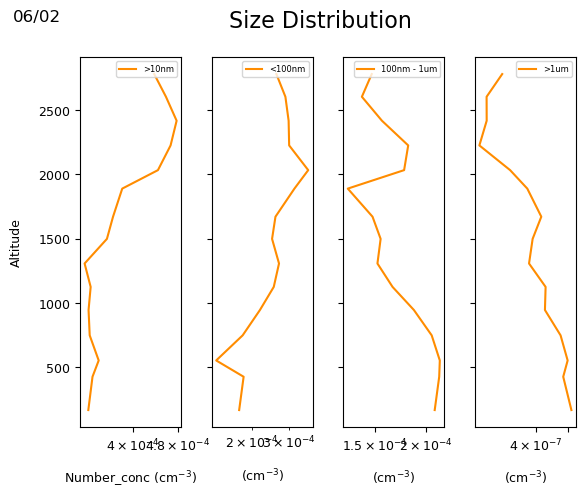

In [1044]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY2_subset_mean['CNgt10nm_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY2_subset_mean['nSMPS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY2_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY2_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude', labelpad=11)
ax[0].set_xlabel('Number_conc (cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)

# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/02', ha='left', va='top', fontsize=12)
# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()


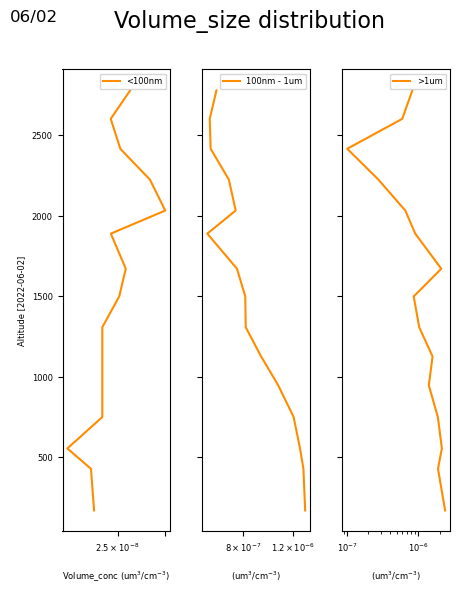

In [1045]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY2_subset_mean['vSMPS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY2_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY2_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY2_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude [2022-06-02]')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/02', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size distribution', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [1046]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L2_20230625T113221.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY2b_subset = DAY2b_subset.copy()
DAY2b_subset.loc[:, start_col2:] *= 1e-6
DAY2b_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
9180,2022-06-02 18:36:00,2022-06-02 18:36:01,32.312301,-65.009805,191.225,0.000558,0.000462,0.000266,0.000234,0.000030,1.095000e-06,6.500000e-07,0.000002,3.400000e-07,0.000345,0.000003,3.000000e-08
9181,2022-06-02 18:36:01,2022-06-02 18:36:02,32.312336,-65.010962,193.480,0.000595,0.000456,0.000265,0.000226,0.000029,1.120000e-06,6.500000e-07,0.000002,3.400000e-07,0.000345,0.000003,3.000000e-08
9182,2022-06-02 18:36:02,2022-06-02 18:36:03,32.312332,-65.012116,195.600,0.000593,0.000458,0.000271,0.000244,0.000035,1.615000e-06,0.000000e+00,0.000000,0.000000e+00,0.000345,0.000003,3.000000e-08
9183,2022-06-02 18:36:03,2022-06-02 18:36:04,32.312294,-65.013268,197.010,0.000582,0.000466,0.000272,0.000246,0.000039,2.285000e-06,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
9184,2022-06-02 18:36:04,2022-06-02 18:36:05,32.312221,-65.014415,197.440,0.000578,0.000471,0.000274,0.000241,0.000036,1.905000e-06,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,2022-06-02 18:52:55,2022-06-02 18:52:56,32.205808,-64.977280,3678.610,0.002029,0.001321,0.000893,0.000198,0.000013,3.350000e-07,0.000000e+00,0.000000,0.000000e+00,0.001625,0.000007,7.000000e-08
10196,2022-06-02 18:52:56,2022-06-02 18:52:57,32.205215,-64.976028,3684.900,0.001909,0.001332,0.000911,0.000207,0.000014,4.050000e-07,0.000000e+00,0.000000,0.000000e+00,0.001625,0.000007,7.000000e-08
10197,2022-06-02 18:52:57,2022-06-02 18:52:58,32.204648,-64.974760,3691.340,0.001939,0.001339,0.000935,0.000210,0.000014,4.100000e-07,0.000000e+00,0.000000,0.000000e+00,0.001625,0.000007,7.000000e-08
10198,2022-06-02 18:52:58,2022-06-02 18:52:59,32.204104,-64.973478,3697.790,0.001983,0.001363,0.000965,0.000217,0.000015,5.600000e-07,0.000000e+00,0.000000,0.000000e+00,0.001625,0.000007,7.000000e-08


In [1047]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2b_subset.GPS_Altitude_THORNHILL.min(), DAY2b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2b_subset['Bins'] = pd.cut(DAY2b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2b_subset_1000 = DAY2b_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000b = DAY2b_subset_1000[start_index:stop_index]
DAY1000_subset_1000b


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(132.5, 168.217]",2022-06-02 18:36:33.700000000,2022-06-02 18:36:34.700,32.294115,-65.038343,150.110167,0.000624,0.000478,0.000277,0.000210,0.000029,1.272500e-06,7.620000e-07,5.948667e-06,1.756667e-06,0.000322,0.000002,2.000000e-08
"(168.217, 203.933]",2022-06-02 18:36:19.440000000,2022-06-02 18:36:20.440,32.302282,-65.024822,185.682600,0.000605,0.000475,0.000277,0.000233,0.000032,1.394200e-06,4.568000e-07,3.071200e-06,8.112000e-07,0.000329,0.000003,2.300000e-08
"(203.933, 239.65]",2022-06-02 18:37:02.000000000,2022-06-02 18:37:03.000,32.265794,-65.038727,217.346923,0.000620,0.000483,0.000276,0.000196,0.000028,1.267308e-06,5.980769e-07,3.974615e-06,1.058846e-06,0.000322,0.000002,2.000000e-08
"(239.65, 275.366]",2022-06-02 18:37:13.000000000,2022-06-02 18:37:14.000,32.254753,-65.034836,258.630000,0.000582,0.000454,0.000266,0.000204,0.000028,1.199444e-06,5.194444e-07,3.785000e-06,1.108889e-06,NaN,NaN,NaN
"(275.366, 311.083]",2022-06-02 18:37:23.999999744,2022-06-02 18:37:25.000,32.245202,-65.026887,290.658077,0.000528,0.000414,0.000243,0.000197,0.000027,1.184231e-06,9.688462e-07,7.458077e-06,2.123077e-06,0.000197,0.000002,2.000000e-08
"(311.083, 346.8]",2022-06-02 18:37:38.000000000,2022-06-02 18:37:39.000,32.237366,-65.011798,330.868333,0.000455,0.000356,0.000211,0.000194,0.000026,1.179333e-06,8.910000e-07,1.129667e-05,4.605667e-06,0.000197,0.000002,2.000000e-08
"(346.8, 382.516]",2022-06-02 18:37:53.000000000,2022-06-02 18:37:54.000,32.237006,-64.992797,363.542667,0.000437,0.000341,0.000198,0.000174,0.000023,9.606667e-07,3.893333e-07,2.460333e-06,5.993333e-07,0.000197,0.000002,2.000000e-08
"(382.516, 418.233]",2022-06-02 18:38:07.000000000,2022-06-02 18:38:08.000,32.244580,-64.977394,399.478462,0.000421,0.000327,0.000191,0.000172,0.000022,9.703846e-07,5.692308e-07,3.313846e-06,8.780769e-07,0.000197,0.000002,2.000000e-08
"(418.233, 453.949]",2022-06-02 18:38:19.000000000,2022-06-02 18:38:20.000,32.255481,-64.969336,433.617273,0.000414,0.000324,0.000190,0.000169,0.000021,8.777273e-07,4.954545e-07,5.908636e-06,2.120455e-06,0.000185,0.000002,2.000000e-08


In [1048]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000b = DAY2b_subset_1000[start_index:stop_index]
DAY3000_subset_3000b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(989.698, 1025.415]",2022-06-02 18:41:23.000,2022-06-02 18:41:24.000,32.269884,-64.947261,1010.109286,0.000454,0.000329,0.000185,0.000156,0.000020,9.342857e-07,2.414286e-07,2.141429e-06,6.628571e-07,0.000216,0.000002,2.000000e-08
"(1025.415, 1061.132]",2022-06-02 18:41:31.500,2022-06-02 18:41:32.500,32.278879,-64.945764,1045.848000,0.000452,0.000331,0.000185,0.000159,0.000020,8.830000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000216,0.000002,2.000000e-08
"(1061.132, 1096.848]",2022-06-02 18:41:40.500,2022-06-02 18:41:41.500,32.288298,-64.947187,1080.382500,0.000436,0.000335,0.000182,0.000156,0.000020,9.000000e-07,2.600000e-07,4.200000e-06,1.618750e-06,0.000216,0.000002,2.000000e-08
"(1096.848, 1132.565]",2022-06-02 18:41:52.500,2022-06-02 18:41:53.500,32.298942,-64.954631,1113.911250,0.000456,0.000339,0.000181,0.000148,0.000019,8.065625e-07,5.512500e-07,4.763125e-06,1.500000e-06,0.000216,0.000002,2.000000e-08
"(1132.565, 1168.281]",2022-06-02 18:42:04.500,2022-06-02 18:42:05.500,32.306134,-64.966376,1149.516250,0.000454,0.000338,0.000182,0.000149,0.000017,6.606250e-07,6.812500e-07,6.970000e-06,2.375000e-06,0.000216,0.000002,2.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(3275.561, 3311.277]",2022-06-02 18:51:48.500,2022-06-02 18:51:49.500,32.275042,-65.008035,3293.825000,0.001835,0.001225,0.000471,0.000103,0.000007,2.675000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.001362,0.000007,7.000000e-08
"(3311.277, 3346.994]",2022-06-02 18:51:54.000,2022-06-02 18:51:55.000,32.268640,-65.008707,3329.810000,0.001787,0.001173,0.000523,0.000118,0.000008,2.870000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.001362,0.000007,7.000000e-08
"(3346.994, 3382.711]",2022-06-02 18:51:59.000,2022-06-02 18:52:00.000,32.262832,-65.009195,3366.570000,0.001655,0.001077,0.000613,0.000145,0.000010,2.990000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.001362,0.000007,7.000000e-08


In [1049]:
nbins = 20
bins2b = np.linspace(DAY2b_subset.GPS_Altitude_THORNHILL.min(), DAY2b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2b_subset['Bins'] = pd.cut(DAY2b_subset['GPS_Altitude_THORNHILL'], bins2b)
DAY2b_subset_mean= DAY2b_subset.groupby('Bins').mean()
DAY2b_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(132.5, 311.083]",2022-06-02 18:36:45.022222080,2022-06-02 18:36:46.022222080,32.281291,-65.032637,200.856722,0.000600,0.000466,0.000271,0.000212,0.000029,1.285500e-06,6.591667e-07,4.865889e-06,1.381389e-06,0.000296,0.000002,2.050000e-08
"(311.083, 489.666]",2022-06-02 18:38:01.500000000,2022-06-02 18:38:02.500000000,32.245612,-64.986697,389.410565,0.000431,0.000337,0.000198,0.000181,0.000024,1.045806e-06,5.881452e-07,6.396935e-06,2.453790e-06,0.000193,0.000002,2.000000e-08
"(489.666, 668.249]",2022-06-02 18:39:05.000000000,2022-06-02 18:39:06.000000000,32.288367,-64.991261,569.101385,0.000419,0.000321,0.000186,0.000182,0.000023,9.754615e-07,6.706923e-07,6.422769e-06,2.243077e-06,0.000168,0.000001,1.600000e-08
"(668.249, 846.832]",2022-06-02 18:40:07.000000256,2022-06-02 18:40:08.000000000,32.260858,-65.016660,756.700932,0.000423,0.000321,0.000180,0.000169,0.000021,9.069492e-07,4.134746e-07,3.967288e-06,1.514915e-06,0.000160,0.000001,1.431818e-08
"(846.832, 1025.415]",2022-06-02 18:41:01.499999744,2022-06-02 18:41:02.500000000,32.253508,-64.964650,935.782800,0.000437,0.000333,0.000187,0.000167,0.000022,9.454000e-07,5.142000e-07,4.852400e-06,1.595000e-06,0.000191,0.000002,2.000000e-08
"(1025.415, 1203.998]",2022-06-02 18:41:52.500000000,2022-06-02 18:41:53.500000000,32.296278,-64.957892,1114.947308,0.000452,0.000337,0.000183,0.000152,0.000019,8.313462e-07,4.242308e-07,4.465000e-06,1.620000e-06,0.000218,0.000002,2.027027e-08
"(1203.998, 1382.581]",2022-06-02 18:42:45.500000000,2022-06-02 18:42:46.500000000,32.288594,-65.002646,1282.368704,0.000467,0.000355,0.000199,0.000148,0.000018,8.174074e-07,3.459259e-07,3.004259e-06,9.838889e-07,0.000268,0.000002,3.000000e-08
"(1382.581, 1561.164]",2022-06-02 18:43:40.500000000,2022-06-02 18:43:41.500000000,32.249233,-64.972638,1475.676964,0.000472,0.000346,0.000168,0.000122,0.000015,6.453571e-07,2.505357e-07,2.377679e-06,7.901786e-07,0.000294,0.000002,2.000000e-08
"(1561.164, 1739.747]",2022-06-02 18:44:32.000000256,2022-06-02 18:44:33.000000000,32.273153,-64.921091,1658.834894,0.000548,0.000385,0.000223,0.000138,0.000016,6.876596e-07,4.534043e-07,5.138085e-06,2.005957e-06,0.000247,0.000002,2.000000e-08


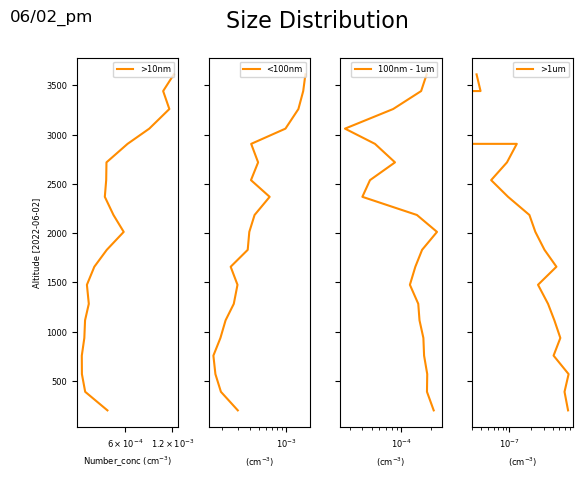

In [1050]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '7'
ax[0].plot(DAY2b_subset_mean['CNgt10nm_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY2b_subset_mean['nSMPS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY2b_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY2b_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude [2022-06-02]')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/02_pm', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

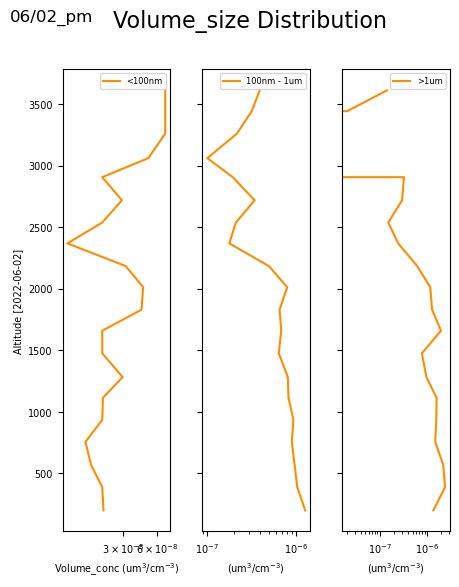

In [1051]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY2b_subset_mean['vSMPS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY2b_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY2b_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY2b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude [2022-06-02]')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Adjust the spacing between subplots
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/02_pm', ha='left', va='top', fontsize=12)
# Set the title
fig.suptitle('Volume_size Distribution', fontsize=16)


In [1052]:
DAY3 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220603_R0_20230625T113221.ict')
start_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 13:30:00"))
stop_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
DAY3_subset = DAY3[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY3_subset = DAY3_subset.copy()
DAY3_subset.loc[:, start_col2:] *= 1e-6
DAY3_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY3_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
2467,2022-06-03 13:30:00,2022-06-03 13:30:01,33.872982,-67.052387,2858.90,0.000668,0.000484,0.000269,0.000062,0.000007,4.100000e-07,0.0,0.0,0.0,NaN,NaN,NaN
2468,2022-06-03 13:30:01,2022-06-03 13:30:02,33.872534,-67.053832,2861.55,0.000664,0.000481,0.000274,0.000066,0.000008,5.300000e-07,0.0,0.0,0.0,0.000395,0.000003,4.000000e-08
2469,2022-06-03 13:30:02,2022-06-03 13:30:03,33.872086,-67.055272,2863.82,0.000668,0.000480,0.000270,0.000052,0.000006,2.700000e-07,0.0,0.0,0.0,0.000395,0.000003,4.000000e-08
2470,2022-06-03 13:30:03,2022-06-03 13:30:04,33.871638,-67.056704,2865.57,0.000690,0.000479,0.000266,0.000062,0.000005,1.750000e-07,0.0,0.0,0.0,0.000395,0.000003,4.000000e-08
2471,2022-06-03 13:30:04,2022-06-03 13:30:05,33.871187,-67.058127,2866.59,0.000653,0.000477,0.000269,0.000073,0.000007,3.350000e-07,0.0,0.0,0.0,0.000395,0.000003,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,2022-06-03 14:59:55,2022-06-03 14:59:56,32.712767,-65.244314,2413.61,0.000985,0.000639,0.000097,0.000049,0.000005,2.550000e-07,0.0,0.0,0.0,NaN,NaN,NaN
7863,2022-06-03 14:59:56,2022-06-03 14:59:57,32.712103,-65.243151,2408.15,0.000980,0.000648,0.000093,0.000050,0.000005,2.550000e-07,0.0,0.0,0.0,NaN,NaN,NaN
7864,2022-06-03 14:59:57,2022-06-03 14:59:58,32.711441,-65.241989,2402.02,0.000925,0.000656,0.000090,0.000045,0.000004,1.650000e-07,0.0,0.0,0.0,NaN,NaN,NaN
7865,2022-06-03 14:59:58,2022-06-03 14:59:59,32.710779,-65.240827,2395.43,0.000930,0.000665,0.000087,0.000036,0.000004,2.900000e-07,0.0,0.0,0.0,NaN,NaN,NaN


In [1053]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY3_subset.GPS_Altitude_THORNHILL.min(), DAY3_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY3_subset['Bins'] = pd.cut(DAY3_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY3_subset_1000 = DAY3_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_3 = DAY3_subset_1000[start_index:stop_index]
DAY1000_subset_3


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(94.825, 149.89]",2022-06-03 13:45:28.789007104,2022-06-03 13:45:29.789007104,34.126959,-67.213208,123.892358,0.000443,0.000348,0.000223,0.000228,0.000030,1.301020e-06,6.814273e-07,0.000006,1.973825e-06,0.000197,0.000002,2.105882e-08
"(149.89, 204.956]",2022-06-03 13:48:10.320000000,2022-06-03 13:48:11.319999744,33.927509,-67.395937,181.520500,0.000429,0.000336,0.000218,0.000201,0.000027,1.198600e-06,5.040000e-07,0.000004,1.088000e-06,0.000208,0.000002,2.000000e-08
"(204.956, 260.021]",2022-06-03 13:59:27.145491712,2022-06-03 13:59:28.145491712,34.102741,-67.396328,246.379939,0.000494,0.000385,0.000245,0.000236,0.000031,1.336537e-06,6.484426e-07,0.000005,1.773627e-06,0.000198,0.000002,2.000000e-08
"(260.021, 315.086]",2022-06-03 13:53:11.011236096,2022-06-03 13:53:12.011235840,33.997827,-67.380569,280.595730,0.000461,0.000359,0.000228,0.000233,0.000030,1.272135e-06,5.080899e-07,0.000004,1.014719e-06,0.000196,0.000002,2.000000e-08
"(315.086, 370.151]",2022-06-03 13:54:31.023809536,2022-06-03 13:54:32.023809536,34.037034,-67.328911,340.301310,0.000479,0.000373,0.000236,0.000234,0.000031,1.376071e-06,7.266667e-07,0.000006,2.022857e-06,0.000227,0.000002,2.000000e-08
"(370.151, 425.217]",2022-06-03 13:54:07.136363520,2022-06-03 13:54:08.136363776,34.095859,-67.060673,402.749318,0.000457,0.000349,0.000216,0.000235,0.000030,1.278409e-06,9.090909e-07,0.000007,2.375000e-06,0.000267,0.000002,3.000000e-08
"(425.217, 480.282]",2022-06-03 14:03:16.657894656,2022-06-03 14:03:17.657894656,34.148126,-67.167576,453.531184,0.000652,0.000486,0.000290,0.000177,0.000026,1.318816e-06,6.523684e-07,0.000005,1.658158e-06,0.000422,0.000002,2.647059e-08
"(480.282, 535.347]",2022-06-03 14:09:48.304114432,2022-06-03 14:09:49.304114688,34.166931,-67.301055,500.509848,0.001073,0.000768,0.000469,0.000080,0.000020,1.617335e-06,1.185277e-06,0.000008,2.207791e-06,0.000555,0.000003,3.012077e-08
"(535.347, 590.412]",2022-06-03 13:56:08.066666752,2022-06-03 13:56:09.066666752,33.903960,-67.359933,562.995667,0.000527,0.000405,0.000256,0.000136,0.000020,1.060333e-06,4.666667e-07,0.000004,1.786000e-06,0.000183,0.000002,2.000000e-08


In [1054]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3_subset_3000 = DAY3_subset_1000[start_index:stop_index]
DAY3_subset_3000.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,45,45,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,44.000000,44.000000,4.400000e+01
mean,2022-06-03 14:17:53.347165952,2022-06-03 14:17:54.347165952,33.699769,-66.823042,2214.439586,0.001042,0.000693,0.000291,0.000172,0.000018,6.997563e-07,2.573093e-07,2.346553e-06,8.133608e-07,0.001360,0.000004,3.839784e-08
min,2022-06-03 13:53:27.769230848,2022-06-03 13:53:28.769230592,32.986787,-67.516110,1004.015000,0.000413,0.000314,0.000115,0.000032,0.000003,1.240625e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000241,0.000002,1.000000e-08
25%,2022-06-03 14:00:02.636363520,2022-06-03 14:00:03.636363520,33.409507,-67.254654,1592.160263,0.000700,0.000478,0.000161,0.000083,0.000008,3.370000e-07,1.083333e-07,8.126923e-07,2.040000e-07,0.000366,0.000002,2.000000e-08
50%,2022-06-03 14:11:07.307692288,2022-06-03 14:11:08.307692288,33.878409,-67.028103,2212.072222,0.000827,0.000575,0.000230,0.000152,0.000017,6.971429e-07,2.379167e-07,1.681818e-06,5.378846e-07,0.000460,0.000003,2.627451e-08
75%,2022-06-03 14:28:57.095238144,2022-06-03 14:28:58.095237888,33.996922,-66.454962,2821.081500,0.000951,0.000671,0.000400,0.000273,0.000026,9.750000e-07,3.900000e-07,3.797917e-06,1.370132e-06,0.000651,0.000005,6.312500e-08
max,2022-06-03 14:54:11.565217536,2022-06-03 14:54:12.565217536,34.194709,-65.729004,3427.270000,0.007850,0.004318,0.000610,0.000396,0.000040,1.518182e-06,6.672414e-07,6.468000e-06,2.763750e-06,0.007037,0.000008,9.000000e-08
std,NaN,NaN,0.354658,0.503728,723.872134,0.001183,0.000664,0.000154,0.000108,0.000011,4.072873e-07,1.724426e-07,1.835769e-06,7.445427e-07,0.002288,0.000002,2.508185e-08


In [1055]:
nbins = 20
bins3 = np.linspace(DAY3_subset.GPS_Altitude_THORNHILL.min(), DAY3_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY3_subset['Bins'] = pd.cut(DAY3_subset['GPS_Altitude_THORNHILL'], bins3)
DAY3_subset_mean= DAY3_subset.groupby('Bins').mean()
DAY3_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(94.825, 370.151]",2022-06-03 13:49:56.516416256,2022-06-03 13:49:57.516416256,34.106335,-67.279014,171.578013,0.000458,0.000359,0.000229,0.000230,0.000030,1.308139e-06,6.600056e-07,5.649452e-06,1.848456e-06,0.000198,0.000002,2.066716e-08
"(370.151, 645.478]",2022-06-03 14:08:20.619047680,2022-06-03 14:08:21.619047680,34.151107,-67.290037,499.110760,0.000998,0.000718,0.000438,0.000094,0.000021,1.560092e-06,1.104101e-06,7.340530e-06,2.133233e-06,0.000520,0.000003,2.929752e-08
"(645.478, 920.804]",2022-06-03 14:16:38.435643648,2022-06-03 14:16:39.435643392,34.135261,-67.305691,857.512046,0.001216,0.000783,0.000411,0.000370,0.000090,6.968086e-06,4.293614e-06,2.713145e-05,7.602624e-06,0.000928,0.000002,2.183761e-08
"(920.804, 1196.13]",2022-06-03 14:15:37.023560192,2022-06-03 14:15:38.023560448,34.050457,-67.474009,971.398259,0.001138,0.000734,0.000375,0.000475,0.000134,1.111690e-05,7.077134e-06,4.366895e-05,1.220810e-05,0.000612,0.000002,2.041958e-08
"(1196.13, 1471.456]",2022-06-03 14:03:54.296703488,2022-06-03 14:03:55.296703232,34.113940,-67.029434,1318.022857,0.000440,0.000331,0.000161,0.000110,0.000013,5.847253e-07,3.567033e-07,2.538791e-06,7.616484e-07,0.000438,0.000004,5.049180e-08
"(1471.456, 1746.782]",2022-06-03 14:26:10.957356032,2022-06-03 14:26:11.957356032,34.165922,-67.259036,1561.458401,0.000814,0.000603,0.000453,0.000301,0.000030,1.128305e-06,4.019723e-07,3.726503e-06,1.293134e-06,0.000367,0.000005,5.417582e-08
"(1746.782, 2022.109]",2022-06-03 13:59:30.277777664,2022-06-03 13:59:31.277777920,33.900369,-67.253198,1885.965370,0.000882,0.000638,0.000503,0.000323,0.000032,1.187593e-06,3.030556e-07,3.135741e-06,1.177963e-06,0.000366,0.000004,4.875000e-08
"(2022.109, 2297.435]",2022-06-03 13:57:51.660000000,2022-06-03 13:57:52.660000000,33.883285,-67.253390,2152.209000,0.000925,0.000659,0.000530,0.000320,0.000032,1.238300e-06,3.900000e-07,4.017200e-06,1.427300e-06,0.000461,0.000006,7.580000e-08
"(2297.435, 2572.761]",2022-06-03 14:18:06.523255808,2022-06-03 14:18:07.523255808,33.526622,-66.633557,2450.567907,0.000855,0.000598,0.000340,0.000199,0.000020,7.550000e-07,1.980233e-07,2.156163e-06,8.048837e-07,0.000523,0.000005,5.382979e-08


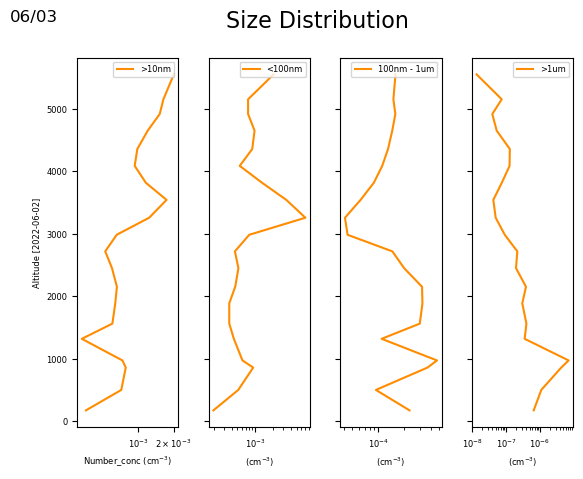

In [1056]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY3_subset_mean['CNgt10nm_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY3_subset_mean['nSMPS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY3_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY3_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude [2022-06-02]')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/03', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

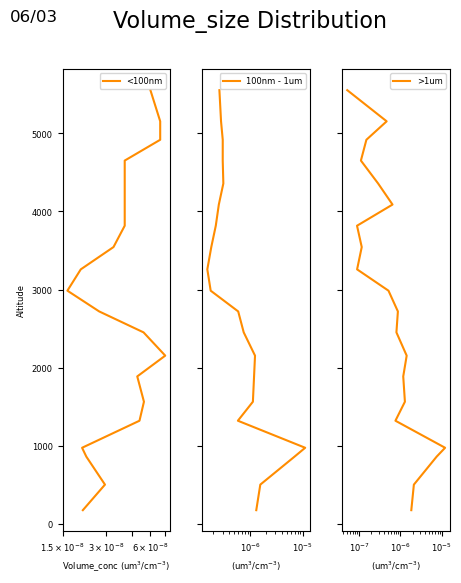

In [1057]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY3_subset_mean['vSMPS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY3_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY3_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY3_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/03', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1058]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220607_R0_L1_20230625T113222.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY7_subset = DAY7_subset.copy()
DAY7_subset.loc[:, start_col2:] *= 1e-6
DAY7_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,0.001479,0.001130,0.000889,0.000483,0.000047,2.060000e-06,1.555000e-06,0.000011,0.000003,NaN,NaN,NaN
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,0.001507,0.001140,0.000886,0.000456,0.000047,2.330000e-06,1.560000e-06,0.000011,0.000003,NaN,NaN,NaN
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,0.001477,0.001150,0.000900,0.000486,0.000049,2.360000e-06,1.040000e-06,0.000007,0.000002,NaN,NaN,NaN
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,0.001433,0.001150,0.000906,0.000508,0.000048,1.950000e-06,1.035000e-06,0.000011,0.000003,NaN,NaN,NaN
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,0.001361,0.001139,0.000900,0.000511,0.000046,1.805000e-06,1.555000e-06,0.000015,0.000004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,0.000983,0.000724,0.000527,0.000162,0.000012,3.350000e-07,5.200000e-07,0.000004,0.000001,NaN,NaN,NaN
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,0.000970,0.000724,0.000538,0.000144,0.000010,3.000000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,0.001011,0.000723,0.000536,0.000159,0.000011,3.150000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,0.001049,0.000726,0.000538,0.000162,0.000011,2.950000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN


In [1059]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7_subset.GPS_Altitude_THORNHILL.min(), DAY7_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7_subset['Bins'] = pd.cut(DAY7_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7_subset_1000 = DAY7_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7 = DAY7_subset_1000[start_index:stop_index]
DAY1000_subset_7


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(125.87, 152.826]",2022-06-07 14:32:05.300000000,2022-06-07 14:32:06.300,32.247173,-64.994004,134.321500,0.001435,0.001137,0.000898,0.000516,0.000050,0.000002,1.244500e-06,0.000012,0.000004,NaN,NaN,NaN
"(152.826, 179.781]",2022-06-07 14:32:13.999999744,2022-06-07 14:32:15.000,32.241209,-64.985889,170.347143,0.001456,0.001137,0.000899,0.000566,0.000053,0.000002,2.540714e-06,0.000022,0.000008,0.000726,0.000008,9.000000e-08
"(179.781, 206.737]",2022-06-07 14:32:27.500000000,2022-06-07 14:32:28.500,32.229147,-64.976789,189.676250,0.001482,0.001139,0.000902,0.000538,0.000051,0.000002,2.176750e-06,0.000021,0.000007,0.000726,0.000008,9.000000e-08
"(206.737, 233.692]",2022-06-07 14:32:40.000000000,2022-06-07 14:32:41.000,32.216014,-64.972505,219.682000,0.001442,0.001139,0.000905,0.000543,0.000049,0.000002,1.583000e-06,0.000010,0.000003,0.000726,0.000008,9.000000e-08
"(233.692, 260.648]",2022-06-07 14:32:48.000000000,2022-06-07 14:32:49.000,32.207258,-64.973206,249.774091,0.001447,0.001129,0.000898,0.000570,0.000053,0.000002,2.199545e-06,0.000018,0.000006,0.000726,0.000008,9.000000e-08
"(260.648, 287.604]",2022-06-07 14:33:01.000000000,2022-06-07 14:33:02.000,32.194130,-64.979359,265.369667,0.001446,0.001127,0.000897,0.000537,0.000049,0.000002,1.593333e-06,0.000014,0.000004,0.000726,0.000008,9.000000e-08
"(287.604, 314.559]",2022-06-07 14:33:13.500000000,2022-06-07 14:33:14.500,32.184571,-64.990567,303.789500,0.001429,0.001125,0.000897,0.000588,0.000055,0.000002,2.416500e-06,0.000020,0.000007,0.000830,0.000010,1.200000e-07
"(314.559, 341.515]",2022-06-07 14:33:26.000000000,2022-06-07 14:33:27.000,32.179710,-65.005119,326.685667,0.001441,0.001121,0.000892,0.000548,0.000051,0.000002,1.929000e-06,0.000018,0.000006,0.000830,0.000010,1.200000e-07
"(341.515, 368.47]",2022-06-07 14:33:38.000000000,2022-06-07 14:33:39.000,32.179533,-65.019885,353.990000,0.001440,0.001131,0.000896,0.000543,0.000051,0.000002,2.234444e-06,0.000016,0.000005,0.000830,0.000010,1.200000e-07


In [1060]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7_subset_3000 = DAY7_subset_1000[start_index:stop_index]
DAY7_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1015.405, 1042.36]",2022-06-07 14:38:12.000,2022-06-07 14:38:13.000,32.229338,-65.062171,1029.744286,0.001148,0.000856,0.000651,0.000461,0.000042,1.696429e-06,1.390714e-06,1.654929e-05,6.310000e-06,NaN,NaN,NaN
"(1042.36, 1069.316]",2022-06-07 14:38:21.000,2022-06-07 14:38:22.000,32.236954,-65.057676,1056.277273,0.001042,0.000756,0.000555,0.000423,0.000040,1.722273e-06,1.629091e-06,1.705364e-05,6.571818e-06,NaN,NaN,NaN
"(1069.316, 1096.272]",2022-06-07 14:38:32.000,2022-06-07 14:38:33.000,32.245122,-65.049970,1083.785455,0.000969,0.000723,0.000519,0.000415,0.000039,1.663182e-06,5.200000e-07,2.426364e-06,5.181818e-07,NaN,NaN,NaN
"(1096.272, 1123.227]",2022-06-07 14:38:42.500,2022-06-07 14:38:43.500,32.251109,-65.040405,1108.407000,0.000959,0.000716,0.000514,0.000398,0.000038,1.589500e-06,1.040000e-06,1.009600e-05,3.136000e-06,NaN,NaN,NaN
"(1123.227, 1150.183]",2022-06-07 14:38:52.000,2022-06-07 14:38:53.000,32.254066,-65.030048,1136.586667,0.000937,0.000704,0.000505,0.000402,0.000039,1.683889e-06,1.168333e-06,1.163444e-05,4.322778e-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2659.696, 2686.652]",2022-06-07 14:46:31.000,2022-06-07 14:46:32.000,32.246791,-65.029386,2672.710000,0.001174,0.000819,0.000509,0.000045,0.000003,6.600000e-08,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
"(2686.652, 2713.608]",2022-06-07 14:46:36.000,2022-06-07 14:46:37.000,32.249473,-65.023645,2699.616000,0.001173,0.000847,0.000513,0.000044,0.000002,4.900000e-08,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
"(2713.608, 2740.563]",2022-06-07 14:46:41.000,2022-06-07 14:46:42.000,32.251655,-65.017598,2726.148000,0.001070,0.000769,0.000501,0.000101,0.000006,1.660000e-07,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [1061]:
nbins = 20
bins = np.linspace(DAY7_subset.GPS_Altitude_THORNHILL.min(), DAY7_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7_subset['Bins'] = pd.cut(DAY7_subset['GPS_Altitude_THORNHILL'], bins)
DAY7_subset_mean = DAY7_subset.groupby('Bins').mean()
DAY7_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(125.87, 260.648]",2022-06-07 14:32:26.962264064,2022-06-07 14:32:27.962264320,32.228359,-64.980091,191.982925,0.001459,0.001136,0.000900,0.000545,0.000051,2.213679e-06,1.997642e-06,1.786585e-05,5.889717e-06,0.000726,0.000008,9.000000e-08
"(260.648, 395.426]",2022-06-07 14:33:22.500000000,2022-06-07 14:33:23.500000000,32.184684,-65.002125,320.002672,0.001448,0.001127,0.000896,0.000551,0.000051,2.149914e-06,1.992069e-06,1.749871e-05,5.646466e-06,0.000815,0.000010,1.158140e-07
"(395.426, 530.204]",2022-06-07 14:34:19.000000256,2022-06-07 14:34:20.000000000,32.207508,-65.045768,461.442818,0.001472,0.001133,0.000899,0.000537,0.000050,2.171000e-06,2.176818e-06,1.923436e-05,6.124273e-06,0.000826,0.000010,1.200000e-07
"(530.204, 664.982]",2022-06-07 14:35:16.500000000,2022-06-07 14:35:17.500000000,32.232658,-65.008332,595.978500,0.001494,0.001135,0.000898,0.000542,0.000052,2.287417e-06,1.449417e-06,1.464308e-05,5.159500e-06,0.000836,0.000010,1.200000e-07
"(664.982, 799.76]",2022-06-07 14:36:14.500000000,2022-06-07 14:36:15.500000000,32.190803,-64.988014,732.742768,0.001492,0.001116,0.000887,0.000561,0.000051,2.061250e-06,2.123036e-06,1.628938e-05,5.019911e-06,0.000732,0.000009,1.063415e-07
"(799.76, 934.538]",2022-06-07 14:37:10.000000000,2022-06-07 14:37:11.000000000,32.178847,-65.039683,867.218273,0.001415,0.001058,0.000842,0.000556,0.000050,2.060727e-06,1.236909e-06,9.443091e-06,2.919545e-06,0.000641,0.000008,9.425000e-08
"(934.538, 1069.316]",2022-06-07 14:38:02.000000256,2022-06-07 14:38:03.000000000,32.219780,-65.062597,1000.849694,0.001195,0.000882,0.000676,0.000461,0.000043,1.760816e-06,1.245510e-06,1.180878e-05,4.275612e-06,0.000611,0.000008,9.000000e-08
"(1069.316, 1204.094]",2022-06-07 14:38:51.000000000,2022-06-07 14:38:52.000000000,32.251072,-65.030295,1134.863673,0.000964,0.000714,0.000512,0.000407,0.000039,1.702347e-06,1.059592e-06,9.879898e-06,3.462143e-06,NaN,NaN,NaN
"(1204.094, 1338.872]",2022-06-07 14:39:37.000000000,2022-06-07 14:39:38.000000000,32.231774,-64.988403,1270.812093,0.001079,0.000791,0.000594,0.000376,0.000035,1.407093e-06,1.068837e-06,7.880814e-06,2.393837e-06,NaN,NaN,NaN


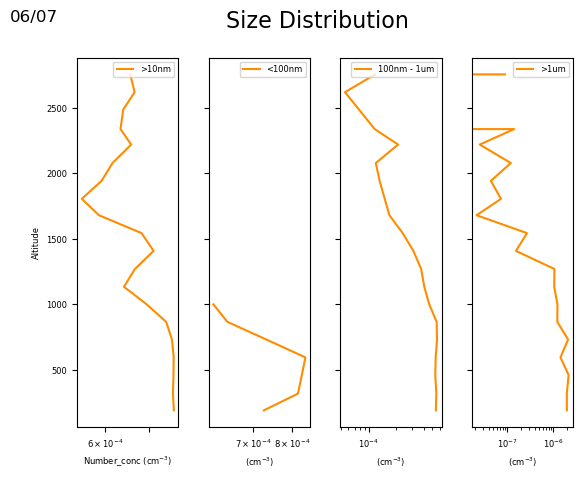

In [1062]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY7_subset_mean['CNgt10nm_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY7_subset_mean['nSMPS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY7_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY7_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/07', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

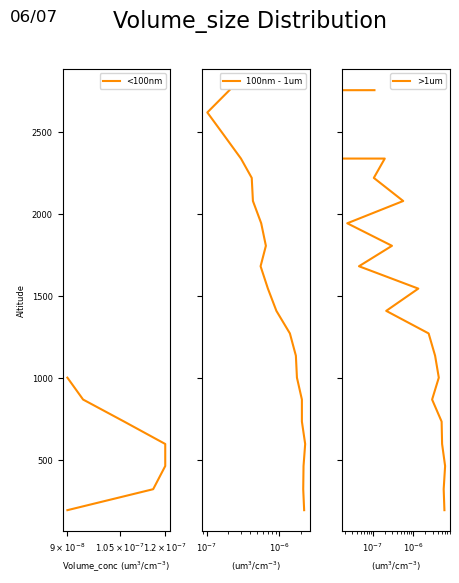

In [1063]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY7_subset_mean['vSMPS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY7_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY7_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY7_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/07', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1064]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220607_R0_L2_20230625T113222.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
DAY7b_subset = DAY7b[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY7b_subset = DAY7b_subset.copy()
DAY7b_subset.loc[:, start_col2:] *= 1e-6
DAY7b_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10420,2022-06-07 19:08:00,2022-06-07 19:08:01,32.242823,-65.003952,133.320,0.001662,0.001281,0.000624,0.000244,0.000021,8.150000e-07,1.560000e-06,0.000025,0.000011,NaN,NaN,NaN
10421,2022-06-07 19:08:01,2022-06-07 19:08:02,32.243085,-65.002775,133.120,0.001482,0.001138,0.000570,0.000268,0.000025,1.170000e-06,1.040000e-06,0.000019,0.000009,NaN,NaN,NaN
10422,2022-06-07 19:08:02,2022-06-07 19:08:03,32.243347,-65.001596,132.930,0.001344,0.001040,0.000496,0.000265,0.000023,1.080000e-06,5.150000e-07,0.000010,0.000004,NaN,NaN,NaN
10423,2022-06-07 19:08:03,2022-06-07 19:08:04,32.243610,-65.000416,132.720,0.001879,0.001373,0.000497,0.000284,0.000028,1.495000e-06,1.165000e-06,0.000012,0.000005,NaN,NaN,NaN
10424,2022-06-07 19:08:04,2022-06-07 19:08:05,32.243873,-64.999235,132.595,0.002663,0.001891,0.000525,0.000291,0.000033,2.020000e-06,3.115000e-06,0.000012,0.000002,0.002522,0.000007,7.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,2022-06-07 19:22:55,2022-06-07 19:22:56,32.296480,-65.011792,3518.030,0.001652,0.001200,0.000864,0.000263,0.000018,5.250000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11316,2022-06-07 19:22:56,2022-06-07 19:22:57,32.296519,-65.013093,3524.890,0.001651,0.001226,0.000901,0.000264,0.000018,5.350000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11317,2022-06-07 19:22:57,2022-06-07 19:22:58,32.296518,-65.014396,3531.840,0.001731,0.001246,0.000916,0.000269,0.000020,7.100000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11318,2022-06-07 19:22:58,2022-06-07 19:22:59,32.296479,-65.015699,3538.850,0.001770,0.001251,0.000902,0.000269,0.000019,6.700000e-07,5.200000e-07,0.000010,0.000004,NaN,NaN,NaN


In [1065]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7b_subset.GPS_Altitude_THORNHILL.min(), DAY7b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7b_subset['Bins'] = pd.cut(DAY7b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7b_subset_1000 = DAY7b_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7b = DAY7b_subset_1000[start_index:stop_index]
DAY1000_subset_7b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(132.595, 166.728]",2022-06-07 19:08:08.764705792,2022-06-07 19:08:09.764706048,32.245613,-64.993812,142.995294,0.002483,0.001880,0.000533,0.000258,0.000025,0.000001,1.738529e-06,0.000016,0.000006,0.002522,0.000007,7.000000e-08
"(166.728, 200.861]",2022-06-07 19:08:21.500000000,2022-06-07 19:08:22.500000000,32.252466,-64.980849,183.907500,0.003206,0.002442,0.000579,0.000296,0.000027,0.000001,1.523750e-06,0.000013,0.000004,0.002522,0.000007,7.000000e-08
"(200.861, 234.994]",2022-06-07 19:08:31.500000000,2022-06-07 19:08:32.500000000,32.261230,-64.974575,218.264583,0.003500,0.002636,0.000597,0.000270,0.000025,0.000001,1.999583e-06,0.000018,0.000006,0.002522,0.000007,7.000000e-08
"(234.994, 269.127]",2022-06-07 19:08:42.500000000,2022-06-07 19:08:43.500000000,32.272442,-64.972311,251.997000,0.002359,0.001806,0.000526,0.000255,0.000026,0.000001,1.567500e-06,0.000011,0.000003,0.002522,0.000007,7.000000e-08
"(269.127, 303.26]",2022-06-07 19:08:51.500000000,2022-06-07 19:08:52.500000000,32.281693,-64.974483,287.190000,0.001257,0.000984,0.000443,0.000259,0.000025,0.000001,2.043125e-06,0.000024,0.000009,0.002522,0.000007,7.000000e-08
"(303.26, 337.393]",2022-06-07 19:09:01.500000000,2022-06-07 19:09:02.500000000,32.290806,-64.980798,319.254583,0.001127,0.000890,0.000443,0.000236,0.000022,0.000001,1.913750e-06,0.000016,0.000006,0.000718,0.000006,6.000000e-08
"(337.393, 371.526]",2022-06-07 19:09:12.000000000,2022-06-07 19:09:13.000000000,32.298242,-64.990766,354.736667,0.001155,0.000905,0.000443,0.000242,0.000024,0.000001,2.434444e-06,0.000028,0.000011,0.000718,0.000006,6.000000e-08
"(371.526, 405.659]",2022-06-07 19:09:23.500000000,2022-06-07 19:09:24.500000000,32.302454,-65.004622,389.557143,0.001166,0.000914,0.000455,0.000241,0.000024,0.000001,1.872143e-06,0.000014,0.000004,0.000718,0.000006,6.000000e-08
"(405.659, 439.792]",2022-06-07 19:09:35.000000000,2022-06-07 19:09:36.000000000,32.302506,-65.019551,421.782778,0.001079,0.000847,0.000446,0.000240,0.000024,0.000001,1.730000e-06,0.000019,0.000007,0.000718,0.000006,6.000000e-08


In [1066]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7b_subset_3000 = DAY7b_subset_1000[start_index:stop_index]
DAY7b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(985.921, 1020.054]",2022-06-07 19:12:28.500,2022-06-07 19:12:29.500,32.296148,-64.998385,1003.411000,0.007889,0.005841,0.001515,0.000554,0.000044,1.811500e-06,2.102500e-06,0.000017,5.089500e-06,0.006876,0.000029,3.000000e-07
"(1020.054, 1054.187]",2022-06-07 19:12:38.500,2022-06-07 19:12:39.500,32.299974,-65.010363,1037.215000,0.010548,0.007854,0.001980,0.000653,0.000050,1.836000e-06,1.727000e-06,0.000021,8.040000e-06,0.006876,0.000029,3.000000e-07
"(1054.187, 1088.32]",2022-06-07 19:12:48.000,2022-06-07 19:12:49.000,32.300554,-65.022498,1071.926667,0.012387,0.009409,0.002060,0.000694,0.000053,1.891667e-06,1.285556e-06,0.000013,4.620000e-06,0.006876,0.000029,3.000000e-07
"(1088.32, 1122.453]",2022-06-07 19:12:58.500,2022-06-07 19:12:59.500,32.297572,-65.035423,1104.758333,0.011660,0.008587,0.001831,0.000635,0.000049,1.892917e-06,9.404167e-07,0.000010,3.052500e-06,0.002340,0.000008,8.000000e-08
"(1122.453, 1156.586]",2022-06-07 19:13:10.500,2022-06-07 19:13:11.500,32.290153,-65.047951,1140.011667,0.007065,0.004768,0.001080,0.000488,0.000041,1.661250e-06,1.977917e-06,0.000020,6.549167e-06,0.002340,0.000008,8.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(3306.969, 3341.102]",2022-06-07 19:22:24.000,2022-06-07 19:22:25.000,32.278726,-64.979771,3325.450000,0.001063,0.000728,0.000457,0.000135,0.000009,2.730000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
"(3341.102, 3375.235]",2022-06-07 19:22:29.500,2022-06-07 19:22:30.500,32.283554,-64.983849,3359.553333,0.001103,0.000769,0.000499,0.000125,0.000008,2.616667e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
"(3375.235, 3409.368]",2022-06-07 19:22:35.000,2022-06-07 19:22:36.000,32.287882,-64.988668,3393.912000,0.001181,0.000824,0.000559,0.000149,0.000010,3.010000e-07,2.080000e-07,0.000003,8.640000e-07,NaN,NaN,NaN


In [1067]:
nbins = 20
bins = np.linspace(DAY7b_subset.GPS_Altitude_THORNHILL.min(), DAY7b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7b_subset['Bins'] = pd.cut(DAY7b_subset['GPS_Altitude_THORNHILL'], bins)
DAY7b_subset_mean = DAY7b_subset.groupby('Bins').mean()
DAY7b_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(132.595, 303.26]",2022-06-07 19:08:27.927272960,2022-06-07 19:08:28.927272704,32.260143,-64.981008,206.160818,0.002609,0.001983,0.000539,0.000266,0.000026,1.242636e-06,1.777455e-06,1.645582e-05,5.779545e-06,0.002522,0.000007,7.000000e-08
"(303.26, 473.926]",2022-06-07 19:09:23.000000000,2022-06-07 19:09:24.000000000,32.298470,-65.005044,387.272273,0.001143,0.000899,0.000447,0.000241,0.000023,1.128727e-06,1.896455e-06,1.809545e-05,6.377364e-06,0.000718,0.000006,6.000000e-08
"(473.926, 644.591]",2022-06-07 19:10:16.000000000,2022-06-07 19:10:17.000000000,32.270657,-65.049086,556.688137,0.002100,0.001589,0.000513,0.000251,0.000026,1.381471e-06,1.470882e-06,1.154471e-05,3.429314e-06,0.001293,0.000010,1.000000e-07
"(644.591, 815.256]",2022-06-07 19:11:06.000000256,2022-06-07 19:11:07.000000000,32.237592,-65.016470,727.089184,0.004466,0.003240,0.000727,0.000304,0.000028,1.395102e-06,1.663265e-06,1.579704e-05,5.396633e-06,0.002702,0.000010,1.079412e-07
"(815.256, 985.921]",2022-06-07 19:11:57.000000000,2022-06-07 19:11:57.999999744,32.268371,-64.982250,898.412830,0.005863,0.004195,0.000960,0.000385,0.000034,1.532453e-06,1.601321e-06,1.542764e-05,5.412075e-06,0.005072,0.000020,2.100000e-07
"(985.921, 1156.586]",2022-06-07 19:12:50.000000000,2022-06-07 19:12:51.000000000,32.296583,-65.024348,1075.298868,0.009822,0.007205,0.001668,0.000600,0.000047,1.814151e-06,1.601604e-06,1.586311e-05,5.435755e-06,0.005324,0.000022,2.247368e-07
"(1156.586, 1327.252]",2022-06-07 19:13:46.000000000,2022-06-07 19:13:47.000000000,32.255860,-65.052373,1245.997797,0.001733,0.001248,0.000647,0.000282,0.000023,8.720339e-07,4.357627e-07,3.322203e-06,1.013390e-06,0.001844,0.000007,8.000000e-08
"(1327.252, 1497.917]",2022-06-07 19:14:42.000000256,2022-06-07 19:14:43.000000000,32.238537,-65.002023,1408.511509,0.000886,0.000678,0.000509,0.000197,0.000015,4.935849e-07,3.924528e-08,7.766038e-07,3.250943e-07,0.000501,0.000006,7.473684e-08
"(1497.917, 1668.582]",2022-06-07 19:15:35.500000000,2022-06-07 19:15:36.500000000,32.281293,-64.993517,1580.368519,0.000678,0.000511,0.000361,0.000164,0.000014,5.021296e-07,1.011111e-07,1.089074e-06,3.720370e-07,0.000364,0.000004,4.000000e-08


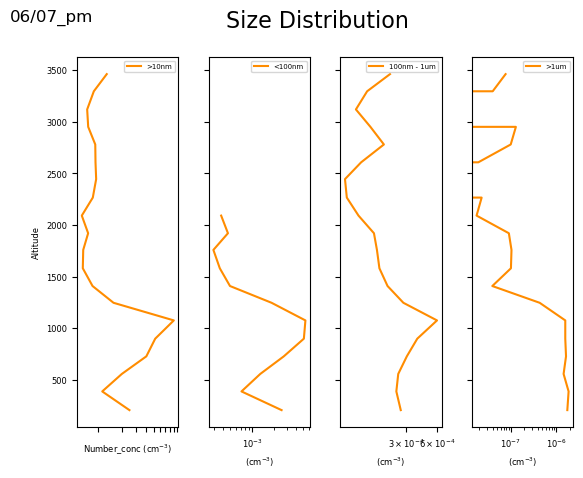

In [1068]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY7b_subset_mean['CNgt10nm_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY7b_subset_mean['nSMPS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY7b_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY7b_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=5)
ax[1].legend(loc='upper right', fontsize=5)
ax[2].legend(loc='upper right', fontsize=5)
ax[3].legend(loc='upper right', fontsize=5)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/07_pm', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

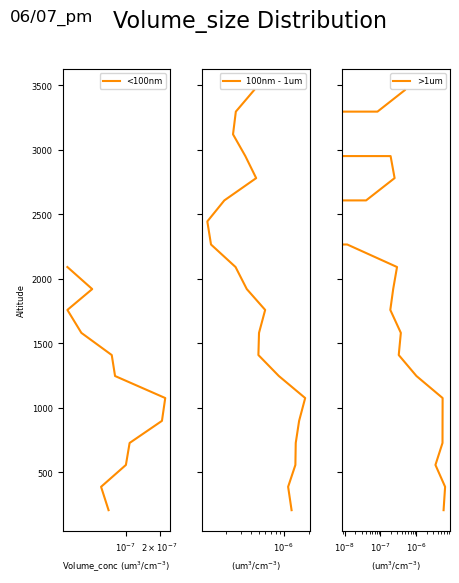

In [1069]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY7b_subset_mean['vSMPS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY7b_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY7b_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY7b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/07_pm', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1070]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220608_R0_L2_20230625T113223.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset= DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subsetstart_col2 = 'CNgt3nm_ZIEMBA'

DAY8_subset = DAY8_subset.copy()
DAY8_subset.loc[:, start_col2:] *= 1e-6
DAY8_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10668,2022-06-08 20:30:00,2022-06-08 20:30:01,32.267080,-64.998961,152.725,0.000821,0.000706,0.000332,0.000306,0.000030,1.380000e-06,1.165000e-06,0.000009,2.490000e-06,0.000544,0.000004,4.000000e-08
10669,2022-06-08 20:30:01,2022-06-08 20:30:02,32.268158,-64.999178,153.350,0.000852,0.000708,0.000331,0.000331,0.000031,1.210000e-06,1.170000e-06,0.000005,8.800000e-07,0.000544,0.000004,4.000000e-08
10670,2022-06-08 20:30:02,2022-06-08 20:30:03,32.269234,-64.999434,153.870,0.000880,0.000707,0.000330,0.000351,0.000031,1.045000e-06,1.170000e-06,0.000005,8.800000e-07,0.000544,0.000004,4.000000e-08
10671,2022-06-08 20:30:03,2022-06-08 20:30:04,32.270310,-64.999724,154.255,0.000858,0.000699,0.000332,0.000347,0.000031,1.065000e-06,1.170000e-06,0.000005,8.800000e-07,0.000544,0.000004,4.000000e-08
10672,2022-06-08 20:30:04,2022-06-08 20:30:05,32.271382,-65.000051,154.510,0.000827,0.000692,0.000335,0.000328,0.000030,1.000000e-06,1.820000e-06,0.000007,1.220000e-06,0.000544,0.000004,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,2022-06-08 20:44:55,2022-06-08 20:44:56,32.251172,-65.086081,3838.620,0.003282,0.002328,0.001602,0.000272,0.000017,4.750000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
11564,2022-06-08 20:44:56,2022-06-08 20:44:57,32.250122,-65.085465,3847.170,0.003293,0.002331,0.001612,0.000278,0.000017,4.500000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
11565,2022-06-08 20:44:57,2022-06-08 20:44:58,32.249088,-65.084808,3855.660,0.003306,0.002333,0.001613,0.000275,0.000018,5.450000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
11566,2022-06-08 20:44:58,2022-06-08 20:44:59,32.248074,-65.084107,3864.100,0.003302,0.002367,0.001615,0.000279,0.000018,5.550000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN


In [1071]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY8_subset.GPS_Altitude_THORNHILL.min(), DAY8_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY8_subset['Bins'] = pd.cut(DAY8_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY8_subset_1000 = DAY8_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_8 = DAY8_subset_1000[start_index:stop_index]
DAY1000_subset_8


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(147.455, 184.705]",2022-06-08 20:30:28.263158016,2022-06-08 20:30:29.263158016,32.290577,-65.021135,156.621053,0.000859,0.000704,0.000334,0.000303,0.000029,1.255263e-06,1.179737e-06,0.000009,0.000003,0.000536,0.000004,4.000000e-08
"(184.705, 221.955]",2022-06-08 20:31:07.000000000,2022-06-08 20:31:08.000000000,32.299647,-65.066050,200.296842,0.000854,0.000698,0.000332,0.000292,0.000029,1.347368e-06,8.607895e-07,0.000010,0.000004,0.000491,0.000004,4.000000e-08
"(221.955, 259.205]",2022-06-08 20:31:21.500000000,2022-06-08 20:31:22.500000000,32.291629,-65.080346,241.513000,0.000819,0.000670,0.000317,0.000281,0.000028,1.271000e-06,2.126500e-06,0.000019,0.000006,0.000491,0.000004,4.000000e-08
"(259.205, 296.455]",2022-06-08 20:31:32.500000000,2022-06-08 20:31:33.500000000,32.282682,-65.087075,277.773750,0.000800,0.000667,0.000319,0.000286,0.000029,1.358750e-06,1.470000e-06,0.000016,0.000006,0.000491,0.000004,4.000000e-08
"(296.455, 333.705]",2022-06-08 20:31:44.000000000,2022-06-08 20:31:45.000000000,32.272093,-65.089810,314.530000,0.000819,0.000665,0.000318,0.000275,0.000027,1.163636e-06,1.641364e-06,0.000014,0.000005,NaN,NaN,NaN
"(333.705, 370.955]",2022-06-08 20:31:54.500000000,2022-06-08 20:31:55.500000000,32.262361,-65.088187,352.470000,0.000805,0.000662,0.000313,0.000300,0.000031,1.412000e-06,1.439500e-06,0.000013,0.000004,0.000548,0.000004,5.000000e-08
"(370.955, 408.205]",2022-06-08 20:32:04.500000000,2022-06-08 20:32:05.500000000,32.253986,-65.083164,388.985500,0.000811,0.000663,0.000319,0.000293,0.000028,1.109500e-06,9.090000e-07,0.000007,0.000002,0.000548,0.000004,5.000000e-08
"(408.205, 445.455]",2022-06-08 20:32:15.500000000,2022-06-08 20:32:16.500000000,32.246732,-65.074310,425.771250,0.000798,0.000658,0.000318,0.000299,0.000029,1.197917e-06,1.555417e-06,0.000015,0.000005,0.000548,0.000004,5.000000e-08
"(445.455, 482.705]",2022-06-08 20:32:27.000000000,2022-06-08 20:32:28.000000000,32.242060,-65.062413,462.363182,0.000826,0.000660,0.000321,0.000275,0.000027,1.140000e-06,2.137273e-06,0.000018,0.000006,0.000548,0.000004,5.000000e-08


In [1072]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY8_subset_3000 = DAY8_subset_1000[start_index:stop_index]
DAY8_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1004.206, 1041.456]",2022-06-08 20:35:22.000,2022-06-08 20:35:23.000,32.281197,-65.081842,1020.976364,0.004276,0.003041,0.001824,0.000238,0.000113,1.162545e-05,1.227000e-05,0.000087,2.664409e-05,0.001366,0.000007,6.000000e-08
"(1041.456, 1078.706]",2022-06-08 20:35:35.000,2022-06-08 20:35:36.000,32.268830,-65.078436,1060.526000,0.000844,0.000659,0.000341,0.000221,0.000029,1.680000e-06,1.584333e-06,0.000013,4.439000e-06,0.001366,0.000007,6.000000e-08
"(1078.706, 1115.956]",2022-06-08 20:35:48.500,2022-06-08 20:35:49.500,32.257277,-65.070897,1096.747500,0.001210,0.000937,0.000539,0.000299,0.000036,1.911667e-06,1.848333e-06,0.000019,6.773333e-06,0.000383,0.000004,4.000000e-08
"(1115.956, 1153.206]",2022-06-08 20:36:00.500,2022-06-08 20:36:01.500,32.250081,-65.060047,1134.750833,0.000809,0.000627,0.000325,0.000279,0.000032,1.543333e-06,7.033333e-07,0.000008,2.745417e-06,0.000383,0.000004,4.000000e-08
"(1153.206, 1190.456]",2022-06-08 20:36:12.500,2022-06-08 20:36:13.500,32.247857,-65.046366,1172.759167,0.000744,0.000590,0.000336,0.000235,0.000023,8.741667e-07,9.200000e-07,0.000008,2.570833e-06,0.000383,0.000004,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(3276.459, 3313.709]",2022-06-08 20:43:51.000,2022-06-08 20:43:52.000,32.296061,-65.043973,3293.812000,0.001678,0.001205,0.000783,0.000191,0.000013,3.990000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
"(3313.709, 3350.959]",2022-06-08 20:43:55.500,2022-06-08 20:43:56.500,32.297056,-65.049661,3332.055000,0.001750,0.001299,0.000891,0.000208,0.000015,4.850000e-07,3.250000e-07,0.000001,1.700000e-07,NaN,NaN,NaN
"(3350.959, 3388.209]",2022-06-08 20:44:00.000,2022-06-08 20:44:01.000,32.297200,-65.055477,3370.516000,0.002171,0.001577,0.000952,0.000222,0.000016,4.980000e-07,1.040000e-07,0.000002,8.610000e-07,NaN,NaN,NaN


In [1073]:
nbins = 20
bins8 = np.linspace(DAY8_subset.GPS_Altitude_THORNHILL.min(), DAY8_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY8_subset['Bins'] = pd.cut(DAY8_subset['GPS_Altitude_THORNHILL'], bins8)
DAY8_subset_mean = DAY8_subset.groupby('Bins').mean()
DAY8_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(147.455, 333.705]",2022-06-08 20:30:54.614679040,2022-06-08 20:30:55.614679040,32.289520,-65.048586,201.296193,0.000844,0.000692,0.000329,0.000294,0.000029,1.274908e-06,1.289541e-06,1.151514e-05,3.926422e-06,0.000515,0.000004,4.000000e-08
"(333.705, 519.956]",2022-06-08 20:32:16.500000000,2022-06-08 20:32:17.500000000,32.248849,-65.071069,428.362037,0.000815,0.000664,0.000319,0.000293,0.000029,1.237500e-06,1.696944e-06,1.470222e-05,4.877963e-06,0.000548,0.000004,5.000000e-08
"(519.956, 706.206]",2022-06-08 20:33:13.000000000,2022-06-08 20:33:14.000000000,32.261926,-65.017916,615.028305,0.000871,0.000694,0.000331,0.000286,0.000029,1.278729e-06,1.276271e-06,1.163763e-05,3.959661e-06,0.000544,0.000004,4.000000e-08
"(706.206, 892.456]",2022-06-08 20:34:12.000000000,2022-06-08 20:34:13.000000000,32.313147,-65.031616,794.936356,0.000877,0.000691,0.000333,0.000275,0.000028,1.245678e-06,1.317119e-06,1.065831e-05,3.344407e-06,0.000483,0.000004,4.000000e-08
"(892.456, 1078.706]",2022-06-08 20:35:12.000000000,2022-06-08 20:35:13.000000000,32.290594,-65.077787,988.909590,0.001760,0.001296,0.000750,0.000167,0.000042,3.603607e-06,3.760656e-06,2.744836e-05,8.355410e-06,0.001366,0.000007,6.000000e-08
"(1078.706, 1264.956]",2022-06-08 20:36:12.000000000,2022-06-08 20:36:13.000000000,32.252865,-65.046795,1171.397119,0.000838,0.000644,0.000374,0.000251,0.000027,1.230339e-06,9.306780e-07,8.643475e-06,2.918559e-06,0.000383,0.000004,4.000000e-08
"(1264.956, 1451.207]",2022-06-08 20:37:15.500000000,2022-06-08 20:37:16.500000000,32.291238,-65.023953,1348.237353,0.000587,0.000450,0.000295,0.000155,0.000016,6.409559e-07,1.338235e-07,8.795588e-07,2.367647e-07,0.000387,0.000003,4.000000e-08
"(1451.207, 1637.457]",2022-06-08 20:38:12.500000000,2022-06-08 20:38:13.500000256,32.286974,-65.069342,1539.440000,0.000809,0.000617,0.000450,0.000161,0.000012,4.188043e-07,4.521739e-08,5.650000e-07,1.878261e-07,0.000590,0.000007,8.000000e-08
"(1637.457, 1823.707]",2022-06-08 20:38:57.500000000,2022-06-08 20:38:58.500000000,32.247780,-65.059527,1728.755909,0.000745,0.000557,0.000398,0.000139,0.000010,3.067045e-07,2.363636e-08,1.175000e-07,2.454545e-08,0.000369,0.000004,4.000000e-08


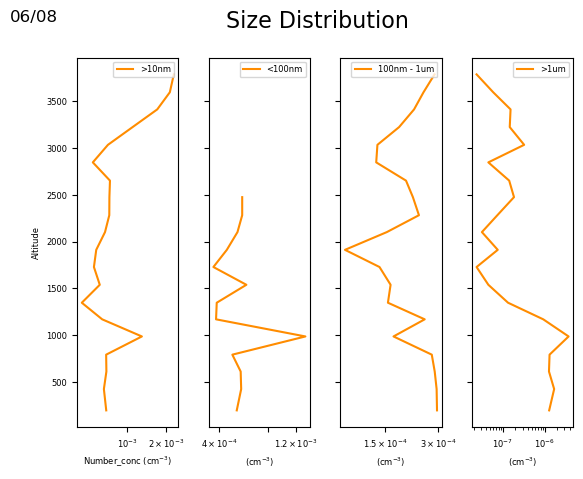

In [1074]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY8_subset_mean['CNgt10nm_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY8_subset_mean['nSMPS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY8_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY8_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/08', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

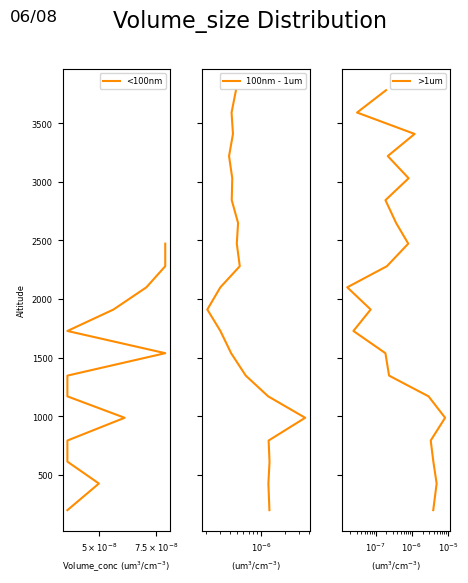

In [1075]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY8_subset_mean['vSMPS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY8_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY8_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY8_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/08', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1076]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220610_R0_L1_20230625T113224.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY10_subset = DAY10_subset.copy()
DAY10_subset.loc[:, start_col2:] *= 1e-6
DAY10_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10616,2022-06-10 15:17:00,2022-06-10 15:17:01,32.206691,-64.996969,122.040,0.000409,0.000361,0.000151,0.000156,0.000029,2.060000e-06,1.165000e-06,0.000018,8.925000e-06,0.000267,0.000002,2.000000e-08
10617,2022-06-10 15:17:01,2022-06-10 15:17:02,32.207809,-64.997169,122.105,0.000412,0.000359,0.000153,0.000148,0.000027,1.790000e-06,5.200000e-07,0.000004,1.085000e-06,0.000267,0.000002,2.000000e-08
10618,2022-06-10 15:17:02,2022-06-10 15:17:03,32.208928,-64.997370,122.170,0.000399,0.000353,0.000151,0.000146,0.000026,1.735000e-06,1.690000e-06,0.000010,2.510000e-06,0.000267,0.000002,2.000000e-08
10619,2022-06-10 15:17:03,2022-06-10 15:17:04,32.210048,-64.997569,122.240,0.000398,0.000354,0.000153,0.000133,0.000021,1.290000e-06,3.775000e-06,0.000032,9.555000e-06,0.000267,0.000002,2.000000e-08
10620,2022-06-10 15:17:04,2022-06-10 15:17:05,32.211167,-64.997768,122.315,0.000408,0.000366,0.000156,0.000136,0.000022,1.535000e-06,3.770000e-06,0.000035,1.062000e-05,0.000267,0.000002,2.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,2022-06-10 15:24:55,2022-06-10 15:24:56,32.207088,-65.031191,3540.260,0.002180,0.001647,0.000618,0.000147,0.000010,3.550000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
11092,2022-06-10 15:24:56,2022-06-10 15:24:57,32.207061,-65.029663,3546.970,0.002121,0.001656,0.000606,0.000140,0.000011,4.600000e-07,5.200000e-07,0.000003,5.450000e-07,NaN,NaN,NaN
11093,2022-06-10 15:24:57,2022-06-10 15:24:58,32.207068,-65.028134,3553.620,0.002256,0.001673,0.000609,0.000141,0.000010,4.250000e-07,5.200000e-07,0.000003,5.450000e-07,NaN,NaN,NaN
11094,2022-06-10 15:24:58,2022-06-10 15:24:59,32.207109,-65.026603,3560.200,0.002366,0.001719,0.000630,0.000151,0.000010,2.800000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN


In [1077]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10_subset.GPS_Altitude_THORNHILL.min(), DAY10_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10_subset['Bins'] = pd.cut(DAY10_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10_subset_1000 = DAY10_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10 = DAY10_subset_1000[start_index:stop_index]
DAY1000_subset_10

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(122.04, 156.487]",2022-06-10 15:17:25.000,2022-06-10 15:17:26.000,32.234724,-65.001980,124.887449,0.000410,0.000365,0.000168,0.000148,0.000026,1.731939e-06,2.213469e-06,0.000019,6.360000e-06,0.000260,0.000002,2.000000e-08
"(156.487, 190.934]",2022-06-10 15:17:52.500,2022-06-10 15:17:53.500,32.265712,-65.007683,173.583333,0.000443,0.000391,0.000195,0.000156,0.000028,1.889167e-06,3.135833e-06,0.000026,9.400000e-06,0.000246,0.000002,2.000000e-08
"(190.934, 225.381]",2022-06-10 15:17:58.000,2022-06-10 15:17:59.000,32.271642,-65.009690,209.447000,0.000402,0.000361,0.000163,0.000150,0.000027,1.743000e-06,2.772000e-06,0.000021,6.196000e-06,0.000246,0.000002,2.000000e-08
"(225.381, 259.828]",2022-06-10 15:18:03.000,2022-06-10 15:18:04.000,32.276778,-65.012305,244.213000,0.000391,0.000344,0.000145,0.000132,0.000022,1.348000e-06,2.390000e-06,0.000016,4.545000e-06,0.000246,0.000002,2.000000e-08
"(259.828, 294.274]",2022-06-10 15:18:07.500,2022-06-10 15:18:08.500,32.281179,-65.015229,277.968750,0.000403,0.000341,0.000141,0.000130,0.000023,1.530000e-06,2.950000e-06,0.000026,8.688750e-06,0.000246,0.000002,2.000000e-08
"(294.274, 328.721]",2022-06-10 15:18:12.000,2022-06-10 15:18:13.000,32.285265,-65.018732,312.805000,0.000397,0.000350,0.000150,0.000131,0.000023,1.421000e-06,1.660000e-06,0.000014,4.264000e-06,0.000246,0.000002,2.000000e-08
"(328.721, 363.168]",2022-06-10 15:18:16.500,2022-06-10 15:18:17.500,32.288972,-65.022764,349.491250,0.000429,0.000353,0.000159,0.000130,0.000022,1.311250e-06,1.526250e-06,0.000012,3.630000e-06,0.000246,0.000002,2.000000e-08
"(363.168, 397.615]",2022-06-10 15:18:20.500,2022-06-10 15:18:21.500,32.291902,-65.026748,383.632500,0.000413,0.000355,0.000150,0.000129,0.000021,1.251250e-06,1.427500e-06,0.000010,3.042500e-06,0.000246,0.000002,2.000000e-08
"(397.615, 432.062]",2022-06-10 15:18:24.500,2022-06-10 15:18:25.500,32.294477,-65.031042,417.876250,0.000394,0.000359,0.000140,0.000127,0.000020,1.226250e-06,8.450000e-07,0.000005,1.252500e-06,0.000246,0.000002,2.000000e-08


In [1078]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10_subset_3000 = DAY10_subset_1000[start_index:stop_index]
DAY10_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(983.212, 1017.659]",2022-06-10 15:19:33.500000000,2022-06-10 15:19:34.500,32.275739,-65.106964,1001.980000,0.000816,0.000681,0.000440,0.000235,0.000027,1.261250e-06,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
"(1017.659, 1052.106]",2022-06-10 15:19:37.500000000,2022-06-10 15:19:38.500,32.271564,-65.108831,1036.932500,0.000844,0.000696,0.000477,0.000232,0.000024,1.026250e-06,8.450000e-07,1.134000e-05,4.490000e-06,0.000519,0.000005,5.000000e-08
"(1052.106, 1086.553]",2022-06-10 15:19:41.500000000,2022-06-10 15:19:42.500,32.267226,-65.110161,1072.345000,0.000820,0.000687,0.000468,0.000246,0.000026,1.038750e-06,3.250000e-07,1.022500e-06,1.700000e-07,0.000519,0.000005,5.000000e-08
"(1086.553, 1121.0]",2022-06-10 15:19:45.000000256,2022-06-10 15:19:46.000,32.263340,-65.110896,1103.926667,0.000836,0.000685,0.000467,0.000252,0.000025,9.100000e-07,6.050000e-07,3.516667e-06,9.433333e-07,0.000519,0.000005,5.000000e-08
"(1121.0, 1155.447]",2022-06-10 15:19:48.500000000,2022-06-10 15:19:49.500,32.259400,-65.111207,1135.605000,0.000842,0.000672,0.000457,0.000232,0.000025,9.787500e-07,2.575000e-07,2.261250e-06,6.725000e-07,0.000519,0.000005,5.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(3291.155, 3325.602]",2022-06-10 15:24:24.000000000,2022-06-10 15:24:25.000,32.223151,-65.072506,3308.126000,0.002396,0.001765,0.000479,0.000095,0.000006,1.660000e-07,1.040000e-07,8.210000e-07,2.170000e-07,NaN,NaN,NaN
"(3325.602, 3360.049]",2022-06-10 15:24:29.000000000,2022-06-10 15:24:30.000,32.218877,-65.067075,3344.326000,0.002468,0.001826,0.000492,0.000103,0.000007,1.740000e-07,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
"(3360.049, 3394.496]",2022-06-10 15:24:33.500000000,2022-06-10 15:24:34.500,32.215503,-65.061678,3377.567500,0.002510,0.001837,0.000513,0.000094,0.000006,2.150000e-07,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [1079]:
nbins = 30
bins10 = np.linspace(DAY10_subset.GPS_Altitude_THORNHILL.min(), DAY10_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10_subset['Bins'] = pd.cut(DAY10_subset['GPS_Altitude_THORNHILL'], bins10)
DAY10_subset_mean = DAY10_subset.groupby('Bins').mean()
DAY10_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(122.04, 236.863]",2022-06-10 15:17:31.000000000,2022-06-10 15:17:32.000000000,32.241455,-65.003324,138.328361,0.000412,0.000367,0.000169,0.000149,0.000026,1.744836e-06,2.330656e-06,1.960820e-05,6.567869e-06,0.000256,0.000002,2.000000e-08
"(236.863, 351.686]",2022-06-10 15:18:09.000000000,2022-06-10 15:18:10.000000000,32.282437,-65.016572,289.956667,0.000399,0.000347,0.000148,0.000130,0.000022,1.375000e-06,2.405333e-06,1.837200e-05,5.538667e-06,0.000246,0.000002,2.000000e-08
"(351.686, 466.509]",2022-06-10 15:18:23.500000000,2022-06-10 15:18:24.500000000,32.293700,-65.030069,409.005000,0.000410,0.000355,0.000144,0.000132,0.000021,1.279286e-06,1.132143e-06,9.455714e-06,3.172500e-06,0.000246,0.000002,2.000000e-08
"(466.509, 581.332]",2022-06-10 15:18:37.500000000,2022-06-10 15:18:38.500000000,32.300058,-65.046645,522.374643,0.000428,0.000363,0.000144,0.000125,0.000019,1.093571e-06,1.631429e-06,1.511429e-05,4.972500e-06,0.000362,0.000004,4.000000e-08
"(581.332, 696.155]",2022-06-10 15:18:51.500000000,2022-06-10 15:18:52.500000000,32.301288,-65.064674,638.021071,0.000460,0.000394,0.000158,0.000128,0.000018,9.757143e-07,5.185714e-07,4.952857e-06,1.636071e-06,0.000362,0.000004,4.000000e-08
"(696.155, 810.978]",2022-06-10 15:19:05.000000000,2022-06-10 15:19:06.000000000,32.297655,-65.081499,751.861923,0.000559,0.000479,0.000211,0.000157,0.000020,9.588462e-07,5.200000e-07,3.840769e-06,1.103077e-06,0.000362,0.000004,4.000000e-08
"(810.978, 925.801]",2022-06-10 15:19:18.000000000,2022-06-10 15:19:19.000000000,32.289623,-65.095296,864.329231,0.000742,0.000610,0.000343,0.000209,0.000024,1.018462e-06,3.992308e-07,3.469231e-06,9.976923e-07,0.000362,0.000004,4.000000e-08
"(925.801, 1040.624]",2022-06-10 15:19:31.000000000,2022-06-10 15:19:31.999999744,32.278159,-65.105354,979.653462,0.000791,0.000665,0.000413,0.000228,0.000026,1.158846e-06,4.992308e-07,4.494231e-06,1.382308e-06,NaN,NaN,NaN
"(1040.624, 1155.447]",2022-06-10 15:19:44.000000000,2022-06-10 15:19:45.000000000,32.264424,-65.110509,1094.993846,0.000832,0.000682,0.000465,0.000244,0.000026,9.846154e-07,5.388462e-07,4.516154e-06,1.525769e-06,0.000519,0.000005,5.000000e-08


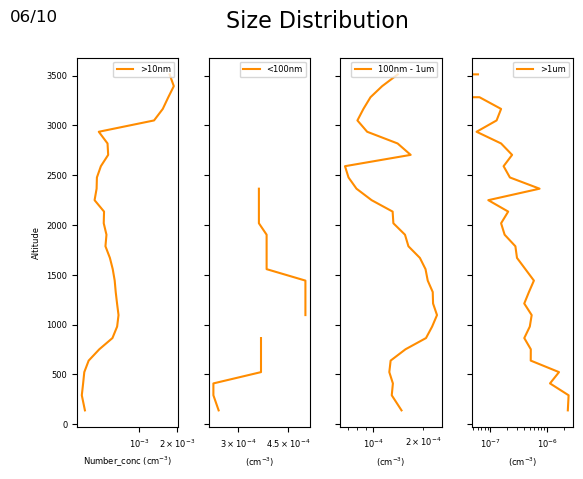

In [1080]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY10_subset_mean['CNgt10nm_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY10_subset_mean['nSMPS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY10_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY10_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/10', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

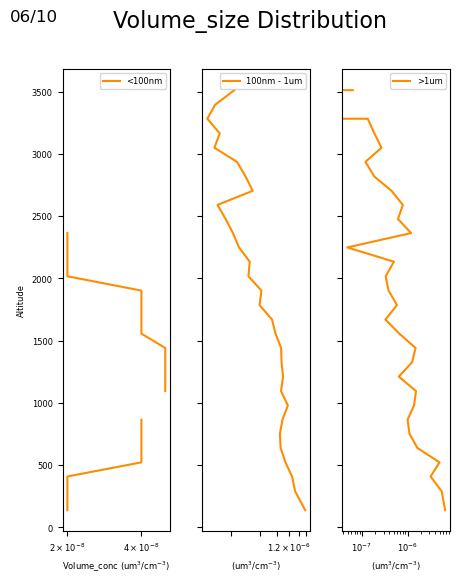

In [1081]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY10_subset_mean['vSMPS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY10_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY10_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY10_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=7))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/10', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1082]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220610_R0_L2_20230625T113224.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:45:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]

start_col2 = 'CNgt3nm_ZIEMBA'

DAY10b_subset = DAY10b_subset.copy()
DAY10b_subset.loc[:, start_col2:] *= 1e-6
DAY10b_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
7182,2022-06-10 19:30:00,2022-06-10 19:30:01,31.639092,-65.606420,113.375,0.000612,0.000507,0.000231,0.000233,0.000034,1.775000e-06,2.075000e-06,0.000032,1.344500e-05,0.000367,0.000004,4.000000e-08
7183,2022-06-10 19:30:01,2022-06-10 19:30:02,31.639446,-65.607515,113.225,0.000598,0.000493,0.000227,0.000227,0.000037,2.260000e-06,1.040000e-06,0.000009,2.705000e-06,0.000367,0.000004,4.000000e-08
7184,2022-06-10 19:30:02,2022-06-10 19:30:03,31.639806,-65.608607,113.065,0.000586,0.000485,0.000228,0.000209,0.000033,1.955000e-06,1.165000e-06,0.000005,8.800000e-07,0.000367,0.000004,4.000000e-08
7185,2022-06-10 19:30:03,2022-06-10 19:30:04,31.640170,-65.609698,112.970,0.000584,0.000492,0.000232,0.000217,0.000031,1.755000e-06,1.815000e-06,0.000007,1.220000e-06,0.000367,0.000004,4.000000e-08
7186,2022-06-10 19:30:04,2022-06-10 19:30:05,31.640539,-65.610788,112.985,0.000587,0.000497,0.000233,0.000231,0.000036,2.275000e-06,6.500000e-07,0.000002,3.400000e-07,0.000367,0.000004,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,2022-06-10 20:44:55,2022-06-10 20:44:56,32.077748,-64.914861,1636.660,0.000641,0.000517,0.000338,0.000229,0.000022,7.550000e-07,0.000000e+00,0.000000,0.000000e+00,0.000398,0.000003,3.000000e-08
11678,2022-06-10 20:44:56,2022-06-10 20:44:57,32.078715,-64.913869,1630.380,0.000628,0.000522,0.000338,0.000218,0.000021,7.150000e-07,5.200000e-07,0.000006,2.160000e-06,0.000398,0.000003,3.000000e-08
11679,2022-06-10 20:44:57,2022-06-10 20:44:58,32.079681,-64.912880,1624.290,0.000666,0.000523,0.000335,0.000213,0.000021,8.000000e-07,5.200000e-07,0.000006,2.160000e-06,0.000398,0.000003,3.000000e-08
11680,2022-06-10 20:44:58,2022-06-10 20:44:59,32.080646,-64.911895,1618.170,0.000657,0.000521,0.000329,0.000236,0.000025,9.650000e-07,0.000000e+00,0.000000,0.000000e+00,0.000398,0.000003,3.000000e-08


In [1083]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10b_subset.GPS_Altitude_THORNHILL.min(), DAY10b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10b_subset['Bins'] = pd.cut(DAY10b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10b_subset_1000 = DAY10b_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10b = DAY10b_subset_1000[start_index:stop_index]
DAY1000_subset_10b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.665, 154.556]",2022-06-10 19:58:30.078994432,2022-06-10 19:58:31.078994688,31.432104,-65.822952,121.109551,0.001260,0.001002,0.000569,0.000251,0.000038,0.000002,3.218824e-06,0.000029,0.000010,0.001093,0.000007,7.420147e-08
"(154.556, 203.446]",2022-06-10 20:05:57.967741952,2022-06-10 20:05:58.967741952,31.357706,-65.882896,180.078387,0.000673,0.000573,0.000287,0.000230,0.000036,0.000002,2.726129e-06,0.000028,0.000010,0.000431,0.000005,5.483871e-08
"(203.446, 252.337]",2022-06-10 20:07:05.333333248,2022-06-10 20:07:06.333333504,31.358167,-65.882335,226.973333,0.000664,0.000561,0.000282,0.000243,0.000039,0.000002,3.885000e-06,0.000030,0.000009,0.000431,0.000005,5.476190e-08
"(252.337, 301.227]",2022-06-10 20:05:36.318181632,2022-06-10 20:05:37.318181888,31.385854,-65.887268,275.281136,0.000661,0.000569,0.000292,0.000256,0.000042,0.000003,2.990455e-06,0.000029,0.000010,0.000430,0.000005,5.454545e-08
"(301.227, 350.118]",2022-06-10 20:00:42.809523712,2022-06-10 20:00:43.809523712,31.488493,-65.882240,325.297857,0.000676,0.000564,0.000293,0.000249,0.000039,0.000002,3.536190e-06,0.000036,0.000013,0.000419,0.000005,5.117647e-08
"(350.118, 399.008]",2022-06-10 19:59:54.944444416,2022-06-10 19:59:55.944444416,31.522585,-65.877189,375.466944,0.000648,0.000554,0.000289,0.000229,0.000037,0.000002,3.163333e-06,0.000030,0.000011,0.000432,0.000004,5.000000e-08
"(399.008, 447.899]",2022-06-10 20:00:48.157894656,2022-06-10 20:00:49.157894912,31.494981,-65.885690,424.339474,0.000659,0.000560,0.000295,0.000258,0.000042,0.000003,3.605526e-06,0.000038,0.000014,0.000395,0.000004,4.571429e-08
"(447.899, 496.789]",2022-06-10 20:00:51.368421120,2022-06-10 20:00:52.368421120,31.501844,-65.883638,473.128158,0.000686,0.000581,0.000311,0.000260,0.000040,0.000002,3.759474e-06,0.000035,0.000012,0.001208,0.000004,4.357143e-08
"(496.789, 545.68]",2022-06-10 20:02:18.277777920,2022-06-10 20:02:19.277777920,31.488428,-65.880187,521.287778,0.000676,0.000577,0.000306,0.000263,0.000040,0.000002,3.943056e-06,0.000036,0.000012,0.001381,0.000004,4.428571e-08


In [1084]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10b_subset_3000 = DAY10b_subset_1000[start_index:stop_index]
DAY10b_subset_3000.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,50,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,2022-06-10 20:07:34.749670400,2022-06-10 20:07:35.749670400,31.508025,-65.767047,2207.934501,0.001529,0.001066,0.000544,0.000294,0.000038,2.085364e-06,1.217180e-06,1.067407e-05,3.593706e-06,0.000863,0.000005,4.655574e-08
min,2022-06-10 19:56:57.444444416,2022-06-10 19:56:58.444444672,31.218992,-65.949112,1011.126667,0.000654,0.000502,0.000278,0.000114,0.000008,2.330952e-07,4.952381e-08,2.037500e-07,3.400000e-08,0.000305,0.000003,3.130435e-08
25%,2022-06-10 20:04:50.338949632,2022-06-10 20:04:51.338949632,31.404345,-65.877020,1611.398305,0.000711,0.000563,0.000358,0.000165,0.000017,7.112065e-07,1.859154e-07,1.580897e-06,4.758566e-07,0.000402,0.000003,3.620536e-08
50%,2022-06-10 20:08:06.340952320,2022-06-10 20:08:07.340952576,31.556393,-65.744984,2206.686000,0.000801,0.000655,0.000395,0.000241,0.000024,1.023517e-06,6.135182e-07,5.718568e-06,1.758300e-06,0.000500,0.000004,3.875000e-08
75%,2022-06-10 20:10:48.834542848,2022-06-10 20:10:49.834542848,31.596532,-65.692428,2809.107242,0.001939,0.001336,0.000517,0.000265,0.000034,1.883297e-06,1.543773e-06,1.488191e-05,5.314373e-06,0.001184,0.000004,4.249224e-08
max,2022-06-10 20:15:26.571428608,2022-06-10 20:15:27.571428608,31.716792,-65.539598,3409.206667,0.004729,0.003013,0.001729,0.001850,0.000378,2.688720e-05,1.241820e-05,9.599480e-05,3.027540e-05,0.003476,0.000019,1.713158e-07
std,NaN,NaN,0.144690,0.106499,712.474631,0.001257,0.000762,0.000364,0.000293,0.000057,3.985417e-06,1.933667e-06,1.570516e-05,5.139103e-06,0.000748,0.000003,2.473513e-08


In [1085]:
nbins = 30
bins10b = np.linspace(DAY10b_subset.GPS_Altitude_THORNHILL.min(), DAY10b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10b_subset['Bins'] = pd.cut(DAY10b_subset['GPS_Altitude_THORNHILL'], bins10b)
DAY10b_subset_mean= DAY10b_subset.groupby('Bins').mean()
DAY10b_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.665, 268.634]",2022-06-10 19:59:15.001620736,2022-06-10 19:59:16.001620736,31.425164,-65.828878,129.477715,0.001202,0.000960,0.000541,0.000250,0.000038,2.302472e-06,3.228063e-06,2.885919e-05,9.768201e-06,0.001008,0.000007,7.171306e-08
"(268.634, 431.602]",2022-06-10 20:01:46.984848384,2022-06-10 20:01:47.984848640,31.476984,-65.881638,348.163258,0.000661,0.000561,0.000292,0.000246,0.000039,2.391591e-06,3.198636e-06,3.314159e-05,1.209985e-05,0.000425,0.000005,5.205128e-08
"(431.602, 594.57]",2022-06-10 20:08:21.057692160,2022-06-10 20:08:22.057692160,31.374756,-65.897839,544.127115,0.001728,0.001312,0.000801,0.000221,0.000034,2.055096e-06,2.903510e-06,2.635207e-05,9.048702e-06,0.001445,0.000004,4.457143e-08
"(594.57, 757.539]",2022-06-10 20:11:13.524999936,2022-06-10 20:11:14.525000192,31.349422,-65.897509,635.586156,0.002712,0.002002,0.001262,0.000179,0.000025,1.461563e-06,1.299719e-06,1.265741e-05,4.416188e-06,0.002193,0.000006,5.145161e-08
"(757.539, 920.507]",2022-06-10 20:00:20.028985600,2022-06-10 20:00:21.028985600,31.542150,-65.870960,832.953768,0.000719,0.000603,0.000317,0.000219,0.000034,2.087899e-06,3.576957e-06,3.628710e-05,1.306058e-05,0.000408,0.000004,4.360656e-08
"(920.507, 1083.476]",2022-06-10 19:59:56.844827392,2022-06-10 19:59:57.844827392,31.536779,-65.872991,1005.576897,0.000710,0.000595,0.000308,0.000251,0.000037,2.212328e-06,3.272500e-06,3.012345e-05,1.031345e-05,0.000365,0.000004,4.139535e-08
"(1083.476, 1246.444]",2022-06-10 20:10:27.914285568,2022-06-10 20:10:28.914285568,31.277652,-65.923448,1207.062457,0.002954,0.002137,0.001304,0.000320,0.000045,2.647114e-06,2.358086e-06,2.170386e-05,7.500771e-06,0.003092,0.000013,1.148462e-07
"(1246.444, 1409.413]",2022-06-10 20:04:34.531249920,2022-06-10 20:04:35.531249920,31.350788,-65.907727,1316.439375,0.000784,0.000646,0.000349,0.000257,0.000034,1.816927e-06,2.280156e-06,2.210885e-05,7.908177e-06,0.000851,0.000005,4.569444e-08
"(1409.413, 1572.382]",2022-06-10 20:01:58.392156672,2022-06-10 20:01:59.392156672,31.464150,-65.872754,1481.577059,0.000818,0.000656,0.000414,0.000266,0.000032,1.522745e-06,1.344020e-06,1.347824e-05,4.704510e-06,0.000547,0.000004,4.133333e-08


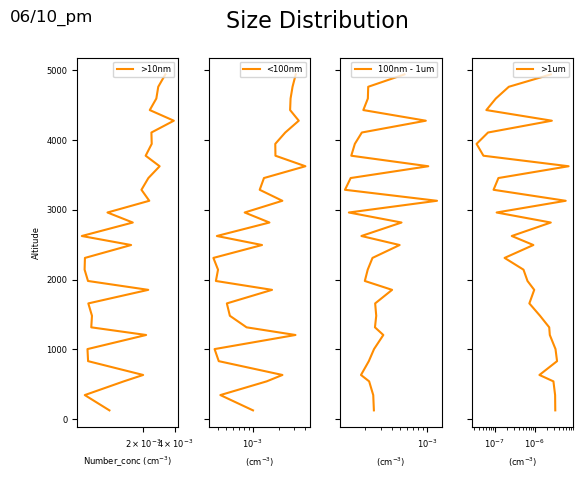

In [1086]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY10b_subset_mean['CNgt10nm_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY10b_subset_mean['nSMPS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY10b_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY10b_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/10_pm', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

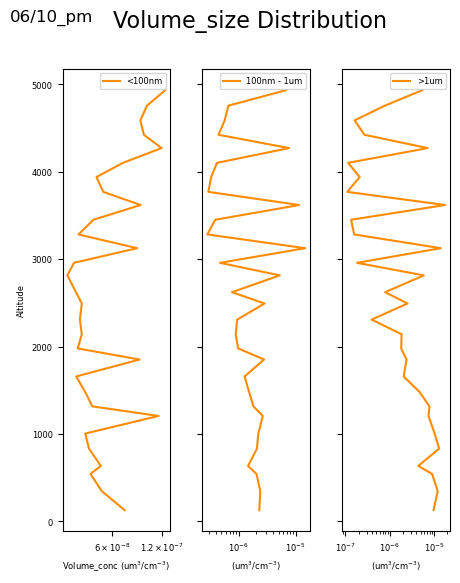

In [1087]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY10b_subset_mean['vSMPS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY10b_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY10b_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY10b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/10_pm', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1088]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220611_R0_L1_20230625T113225.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY11_subset = DAY11_subset.copy()
DAY11_subset.loc[:, start_col2:] *= 1e-6
DAY11_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY11_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10800,2022-06-11 15:24:00,2022-06-11 15:24:01,32.234864,-64.977277,137.985,0.000570,0.000473,0.000281,0.000203,0.000036,2.275000e-06,0.000005,0.000035,0.000010,0.000384,0.000004,4.000000e-08
10801,2022-06-11 15:24:01,2022-06-11 15:24:02,32.233969,-64.976649,138.245,0.000571,0.000476,0.000279,0.000213,0.000035,1.980000e-06,0.000005,0.000062,0.000025,0.000384,0.000004,4.000000e-08
10802,2022-06-11 15:24:02,2022-06-11 15:24:03,32.233058,-64.976063,138.485,0.000592,0.000472,0.000282,0.000220,0.000034,1.795000e-06,0.000006,0.000082,0.000033,0.000384,0.000004,4.000000e-08
10803,2022-06-11 15:24:03,2022-06-11 15:24:04,32.232130,-64.975521,138.740,0.000586,0.000481,0.000286,0.000225,0.000037,2.330000e-06,0.000004,0.000043,0.000014,0.000384,0.000004,4.000000e-08
10804,2022-06-11 15:24:04,2022-06-11 15:24:05,32.231186,-64.975026,139.035,0.000596,0.000487,0.000285,0.000211,0.000039,2.650000e-06,0.000001,0.000014,0.000005,0.000384,0.000004,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2022-06-11 15:41:55,2022-06-11 15:41:56,32.259305,-64.971567,4701.700,0.006461,0.004147,0.002570,0.000296,0.000019,6.850000e-07,0.000000,0.000000,0.000000,0.004487,0.000021,2.000000e-07
11876,2022-06-11 15:41:56,2022-06-11 15:41:57,32.258543,-64.970428,4708.440,0.006370,0.004150,0.002564,0.000298,0.000017,4.750000e-07,0.000000,0.000000,0.000000,0.004487,0.000021,2.000000e-07
11877,2022-06-11 15:41:57,2022-06-11 15:41:58,32.257745,-64.969326,4714.800,0.006518,0.004153,0.002600,0.000304,0.000018,4.850000e-07,0.000000,0.000000,0.000000,0.004487,0.000021,2.000000e-07
11878,2022-06-11 15:41:58,2022-06-11 15:41:59,32.256913,-64.968261,4720.960,0.006581,0.004120,0.002645,0.000290,0.000017,4.400000e-07,0.000000,0.000000,0.000000,0.004487,0.000021,2.000000e-07


In [1089]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11_subset.GPS_Altitude_THORNHILL.min(), DAY11_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11_subset['Bins'] = pd.cut(DAY11_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11_subset_1000 = DAY11_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11 = DAY11_subset_1000[start_index:stop_index]
DAY1000_subset_11


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(137.295, 183.191]",2022-06-11 15:24:38.129870080,2022-06-11 15:24:39.129870080,32.204798,-64.988412,141.553312,0.000574,0.000451,0.000263,0.000199,0.000033,0.000002,0.000003,0.000027,0.000010,0.000292,0.000003,3.278689e-08
"(183.191, 229.087]",2022-06-11 15:25:26.500000000,2022-06-11 15:25:27.500000000,32.202954,-65.032135,206.207778,0.000420,0.000327,0.000183,0.000173,0.000029,0.000002,0.000003,0.000029,0.000010,0.000174,0.000002,2.000000e-08
"(229.087, 274.983]",2022-06-11 15:25:52.000000000,2022-06-11 15:25:53.000000000,32.228031,-65.036850,245.256061,0.000409,0.000316,0.000176,0.000170,0.000030,0.000002,0.000003,0.000030,0.000011,0.000174,0.000002,2.000000e-08
"(274.983, 320.88]",2022-06-11 15:26:15.000000000,2022-06-11 15:26:16.000000000,32.246544,-65.020245,296.365000,0.000365,0.000290,0.000151,0.000152,0.000025,0.000001,0.000002,0.000018,0.000006,0.000174,0.000002,2.000000e-08
"(320.88, 366.776]",2022-06-11 15:26:29.000000000,2022-06-11 15:26:30.000000000,32.249193,-65.003673,343.615333,0.000344,0.000270,0.000142,0.000149,0.000023,0.000001,0.000002,0.000016,0.000006,0.000161,0.000002,2.000000e-08
"(366.776, 412.672]",2022-06-11 15:26:42.500000000,2022-06-11 15:26:43.500000000,32.245849,-64.988606,392.922917,0.000388,0.000295,0.000146,0.000158,0.000023,0.000001,0.000003,0.000027,0.000009,0.000161,0.000002,2.000000e-08
"(412.672, 458.568]",2022-06-11 15:26:58.000000000,2022-06-11 15:26:59.000000000,32.235916,-64.976487,435.027105,0.000368,0.000283,0.000157,0.000156,0.000027,0.000002,0.000003,0.000040,0.000015,0.000161,0.000002,2.000000e-08
"(458.568, 504.464]",2022-06-11 15:27:15.500000000,2022-06-11 15:27:16.500000000,32.220892,-64.971716,479.601875,0.000351,0.000274,0.000158,0.000156,0.000027,0.000002,0.000004,0.000047,0.000018,0.000161,0.000002,2.000000e-08
"(504.464, 550.36]",2022-06-11 15:27:29.500000000,2022-06-11 15:27:30.500000000,32.208667,-64.976034,527.068750,0.000356,0.000276,0.000160,0.000151,0.000028,0.000002,0.000003,0.000033,0.000012,0.000156,0.000002,2.000000e-08


In [1090]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11_subset_3000 = DAY11_subset_1000[start_index:stop_index]
DAY11_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1009.322, 1055.218]",2022-06-11 15:29:30.500000000,2022-06-11 15:29:31.500000000,32.257405,-64.988247,1035.389286,0.000368,0.000279,0.000167,0.000144,0.000028,2.208214e-06,5.650714e-06,0.000058,2.098714e-05,0.000127,0.000001,2.000000e-08
"(1055.218, 1101.114]",2022-06-11 15:29:43.500000000,2022-06-11 15:29:44.500000000,32.250209,-64.974320,1074.022500,0.000355,0.000270,0.000157,0.000132,0.000022,1.535833e-06,3.275833e-06,0.000036,1.379667e-05,0.000127,0.000001,2.000000e-08
"(1101.114, 1147.01]",2022-06-11 15:29:57.500000000,2022-06-11 15:29:58.500000000,32.237558,-64.966375,1125.470625,0.000346,0.000257,0.000137,0.000124,0.000020,1.365937e-06,2.310625e-06,0.000020,6.712500e-06,0.000127,0.000001,2.000000e-08
"(1147.01, 1192.906]",2022-06-11 15:30:12.500000000,2022-06-11 15:30:13.500000000,32.222628,-64.967036,1170.586429,0.000360,0.000270,0.000153,0.000128,0.000023,1.756786e-06,2.049643e-06,0.000024,8.975357e-06,0.000127,0.000001,2.000000e-08
"(1192.906, 1238.803]",2022-06-11 15:30:26.000000000,2022-06-11 15:30:27.000000000,32.211306,-64.975437,1213.892308,0.000391,0.000289,0.000163,0.000125,0.000021,1.552308e-06,2.995000e-06,0.000032,1.157615e-05,0.000208,0.000003,3.000000e-08
"(1238.803, 1284.699]",2022-06-11 15:30:37.500000000,2022-06-11 15:30:38.500000000,32.205044,-64.986735,1261.504000,0.000377,0.000282,0.000164,0.000131,0.000023,1.722500e-06,2.388000e-06,0.000029,1.115050e-05,0.000208,0.000003,3.000000e-08
"(1284.699, 1330.595]",2022-06-11 15:30:48.000000000,2022-06-11 15:30:49.000000000,32.203083,-64.998878,1309.650000,0.000401,0.000300,0.000179,0.000144,0.000026,1.987727e-06,4.652727e-06,0.000050,1.881091e-05,0.000208,0.000003,3.000000e-08
"(1330.595, 1376.491]",2022-06-11 15:30:59.999999744,2022-06-11 15:31:01.000000000,32.205292,-65.012958,1354.406154,0.000445,0.000329,0.000213,0.000163,0.000034,2.788846e-06,6.798462e-06,0.000073,2.769077e-05,0.000208,0.000003,3.000000e-08
"(1376.491, 1422.387]",2022-06-11 15:31:12.500000000,2022-06-11 15:31:13.500000000,32.212001,-65.026047,1397.715000,0.000532,0.000389,0.000253,0.000174,0.000030,2.202500e-06,6.033333e-06,0.000063,2.302333e-05,0.000208,0.000003,3.000000e-08


In [1091]:
nbins = 30
bins11 = np.linspace(DAY11_subset.GPS_Altitude_THORNHILL.min(), DAY11_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11_subset['Bins'] = pd.cut(DAY11_subset['GPS_Altitude_THORNHILL'], bins11)
DAY11_subset_mean = DAY11_subset.groupby('Bins').mean()
DAY11_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(137.295, 290.282]",2022-06-11 15:25:06.496240640,2022-06-11 15:25:07.496240640,32.211814,-65.007714,181.377594,0.000505,0.000395,0.000227,0.000187,0.000032,1.948459e-06,2.695940e-06,2.765470e-05,9.874850e-06,0.000244,0.000002,2.757282e-08
"(290.282, 443.269]",2022-06-11 15:26:37.500000000,2022-06-11 15:26:38.500000000,32.245155,-64.995268,372.151771,0.000363,0.000283,0.000147,0.000154,0.000024,1.390521e-06,2.433333e-06,2.526719e-05,9.324792e-06,0.000162,0.000002,2.000000e-08
"(443.269, 596.256]",2022-06-11 15:27:23.500000000,2022-06-11 15:27:24.500000000,32.214431,-64.975954,510.426818,0.000358,0.000277,0.000160,0.000155,0.000028,2.029659e-06,3.798068e-06,4.301045e-05,1.636943e-05,0.000158,0.000002,2.000000e-08
"(596.256, 749.244]",2022-06-11 15:28:00.500000000,2022-06-11 15:28:01.500000000,32.198700,-65.006314,663.759667,0.000362,0.000278,0.000159,0.000143,0.000026,1.952833e-06,3.511667e-06,3.459800e-05,1.226383e-05,0.000156,0.000002,2.000000e-08
"(749.244, 902.231]",2022-06-11 15:28:34.500000000,2022-06-11 15:28:35.500000000,32.222391,-65.031718,836.737895,0.000348,0.000262,0.000145,0.000138,0.000023,1.632237e-06,3.433816e-06,3.428368e-05,1.243118e-05,0.000143,0.000002,2.000000e-08
"(902.231, 1055.218]",2022-06-11 15:29:15.500000000,2022-06-11 15:29:16.500000000,32.254845,-65.006887,976.859773,0.000350,0.000267,0.000151,0.000129,0.000023,1.652500e-06,3.718977e-06,3.886761e-05,1.408636e-05,0.000139,0.000002,2.000000e-08
"(1055.218, 1208.205]",2022-06-11 15:30:01.000000256,2022-06-11 15:30:02.000000000,32.233851,-64.969209,1133.821702,0.000356,0.000267,0.000150,0.000128,0.000022,1.579468e-06,2.462660e-06,2.517330e-05,9.138936e-06,0.000127,0.000001,2.000000e-08
"(1208.205, 1361.192]",2022-06-11 15:30:43.000000000,2022-06-11 15:30:44.000000000,32.205279,-64.993412,1285.365405,0.000401,0.000298,0.000177,0.000140,0.000025,1.915000e-06,4.077027e-06,4.540473e-05,1.702041e-05,0.000208,0.000003,3.000000e-08
"(1361.192, 1514.18]",2022-06-11 15:31:19.500000000,2022-06-11 15:31:20.500000000,32.218507,-65.030435,1431.766944,0.000611,0.000453,0.000272,0.000188,0.000032,2.409583e-06,6.174028e-06,6.818069e-05,2.562569e-05,0.000225,0.000003,3.000000e-08


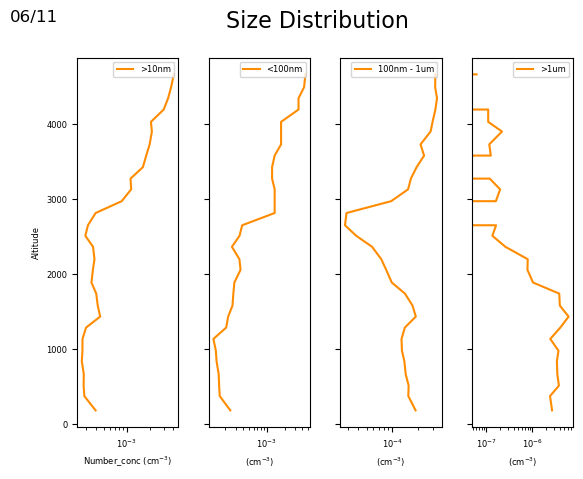

In [1092]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY11_subset_mean['CNgt10nm_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY11_subset_mean['nSMPS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY11_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY11_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
#ax[0].set_xlim([300, 500])
#ax[2].set_xlim([100, 300])
#ax[3].set_xlim([0, 2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/11', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

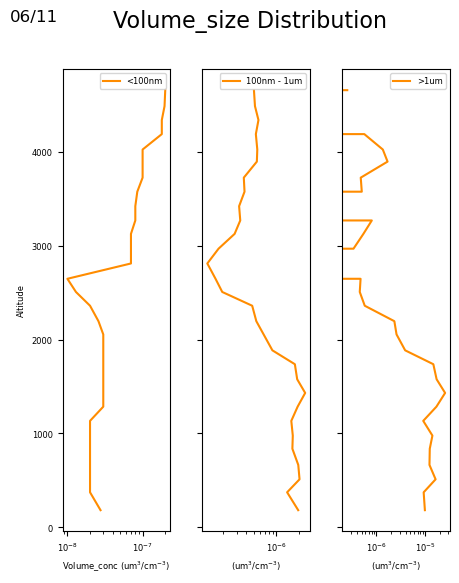

In [1093]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY11_subset_mean['vSMPS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY11_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY11_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY11_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/11', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1094]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220611_R0_L2_20230625T113225.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:00:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:30:00"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY11b_subset = DAY11b_subset.copy()
DAY11b_subset.loc[:, start_col2:] *= 1e-6
DAY11b_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY11b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
9350,2022-06-11 20:00:00,2022-06-11 20:00:01,30.851085,-64.222657,132.360,0.000581,0.000418,0.000197,0.000227,0.000030,1.410000e-06,1.035000e-06,0.000007,0.000002,0.000268,0.000003,4.000000e-08
9351,2022-06-11 20:00:01,2022-06-11 20:00:02,30.851840,-64.221712,132.715,0.000565,0.000419,0.000195,0.000232,0.000029,1.300000e-06,1.555000e-06,0.000011,0.000003,0.000268,0.000003,4.000000e-08
9352,2022-06-11 20:00:02,2022-06-11 20:00:03,30.852625,-64.220800,133.040,0.000528,0.000413,0.000191,0.000244,0.000031,1.580000e-06,2.725000e-06,0.000018,0.000005,0.000268,0.000003,4.000000e-08
9353,2022-06-11 20:00:03,2022-06-11 20:00:04,30.853437,-64.219921,133.300,0.000531,0.000410,0.000197,0.000236,0.000029,1.290000e-06,3.770000e-06,0.000028,0.000007,0.000268,0.000003,4.000000e-08
9354,2022-06-11 20:00:04,2022-06-11 20:00:05,30.854278,-64.219077,133.540,0.000559,0.000411,0.000202,0.000226,0.000029,1.430000e-06,1.565000e-06,0.000013,0.000004,0.000268,0.000003,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,2022-06-11 20:29:55,2022-06-11 20:29:56,31.260152,-64.521769,3323.730,0.000952,0.000644,0.000352,0.000110,0.000008,2.400000e-07,5.200000e-07,0.000010,0.000004,0.000656,0.000004,4.000000e-08
11146,2022-06-11 20:29:56,2022-06-11 20:29:57,31.261412,-64.522059,3325.020,0.000912,0.000642,0.000341,0.000113,0.000007,1.750000e-07,0.000000e+00,0.000000,0.000000,0.000656,0.000004,4.000000e-08
11147,2022-06-11 20:29:57,2022-06-11 20:29:58,31.262673,-64.522348,3326.270,0.000938,0.000633,0.000339,0.000114,0.000008,3.400000e-07,0.000000e+00,0.000000,0.000000,0.000656,0.000004,4.000000e-08
11148,2022-06-11 20:29:58,2022-06-11 20:29:59,31.263934,-64.522638,3327.430,0.000893,0.000611,0.000333,0.000129,0.000009,3.650000e-07,0.000000e+00,0.000000,0.000000,0.000656,0.000004,4.000000e-08


In [1095]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11b_subset.GPS_Altitude_THORNHILL.min(), DAY11b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11b_subset['Bins'] = pd.cut(DAY11b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11b_subset_1000 = DAY11b_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11b = DAY11b_subset_1000[start_index:stop_index]
DAY1000_subset_11b


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(108.925, 141.12]",2022-06-11 20:04:07.512096768,2022-06-11 20:04:08.512096768,31.035566,-64.424176,123.488034,0.000601,0.000470,0.000247,0.000211,0.000029,0.000002,0.000002,0.000016,0.000005,0.000339,0.000004,4.356383e-08
"(141.12, 173.315]",2022-06-11 20:08:18.500000000,2022-06-11 20:08:19.500000000,31.221775,-64.662991,155.437500,0.000529,0.000415,0.000174,0.000118,0.000021,0.000001,0.000002,0.000015,0.000005,0.000168,0.000002,2.000000e-08
"(173.315, 205.51]",2022-06-11 20:08:22.500000000,2022-06-11 20:08:23.500000000,31.222161,-64.667873,188.907500,0.000530,0.000400,0.000170,0.000107,0.000017,0.000001,0.000001,0.000012,0.000004,0.000168,0.000002,2.000000e-08
"(205.51, 237.706]",2022-06-11 20:08:26.500000000,2022-06-11 20:08:27.500000000,31.222612,-64.672638,223.777500,0.000522,0.000389,0.000174,0.000136,0.000024,0.000002,0.000002,0.000020,0.000007,0.000168,0.000002,2.000000e-08
"(237.706, 269.901]",2022-06-11 20:08:30.000000000,2022-06-11 20:08:30.999999744,31.223105,-64.676702,256.585000,0.000389,0.000289,0.000160,0.000156,0.000025,0.000002,0.000002,0.000017,0.000005,0.000168,0.000002,2.000000e-08
"(269.901, 302.096]",2022-06-11 20:08:33.500000000,2022-06-11 20:08:34.500000000,31.223615,-64.680669,288.658750,0.000350,0.000283,0.000155,0.000133,0.000024,0.000002,0.000004,0.000041,0.000016,0.000168,0.000002,2.000000e-08
"(302.096, 334.291]",2022-06-11 20:08:38.500000000,2022-06-11 20:08:39.500000000,31.224804,-64.686121,320.795833,0.000353,0.000272,0.000152,0.000139,0.000023,0.000002,0.000004,0.000041,0.000014,0.000168,0.000002,2.000000e-08
"(334.291, 366.486]",2022-06-11 20:08:43.500000000,2022-06-11 20:08:44.500000000,31.226848,-64.691161,351.048750,0.000364,0.000275,0.000153,0.000158,0.000025,0.000002,0.000003,0.000029,0.000009,NaN,NaN,NaN
"(366.486, 398.681]",2022-06-11 20:08:46.999999744,2022-06-11 20:08:48.000000000,31.228959,-64.694189,384.708333,0.000358,0.000281,0.000155,0.000175,0.000031,0.000002,0.000004,0.000041,0.000014,NaN,NaN,NaN


In [1096]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11b_subset_3000 = DAY11b_subset_1000[start_index:stop_index]
DAY11b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1010.389, 1042.584]",2022-06-11 20:10:22.999999744,2022-06-11 20:10:24.000000000,31.228788,-64.661029,1025.980000,0.000568,0.000442,0.000221,0.000177,0.000025,1.678333e-06,3.073333e-06,0.000034,1.184333e-05,0.000300,0.000003,4.000000e-08
"(1042.584, 1074.779]",2022-06-11 20:10:26.500000000,2022-06-11 20:10:27.500000000,31.226313,-64.664300,1058.642500,0.000580,0.000437,0.000217,0.000153,0.000023,1.596250e-06,1.203750e-06,0.000009,2.525000e-06,0.000300,0.000003,4.000000e-08
"(1074.779, 1106.975]",2022-06-11 20:10:30.000000000,2022-06-11 20:10:30.999999744,31.224284,-64.667959,1091.333333,0.000596,0.000452,0.000231,0.000156,0.000021,1.158333e-06,3.203333e-06,0.000031,9.940000e-06,0.000300,0.000003,4.000000e-08
"(1106.975, 1139.17]",2022-06-11 20:10:33.500000000,2022-06-11 20:10:34.500000000,31.222815,-64.671970,1121.872500,0.000606,0.000461,0.000242,0.000158,0.000023,1.372500e-06,2.171250e-06,0.000024,8.863750e-06,0.000300,0.000003,4.000000e-08
"(1139.17, 1171.365]",2022-06-11 20:10:37.000000256,2022-06-11 20:10:38.000000000,31.221921,-64.676211,1153.480000,0.000595,0.000458,0.000244,0.000176,0.000024,1.508333e-06,3.160000e-06,0.000026,8.476667e-06,0.000300,0.000003,4.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(3135.269, 3167.464]",2022-06-11 20:18:06.769230848,2022-06-11 20:18:07.769230848,31.241240,-64.609057,3150.196154,0.001691,0.001044,0.000659,0.000201,0.000013,4.346154e-07,4.392308e-07,0.000004,1.757692e-06,0.000645,0.000003,3.500000e-08
"(3167.464, 3199.659]",2022-06-11 20:29:04.500000000,2022-06-11 20:29:05.500000000,31.198084,-64.505758,3184.927500,0.000900,0.000607,0.000311,0.000104,0.000008,3.187500e-07,0.000000e+00,0.000000,0.000000e+00,0.000659,0.000005,5.000000e-08
"(3199.659, 3231.855]",2022-06-11 20:29:08.500000000,2022-06-11 20:29:09.500000000,31.202882,-64.507282,3218.335000,0.000898,0.000615,0.000327,0.000109,0.000008,2.375000e-07,0.000000e+00,0.000000,0.000000e+00,0.000659,0.000005,5.000000e-08


In [1097]:
nbins = 30
bins11b = np.linspace(DAY11b_subset.GPS_Altitude_THORNHILL.min(), DAY11b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11b_subset['Bins'] = pd.cut(DAY11b_subset['GPS_Altitude_THORNHILL'], bins11b)
DAY11b_subset_mean = DAY11b_subset.groupby('Bins').mean()
DAY11b_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(108.925, 216.242]",2022-06-11 20:04:12.029702912,2022-06-11 20:04:13.029702912,31.038888,-64.428486,124.431406,0.000600,0.000469,0.000246,0.000209,0.000029,1.599198e-06,1.840653e-06,0.000016,5.339069e-06,0.000335,0.000004,4.301299e-08
"(216.242, 323.559]",2022-06-11 20:08:32.500000000,2022-06-11 20:08:33.500000000,31.223552,-64.679480,276.677500,0.000397,0.000305,0.000159,0.000140,0.000024,1.595357e-06,3.097857e-06,0.000033,1.159964e-05,0.000168,0.000002,2.000000e-08
"(323.559, 430.876]",2022-06-11 20:08:46.000000000,2022-06-11 20:08:47.000000000,31.228553,-64.693123,376.119231,0.000362,0.000275,0.000155,0.000163,0.000027,1.759231e-06,4.304615e-06,0.000038,1.216346e-05,NaN,NaN,NaN
"(430.876, 538.194]",2022-06-11 20:09:02.500000000,2022-06-11 20:09:03.500000000,31.242406,-64.701219,478.705750,0.000382,0.000282,0.000154,0.000151,0.000027,1.900750e-06,3.131250e-06,0.000033,1.199450e-05,0.000228,0.000003,3.000000e-08
"(538.194, 645.511]",2022-06-11 20:09:20.000000000,2022-06-11 20:09:21.000000000,31.258439,-64.695567,599.767333,0.000434,0.000332,0.000167,0.000163,0.000027,1.757000e-06,2.966667e-06,0.000025,8.302000e-06,0.000228,0.000003,3.000000e-08
"(645.511, 752.828]",2022-06-11 20:09:35.500000000,2022-06-11 20:09:36.500000000,31.264692,-64.679068,692.189375,0.000496,0.000384,0.000182,0.000160,0.000025,1.622500e-06,1.955625e-06,0.000021,7.539687e-06,0.000228,0.000003,3.000000e-08
"(752.828, 860.145]",2022-06-11 20:09:51.500000000,2022-06-11 20:09:52.500000000,31.258596,-64.661677,813.828125,0.000581,0.000443,0.000228,0.000177,0.000027,1.650312e-06,2.415313e-06,0.000020,6.391562e-06,0.000300,0.000003,4.000000e-08
"(860.145, 967.462]",2022-06-11 20:10:06.500000000,2022-06-11 20:10:07.500000000,31.244740,-64.654466,919.573214,0.000679,0.000510,0.000288,0.000204,0.000029,1.741071e-06,2.030000e-06,0.000021,7.270714e-06,0.000300,0.000003,4.000000e-08
"(967.462, 1074.78]",2022-06-11 20:10:21.000000000,2022-06-11 20:10:22.000000000,31.230685,-64.659814,1015.313333,0.000632,0.000482,0.000264,0.000183,0.000026,1.611667e-06,2.017000e-06,0.000020,7.054667e-06,0.000300,0.000003,4.000000e-08


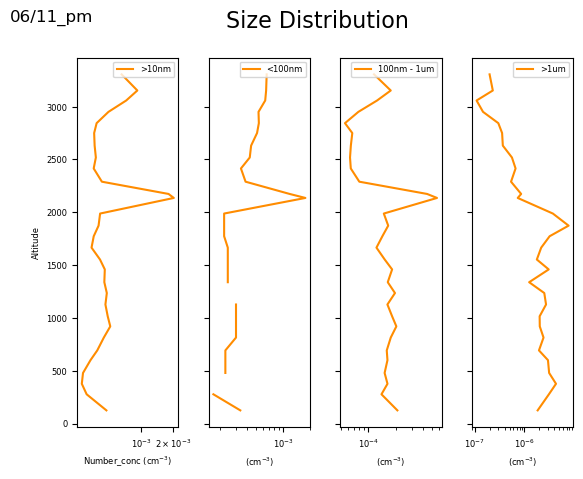

In [1098]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY11b_subset_mean['CNgt10nm_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY11b_subset_mean['nSMPS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY11b_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY11b_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/11_pm', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

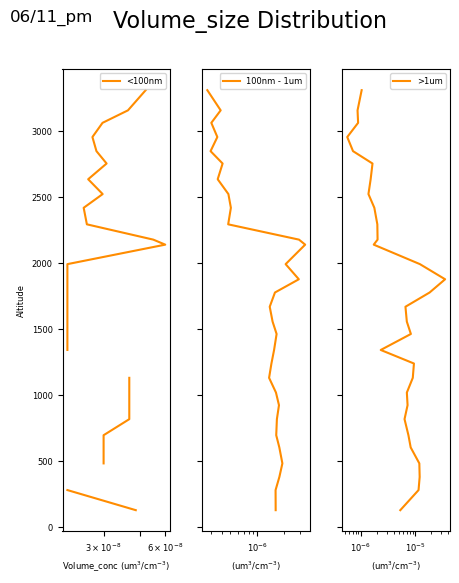

In [1099]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY11b_subset_mean['vSMPS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY11b_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY11b_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY11b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/11_pm', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1100]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220613_R0_L1_20230625T113226.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY13_subset = DAY13_subset.copy()
DAY13_subset.loc[:, start_col2:] *= 1e-6
DAY13_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10015,2022-06-13 14:30:00,2022-06-13 14:30:01,32.210354,-65.054053,141.795,0.000264,0.000202,0.000098,0.000094,0.000012,5.500000e-07,0.000000e+00,0.000000,0.000000,0.000147,0.000001,1.000000e-08
10016,2022-06-13 14:30:01,2022-06-13 14:30:02,32.209934,-65.052981,141.725,0.000267,0.000204,0.000100,0.000108,0.000017,9.900000e-07,0.000000e+00,0.000000,0.000000,0.000147,0.000001,1.000000e-08
10017,2022-06-13 14:30:02,2022-06-13 14:30:03,32.209541,-65.051894,141.615,0.000271,0.000211,0.000106,0.000104,0.000017,1.005000e-06,5.200000e-07,0.000004,0.000001,0.000147,0.000001,1.000000e-08
10018,2022-06-13 14:30:03,2022-06-13 14:30:04,32.209173,-65.050793,141.460,0.000280,0.000213,0.000108,0.000107,0.000015,7.300000e-07,5.200000e-07,0.000004,0.000001,0.000147,0.000001,1.000000e-08
10019,2022-06-13 14:30:04,2022-06-13 14:30:05,32.208832,-65.049680,141.275,0.000266,0.000210,0.000106,0.000113,0.000017,9.600000e-07,5.200000e-07,0.000004,0.000001,0.000147,0.000001,1.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10970,2022-06-13 14:45:55,2022-06-13 14:45:56,32.197220,-65.046274,4504.770,0.004422,0.002998,0.002199,0.000282,0.000017,4.650000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
10971,2022-06-13 14:45:56,2022-06-13 14:45:57,32.196954,-65.044914,4514.670,0.004615,0.002977,0.002185,0.000298,0.000018,4.600000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
10972,2022-06-13 14:45:57,2022-06-13 14:45:58,32.196726,-65.043543,4523.980,0.004820,0.003041,0.002205,0.000275,0.000016,4.200000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
10973,2022-06-13 14:45:58,2022-06-13 14:45:59,32.196539,-65.042160,4532.940,0.004678,0.003019,0.002182,0.000259,0.000015,3.800000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN


In [1101]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13_subset.GPS_Altitude_THORNHILL.min(), DAY13_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13_subset['Bins'] = pd.cut(DAY13_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13_subset_1000 = DAY13_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13 = DAY13_subset_1000[start_index:stop_index]
DAY1000_subset_13


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(138.195, 182.23]",2022-06-13 14:30:32.200000000,2022-06-13 14:30:33.200,32.215823,-65.019495,142.037308,0.000279,0.000220,0.000112,0.000104,0.000015,7.866154e-07,7.809231e-07,0.000008,3.006154e-06,0.000146,0.000001,1.000000e-08
"(182.23, 226.264]",2022-06-13 14:31:11.500000000,2022-06-13 14:31:12.500,32.245854,-64.994298,201.121250,0.000286,0.000223,0.000110,0.000109,0.000016,8.441667e-07,1.050833e-06,0.000011,4.056667e-06,0.000140,0.000001,1.000000e-08
"(226.264, 270.299]",2022-06-13 14:31:24.000000256,2022-06-13 14:31:25.000,32.259352,-64.997848,250.047308,0.000278,0.000213,0.000096,0.000104,0.000015,7.876923e-07,7.800000e-07,0.000010,4.134615e-06,0.000140,0.000001,1.000000e-08
"(270.299, 314.334]",2022-06-13 14:31:36.500000000,2022-06-13 14:31:37.500,32.271439,-65.006302,292.679167,0.000259,0.000203,0.000088,0.000095,0.000014,8.250000e-07,5.091667e-07,0.000004,1.256667e-06,0.000140,0.000001,1.000000e-08
"(314.334, 358.368]",2022-06-13 14:31:48.000000000,2022-06-13 14:31:49.000,32.279961,-65.017932,338.120000,0.000257,0.000198,0.000081,0.000095,0.000014,7.022727e-07,4.963636e-07,0.000003,8.481818e-07,NaN,NaN,NaN
"(358.368, 402.403]",2022-06-13 14:32:01.000000000,2022-06-13 14:32:02.000,32.285610,-65.034070,380.360667,0.000274,0.000214,0.000096,0.000091,0.000014,7.323333e-07,8.640000e-07,0.000010,3.892000e-06,0.000141,0.000001,1.000000e-08
"(402.403, 446.438]",2022-06-13 14:32:13.000000000,2022-06-13 14:32:14.000,32.287260,-65.050147,423.533333,0.000267,0.000206,0.000081,0.000078,0.000010,4.744444e-07,9.533333e-07,0.000009,3.110000e-06,0.000141,0.000001,1.000000e-08
"(446.438, 490.472]",2022-06-13 14:32:22.000000000,2022-06-13 14:32:23.000,32.285677,-65.062083,469.225556,0.000284,0.000216,0.000090,0.000090,0.000012,6.194444e-07,3.177778e-07,0.000002,4.355556e-07,0.000141,0.000001,1.000000e-08
"(490.472, 534.507]",2022-06-13 14:32:33.000000000,2022-06-13 14:32:34.000,32.280467,-65.075342,512.890385,0.000277,0.000214,0.000083,0.000076,0.000011,6.115385e-07,6.384615e-07,0.000008,3.284615e-06,0.000141,0.000001,1.000000e-08


In [1102]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13_subset_3000 = DAY13_subset_1000[start_index:stop_index]
DAY13_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1018.888, 1062.923]",2022-06-13 14:34:55.500,2022-06-13 14:34:56.500000000,32.220498,-64.995521,1042.884167,0.000392,0.000289,0.000146,0.000119,0.000022,1.690417e-06,3.758750e-06,4.339958e-05,1.641208e-05,0.000178,0.000002,2.000000e-08
"(1062.923, 1106.957]",2022-06-13 14:35:07.500,2022-06-13 14:35:08.500000000,32.233581,-64.989205,1085.528333,0.000376,0.000285,0.000140,0.000109,0.000019,1.370833e-06,4.132083e-06,3.826125e-05,1.442625e-05,0.000178,0.000002,2.000000e-08
"(1106.957, 1150.992]",2022-06-13 14:35:20.000,2022-06-13 14:35:21.000000000,32.248197,-64.987717,1131.330000,0.000397,0.000304,0.000144,0.000116,0.000022,1.636538e-06,4.153846e-06,5.246154e-05,2.073577e-05,0.000178,0.000002,2.000000e-08
"(1150.992, 1195.027]",2022-06-13 14:35:35.000,2022-06-13 14:35:36.000000000,32.265068,-64.993100,1172.945882,0.000365,0.000273,0.000145,0.000104,0.000020,1.595000e-06,4.067941e-06,4.918000e-05,1.991441e-05,0.000178,0.000002,2.000000e-08
"(1195.027, 1239.061]",2022-06-13 14:35:49.500,2022-06-13 14:35:50.500000000,32.278863,-65.004578,1216.515000,0.000392,0.000300,0.000182,0.000133,0.000031,2.860000e-06,7.789583e-06,7.477750e-05,2.662667e-05,0.000181,0.000002,2.000000e-08
"(1239.061, 1283.096]",2022-06-13 14:36:04.000,2022-06-13 14:36:05.000000000,32.288351,-65.020848,1261.682353,0.000404,0.000301,0.000188,0.000139,0.000033,3.020000e-06,8.738529e-06,9.246647e-05,3.412471e-05,0.000181,0.000002,2.000000e-08
"(1283.096, 1327.131]",2022-06-13 14:36:18.000,2022-06-13 14:36:19.000000000,32.292196,-65.039287,1304.431818,0.000416,0.000315,0.000199,0.000158,0.000039,3.720455e-06,8.002273e-06,1.033950e-04,4.125091e-05,0.000181,0.000002,2.000000e-08
"(1327.131, 1371.165]",2022-06-13 14:36:32.000,2022-06-13 14:36:33.000000000,32.290319,-65.058117,1351.644118,0.000410,0.000310,0.000202,0.000155,0.000033,2.937941e-06,7.916471e-06,9.572265e-05,3.790118e-05,0.000181,0.000002,2.000000e-08
"(1371.165, 1415.2]",2022-06-13 14:36:48.500,2022-06-13 14:36:49.500000000,32.280732,-65.077275,1389.921875,0.000364,0.000280,0.000184,0.000136,0.000031,2.839375e-06,4.800000e-06,5.321125e-05,1.953969e-05,0.000216,0.000003,3.000000e-08


In [1103]:
nbins = 20
bins13 = np.linspace(DAY13_subset.GPS_Altitude_THORNHILL.min(), DAY13_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13_subset['Bins'] = pd.cut(DAY13_subset['GPS_Altitude_THORNHILL'], bins13)
DAY13_subset_mean = DAY13_subset.groupby('Bins').mean()
DAY13_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(138.195, 358.368]",2022-06-13 14:30:56.539823104,2022-06-13 14:30:57.539823104,32.236169,-65.012776,195.822699,0.000275,0.000215,0.000104,0.000103,0.000015,7.887168e-07,7.529204e-07,7.564912e-06,2.851681e-06,0.000143,0.000001,1.000000e-08
"(358.368, 578.542]",2022-06-13 14:32:22.500000000,2022-06-13 14:32:23.500000000,32.281669,-65.061194,467.023879,0.000276,0.000214,0.000089,0.000083,0.000012,6.256897e-07,7.583621e-07,7.955517e-06,2.933190e-06,0.000141,0.000001,1.000000e-08
"(578.542, 798.715]",2022-06-13 14:33:21.500000000,2022-06-13 14:33:22.500000000,32.232911,-65.091581,689.368917,0.000487,0.000369,0.000220,0.000156,0.000020,1.068333e-06,1.475667e-06,1.507733e-05,5.389583e-06,0.000264,0.000003,3.000000e-08
"(798.715, 1018.888]",2022-06-13 14:34:20.500000000,2022-06-13 14:34:21.500000000,32.201632,-65.035167,912.744914,0.000424,0.000321,0.000156,0.000134,0.000022,1.486034e-06,2.681638e-06,2.689241e-05,1.009103e-05,0.000202,0.000002,2.000000e-08
"(1018.888, 1239.061]",2022-06-13 14:35:22.500000000,2022-06-13 14:35:23.500000000,32.250425,-64.993859,1133.128788,0.000383,0.000289,0.000151,0.000115,0.000022,1.809773e-06,4.716970e-06,5.144424e-05,1.966197e-05,0.000178,0.000002,2.000000e-08
"(1239.061, 1459.234]",2022-06-13 14:36:32.000000000,2022-06-13 14:36:33.000000000,32.284290,-65.055790,1346.567123,0.000394,0.000297,0.000193,0.000144,0.000033,3.038425e-06,7.164384e-06,8.107493e-05,3.103500e-05,0.000190,0.000002,2.258621e-08
"(1459.234, 1679.408]",2022-06-13 14:37:45.500000000,2022-06-13 14:37:46.500000000,32.222328,-65.078515,1565.221757,0.000406,0.000301,0.000195,0.000131,0.000025,2.067905e-06,4.725068e-06,4.724135e-05,1.730912e-05,0.000219,0.000003,3.000000e-08
"(1679.408, 1899.581]",2022-06-13 14:38:58.500000000,2022-06-13 14:38:59.500000000,32.215370,-65.000897,1785.496389,0.000441,0.000323,0.000198,0.000130,0.000025,2.060000e-06,4.392014e-06,4.582194e-05,1.692063e-05,0.000218,0.000003,3.000000e-08
"(1899.581, 2119.754]",2022-06-13 14:40:12.000000000,2022-06-13 14:40:13.000000000,32.281408,-65.006446,2005.465600,0.000461,0.000335,0.000161,0.000093,0.000018,1.490733e-06,3.653067e-06,3.614533e-05,1.300773e-05,0.000250,0.000003,3.000000e-08


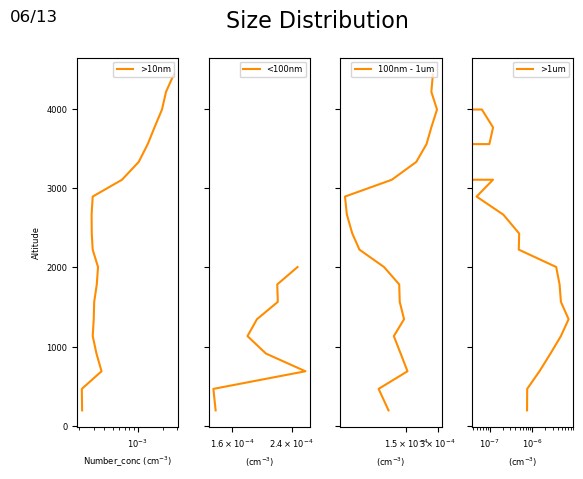

In [1104]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY13_subset_mean['CNgt10nm_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY13_subset_mean['nSMPS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY13_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY13_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

fig.text(0.02, 0.98, '06/13', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

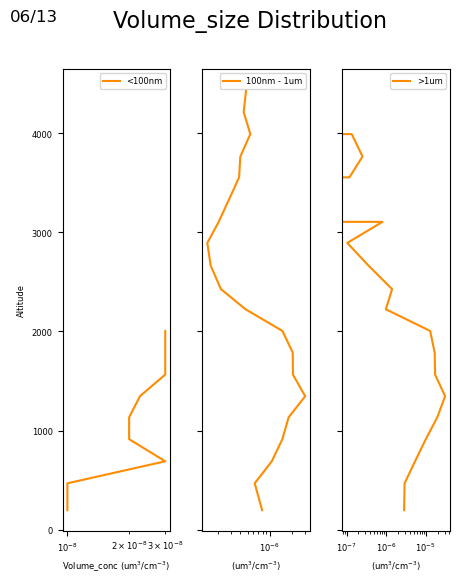

In [1105]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY13_subset_mean['vSMPS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY13_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY13_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY13_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/13', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1106]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220613_R0_L2_20230625T113226.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY13b_subset = DAY13b_subset.copy()
DAY13b_subset.loc[:, start_col2:] *= 1e-6
DAY13b_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY13b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10610,2022-06-13 19:46:00,2022-06-13 19:46:01,32.251226,-65.007304,106.13,0.000249,0.000200,0.000075,0.000096,0.000017,1.075000e-06,5.200000e-07,0.000006,0.000002,NaN,NaN,NaN
10611,2022-06-13 19:46:01,2022-06-13 19:46:02,32.250414,-65.006555,105.59,0.000245,0.000193,0.000078,0.000089,0.000015,8.650000e-07,5.200000e-07,0.000006,0.000002,0.000134,0.000001,1.000000e-08
10612,2022-06-13 19:46:02,2022-06-13 19:46:03,32.249605,-65.005808,106.45,0.000245,0.000192,0.000078,0.000089,0.000015,8.550000e-07,5.200000e-07,0.000006,0.000002,0.000134,0.000001,1.000000e-08
10613,2022-06-13 19:46:03,2022-06-13 19:46:04,32.248799,-65.005062,108.91,0.000237,0.000195,0.000076,0.000092,0.000016,1.025000e-06,5.200000e-07,0.000006,0.000002,0.000134,0.000001,1.000000e-08
10614,2022-06-13 19:46:04,2022-06-13 19:46:05,32.247996,-65.004323,112.60,0.000234,0.000199,0.000077,0.000094,0.000015,8.550000e-07,0.000000e+00,0.000000,0.000000,0.000134,0.000001,1.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2022-06-13 20:08:55,2022-06-13 20:08:56,32.290180,-64.996666,4558.09,0.004285,0.002691,0.001868,0.000313,0.000020,5.400000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11986,2022-06-13 20:08:56,2022-06-13 20:08:57,32.289203,-64.997413,4565.53,0.004060,0.002591,0.001835,0.000312,0.000019,4.900000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11987,2022-06-13 20:08:57,2022-06-13 20:08:58,32.288204,-64.998124,4572.98,0.004020,0.002627,0.001871,0.000323,0.000020,5.650000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
11988,2022-06-13 20:08:58,2022-06-13 20:08:59,32.287185,-64.998799,4580.36,0.004056,0.002646,0.001864,0.000317,0.000021,6.100000e-07,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN


In [1107]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13b_subset.GPS_Altitude_THORNHILL.min(), DAY13b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13b_subset['Bins'] = pd.cut(DAY13b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13b_subset_1000 = DAY13b_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13b = DAY13b_subset_1000[start_index:stop_index]
DAY1000_subset_13b


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.59, 150.409]",2022-06-13 19:46:21.476190464,2022-06-13 19:46:22.476190464,32.235045,-64.990851,121.140833,0.000259,0.000201,0.000089,0.000086,0.000013,6.359524e-07,4.754762e-07,3.592143e-06,1.139286e-06,0.000134,0.000001,1.000000e-08
"(150.409, 195.228]",2022-06-13 19:46:50.000000000,2022-06-13 19:46:51.000000000,32.223206,-64.962163,172.722000,0.000276,0.000220,0.000105,0.000072,0.000011,5.226667e-07,2.946667e-07,1.708667e-06,4.066667e-07,0.000134,0.000001,1.000000e-08
"(195.228, 240.047]",2022-06-13 19:47:03.500000000,2022-06-13 19:47:04.500000000,32.226886,-64.946746,218.451667,0.000231,0.000178,0.000070,0.000075,0.000010,4.595833e-07,8.583333e-08,1.078333e-06,3.583333e-07,0.000135,0.000001,1.000000e-08
"(240.047, 284.866]",2022-06-13 19:47:16.500000000,2022-06-13 19:47:17.500000000,32.235473,-64.934988,261.591786,0.000220,0.000176,0.000066,0.000069,0.000010,4.500000e-07,2.407143e-07,2.988571e-06,1.352857e-06,0.000135,0.000001,1.000000e-08
"(284.866, 329.686]",2022-06-13 19:47:33.000000000,2022-06-13 19:47:34.000000000,32.250778,-64.927901,307.752895,0.000203,0.000159,0.000049,0.000060,0.000009,4.097368e-07,2.047368e-07,1.212105e-06,2.923684e-07,0.000135,0.000001,1.000000e-08
"(329.686, 374.505]",2022-06-13 19:47:48.000000000,2022-06-13 19:47:49.000000000,32.265570,-64.930424,352.170000,0.000197,0.000152,0.000044,0.000059,0.000009,3.977273e-07,1.418182e-07,9.790909e-07,2.459091e-07,0.000135,0.000001,1.000000e-08
"(374.505, 419.324]",2022-06-13 19:48:00.500000000,2022-06-13 19:48:01.500000000,32.275624,-64.938790,397.117857,0.000198,0.000152,0.000042,0.000055,0.000008,3.646429e-07,1.671429e-07,1.220714e-06,3.571429e-07,0.000126,0.000001,1.000000e-08
"(419.324, 464.143]",2022-06-13 19:48:11.500000000,2022-06-13 19:48:12.500000000,32.281952,-64.948895,442.846250,0.000187,0.000150,0.000042,0.000061,0.000009,4.250000e-07,1.625000e-07,5.087500e-07,8.500000e-08,0.000126,0.000001,1.000000e-08
"(464.143, 508.962]",2022-06-13 19:48:21.500000000,2022-06-13 19:48:22.500000000,32.284827,-64.959460,489.259167,0.000194,0.000152,0.000041,0.000055,0.000008,3.833333e-07,3.033333e-07,2.140417e-06,5.420833e-07,0.000126,0.000001,1.000000e-08


In [1108]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13b_subset_3000 = DAY13b_subset_1000[start_index:stop_index]
DAY13b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1001.972, 1046.791]",2022-06-13 19:51:08.500000000,2022-06-13 19:51:09.500000000,32.277795,-64.944534,1023.430000,0.000461,0.000348,0.000205,0.000129,0.000015,7.710000e-07,1.426500e-06,1.666250e-05,6.236500e-06,0.000230,0.000002,3.000000e-08
"(1046.791, 1091.61]",2022-06-13 19:51:18.500000000,2022-06-13 19:51:19.500000000,32.285446,-64.953669,1069.449000,0.000533,0.000396,0.000246,0.000153,0.000019,9.615000e-07,1.051000e-06,6.173000e-06,1.600500e-06,0.000230,0.000002,3.000000e-08
"(1091.61, 1136.429]",2022-06-13 19:51:28.500000000,2022-06-13 19:51:29.500000000,32.290798,-64.964661,1113.492000,0.000431,0.000322,0.000150,0.000114,0.000018,1.208000e-06,2.182000e-06,2.422550e-05,8.784000e-06,0.000230,0.000002,3.000000e-08
"(1136.429, 1181.248]",2022-06-13 19:51:38.500000000,2022-06-13 19:51:39.500000000,32.293438,-64.976744,1163.157000,0.000437,0.000314,0.000142,0.000114,0.000020,1.509500e-06,2.826500e-06,3.129250e-05,1.198650e-05,0.000230,0.000002,3.000000e-08
"(1181.248, 1226.067]",2022-06-13 19:51:52.000000000,2022-06-13 19:51:53.000000000,32.292299,-64.993297,1203.252353,0.000382,0.000288,0.000141,0.000120,0.000021,1.595000e-06,3.837353e-06,4.012794e-05,1.507676e-05,0.000230,0.000002,3.000000e-08
"(1226.067, 1270.887]",2022-06-13 19:52:08.500000000,2022-06-13 19:52:09.500000000,32.284282,-65.011196,1245.613750,0.000394,0.000287,0.000146,0.000120,0.000026,2.193125e-06,4.711250e-06,5.069094e-05,1.893187e-05,0.000203,0.000002,2.000000e-08
"(1270.887, 1315.706]",2022-06-13 19:52:25.000000000,2022-06-13 19:52:26.000000000,32.270083,-65.022916,1291.343529,0.000409,0.000309,0.000158,0.000124,0.000026,2.220294e-06,5.796471e-06,6.240147e-05,2.335706e-05,0.000203,0.000002,2.000000e-08
"(1315.706, 1360.525]",2022-06-13 19:52:41.000000000,2022-06-13 19:52:42.000000000,32.253286,-65.026168,1340.182667,0.000385,0.000290,0.000165,0.000123,0.000026,2.211333e-06,6.288667e-06,6.762400e-05,2.535567e-05,0.000203,0.000002,2.000000e-08
"(1360.525, 1405.344]",2022-06-13 19:52:54.500000000,2022-06-13 19:52:55.500000000,32.239093,-65.022448,1385.006667,0.000374,0.000282,0.000169,0.000131,0.000030,2.752500e-06,7.176667e-06,7.599083e-05,2.786083e-05,NaN,NaN,NaN


In [1109]:
nbins = 30
bins13b = np.linspace(DAY13b_subset.GPS_Altitude_THORNHILL.min(), DAY13b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13b_subset['Bins'] = pd.cut(DAY13b_subset['GPS_Altitude_THORNHILL'], bins13b)
DAY13b_subset_mean = DAY13b_subset.groupby('Bins').mean()
DAY13b_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.59, 254.987]",2022-06-13 19:46:37.486486528,2022-06-13 19:46:38.486486272,32.231111,-64.974342,155.893514,0.000256,0.000200,0.000088,0.000080,0.000012,5.758784e-07,3.435135e-07,2.560000e-06,7.871622e-07,0.000134,0.000001,1.000000e-08
"(254.987, 404.384]",2022-06-13 19:47:39.000000000,2022-06-13 19:47:40.000000000,32.256446,-64.931294,327.717959,0.000202,0.000159,0.000049,0.000060,0.000009,3.924490e-07,2.277551e-07,1.892449e-06,6.571429e-07,0.000134,0.000001,1.000000e-08
"(404.384, 553.781]",2022-06-13 19:48:25.000000000,2022-06-13 19:48:26.000000000,32.283472,-64.963381,493.271744,0.000191,0.000151,0.000041,0.000055,0.000008,3.822093e-07,1.813953e-07,1.002558e-06,2.332558e-07,0.000126,0.000001,1.000000e-08
"(553.781, 703.178]",2022-06-13 19:49:10.000000256,2022-06-13 19:49:11.000000000,32.262713,-64.998132,623.513830,0.000205,0.000157,0.000040,0.000048,0.000006,2.803191e-07,2.595745e-07,2.744681e-06,9.582979e-07,0.000133,0.000001,1.000000e-08
"(703.178, 852.575]",2022-06-13 19:49:55.000000000,2022-06-13 19:49:56.000000000,32.229218,-64.977353,783.578372,0.000267,0.000205,0.000069,0.000060,0.000008,4.425581e-07,5.918605e-07,6.996744e-06,2.545698e-06,0.000173,0.000001,1.571429e-08
"(852.575, 1001.972]",2022-06-13 19:50:40.000000256,2022-06-13 19:50:41.000000000,32.248741,-64.939051,915.960106,0.000320,0.000242,0.000106,0.000074,0.000010,5.934043e-07,1.280957e-06,1.278660e-05,4.431809e-06,0.000205,0.000002,2.093750e-08
"(1001.972, 1151.369]",2022-06-13 19:51:19.500000000,2022-06-13 19:51:20.500000000,32.285189,-64.955383,1073.425625,0.000473,0.000353,0.000197,0.000131,0.000017,1.009688e-06,1.682656e-06,1.793281e-05,6.611563e-06,0.000230,0.000002,3.000000e-08
"(1151.369, 1300.766]",2022-06-13 19:52:03.000000000,2022-06-13 19:52:04.000000000,32.284887,-65.003659,1232.018182,0.000399,0.000297,0.000147,0.000120,0.000024,1.923455e-06,4.478091e-06,4.625355e-05,1.704091e-05,0.000210,0.000002,2.250000e-08
"(1300.766, 1450.163]",2022-06-13 19:52:56.000000000,2022-06-13 19:52:57.000000000,32.238747,-65.018660,1384.676275,0.000382,0.000287,0.000171,0.000128,0.000028,2.436961e-06,6.217255e-06,6.443147e-05,2.360353e-05,0.000177,0.000002,2.000000e-08


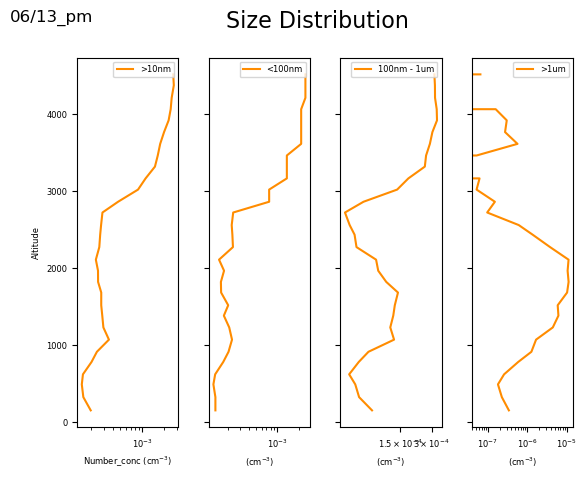

In [1110]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY13b_subset_mean['CNgt10nm_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY13b_subset_mean['nSMPS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY13b_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY13b_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/13_pm', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

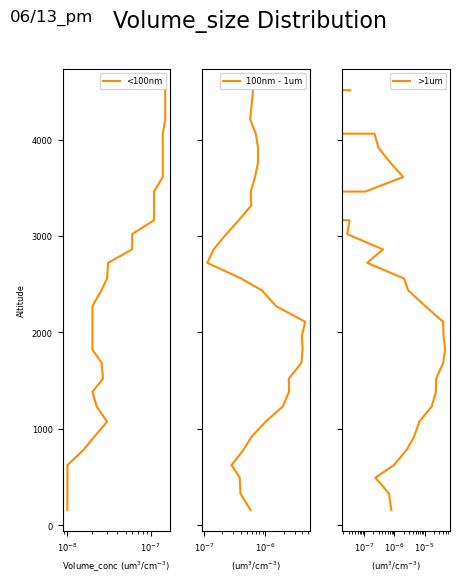

In [1111]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY13b_subset_mean['vSMPS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY13b_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY13b_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY13b_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/13_pm', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1112]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220614_R0_20230625T113226.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY14_subset = DAY14_subset.copy()
DAY14_subset.loc[:, start_col2:] *= 1e-6
DAY14_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY14_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
9363,2022-06-14 16:05:00,2022-06-14 16:05:01,30.642555,-64.394685,117.000,0.000368,0.000273,0.000133,0.000138,0.000015,6.650000e-07,3.635000e-06,0.000029,1.104500e-05,NaN,NaN,NaN
9364,2022-06-14 16:05:01,2022-06-14 16:05:02,30.641725,-64.395343,117.085,0.000360,0.000279,0.000134,0.000140,0.000017,7.700000e-07,2.855000e-06,0.000033,1.358500e-05,NaN,NaN,NaN
9365,2022-06-14 16:05:02,2022-06-14 16:05:03,30.640923,-64.396042,117.190,0.000359,0.000271,0.000131,0.000133,0.000018,9.750000e-07,2.210000e-06,0.000025,8.965000e-06,NaN,NaN,NaN
9366,2022-06-14 16:05:03,2022-06-14 16:05:04,30.640148,-64.396780,117.295,0.000377,0.000268,0.000128,0.000121,0.000017,1.010000e-06,2.210000e-06,0.000019,6.285000e-06,NaN,NaN,NaN
9367,2022-06-14 16:05:04,2022-06-14 16:05:05,30.639403,-64.397555,117.380,0.000352,0.000272,0.000130,0.000130,0.000017,9.100000e-07,1.555000e-06,0.000011,2.705000e-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.590,0.005022,0.002835,0.001861,0.000179,0.000017,7.150000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.000,0.005002,0.002812,0.001858,0.000181,0.000015,5.250000e-07,6.500000e-07,0.000002,3.400000e-07,NaN,NaN,NaN
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.420,0.004968,0.002816,0.001846,0.000179,0.000015,5.000000e-07,6.500000e-07,0.000002,3.400000e-07,NaN,NaN,NaN
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.860,0.004999,0.002846,0.001848,0.000192,0.000016,6.350000e-07,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN


In [1113]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY14_subset.GPS_Altitude_THORNHILL.min(), DAY14_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY14_subset['Bins'] = pd.cut(DAY14_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY14_subset_1000 = DAY14_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_14 = DAY14_subset_1000[start_index:stop_index]
DAY1000_subset_14.describe()


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,10,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01
mean,2022-06-14 16:06:20.549999872,2022-06-14 16:06:21.549999872,30.665996,-64.421215,532.612161,0.000388,0.000300,0.000153,0.000101,0.000014,8.875238e-07,1.395199e-06,0.000013,4.729807e-06,0.000224,1.499000e-06,1.600000e-08
min,2022-06-14 16:05:20,2022-06-14 16:05:21,30.635158,-64.443667,129.846923,0.000297,0.000230,0.000100,0.000092,0.000013,6.763636e-07,5.720000e-07,0.000003,6.770000e-07,0.000110,8.000000e-07,1.000000e-08
25%,2022-06-14 16:05:57.624999936,2022-06-14 16:05:58.624999936,30.654523,-64.438572,347.133625,0.000306,0.000233,0.000104,0.000096,0.000014,7.932500e-07,1.056740e-06,0.000010,3.134682e-06,0.000124,8.100000e-07,1.000000e-08
50%,2022-06-14 16:06:21.750000128,2022-06-14 16:06:22.750000128,30.670587,-64.423276,535.254470,0.000308,0.000237,0.000107,0.000099,0.000015,8.598237e-07,1.205409e-06,0.000011,3.604831e-06,0.000124,8.100000e-07,1.000000e-08
75%,2022-06-14 16:06:46,2022-06-14 16:06:47,30.679871,-64.407655,723.516250,0.000329,0.000259,0.000122,0.000102,0.000015,9.501705e-07,1.543000e-06,0.000018,7.164167e-06,0.000376,2.535000e-06,2.500000e-08
max,2022-06-14 16:07:10.500000,2022-06-14 16:07:11.500000,30.684512,-64.387230,913.690000,0.000998,0.000779,0.000505,0.000115,0.000016,1.167000e-06,2.388000e-06,0.000025,8.834000e-06,0.000460,3.110000e-06,3.000000e-08
std,NaN,NaN,0.017557,0.020702,258.194532,0.000217,0.000170,0.000125,0.000007,0.000001,1.515246e-07,5.869605e-07,0.000007,2.776708e-06,0.000163,1.111700e-06,9.660918e-09


In [1114]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY14_subset_3000 = DAY14_subset_1000[start_index:stop_index]
DAY14_subset_3000.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,28,28,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,27.000000,2.700000e+01,2.700000e+01
mean,2022-06-14 16:09:40.571428352,2022-06-14 16:09:41.571428864,30.665512,-64.406044,2207.918130,0.000390,0.000273,0.000091,0.000048,8.918194e-06,7.575378e-07,1.411262e-06,1.509222e-05,5.629082e-06,0.000239,1.073333e-06,1.000000e-08
min,2022-06-14 16:07:29.500000,2022-06-14 16:07:30.500000,30.637684,-64.436561,1077.070000,0.000296,0.000225,0.000059,0.000016,9.880000e-07,2.500000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000110,8.000000e-07,1.000000e-08
25%,2022-06-14 16:08:34.124999936,2022-06-14 16:08:35.124999936,30.644458,-64.425179,1642.586361,0.000334,0.000239,0.000070,0.000026,2.982333e-06,1.519444e-07,1.787500e-07,6.788750e-07,1.270000e-07,0.000154,8.700000e-07,1.000000e-08
50%,2022-06-14 16:09:38.750000128,2022-06-14 16:09:39.750000128,30.661879,-64.407742,2206.432056,0.000374,0.000257,0.000079,0.000039,6.169417e-06,5.242778e-07,1.007500e-06,1.067525e-05,3.764500e-06,0.000194,9.500000e-07,1.000000e-08
75%,2022-06-14 16:10:45.624999936,2022-06-14 16:10:46.624999936,30.684682,-64.388273,2773.432083,0.000426,0.000292,0.000111,0.000072,1.541012e-05,1.358792e-06,2.645250e-06,2.792325e-05,1.034931e-05,0.000259,1.340000e-06,1.000000e-08
max,2022-06-14 16:11:56,2022-06-14 16:11:57,30.699582,-64.368152,3338.431111,0.000708,0.000467,0.000201,0.000095,2.018250e-05,1.984444e-06,3.590556e-06,4.700700e-05,2.007800e-05,0.000475,1.360000e-06,1.000000e-08
std,NaN,NaN,0.021283,0.022013,688.131611,0.000083,0.000050,0.000030,0.000026,6.873673e-06,6.584175e-07,1.338859e-06,1.494881e-05,5.847517e-06,0.000124,2.391330e-07,1.521791e-24


In [1115]:
nbins = 30
bins14 = np.linspace(DAY14_subset.GPS_Altitude_THORNHILL.min(), DAY14_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY14_subset['Bins'] = pd.cut(DAY14_subset['GPS_Altitude_THORNHILL'], bins14)
DAY14_subset_mean = DAY14_subset.groupby('Bins').mean()
DAY14_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(117.0, 395.778]",2022-06-14 16:05:32.000000000,2022-06-14 16:05:33.000000000,30.640382,-64.424557,194.151508,0.000479,0.000371,0.000206,0.000111,0.000015,8.063492e-07,9.850000e-07,9.361905e-06,3.239048e-06,0.000460,3.110000e-06,3.000000e-08
"(395.778, 674.555]",2022-06-14 16:06:21.500000000,2022-06-14 16:06:22.500000000,30.675263,-64.433260,532.951389,0.000304,0.000239,0.000107,0.000100,0.000014,8.793056e-07,1.283472e-06,1.103972e-05,3.662639e-06,0.000124,8.100000e-07,1.000000e-08
"(674.555, 953.333]",2022-06-14 16:06:57.500000000,2022-06-14 16:06:58.500000000,30.677968,-64.397646,812.095417,0.000307,0.000232,0.000104,0.000094,0.000015,1.001111e-06,2.012500e-06,2.127736e-05,7.844722e-06,0.000120,8.071429e-07,1.000000e-08
"(953.333, 1232.111]",2022-06-14 16:07:31.000000000,2022-06-14 16:07:32.000000000,30.650820,-64.390098,1091.634032,0.000312,0.000234,0.000118,0.000093,0.000019,1.596290e-06,3.046129e-06,3.442694e-05,1.344903e-05,0.000110,8.000000e-07,1.000000e-08
"(1232.111, 1510.888]",2022-06-14 16:08:02.500000000,2022-06-14 16:08:03.500000000,30.642636,-64.418613,1367.062187,0.000321,0.000237,0.000114,0.000081,0.000016,1.431406e-06,2.997187e-06,3.137906e-05,1.124234e-05,0.000133,8.794118e-07,1.000000e-08
"(1510.888, 1789.666]",2022-06-14 16:08:35.000000000,2022-06-14 16:08:36.000000000,30.668578,-64.434492,1650.077273,0.000332,0.000241,0.000110,0.000072,0.000018,1.652727e-06,3.080909e-06,3.141348e-05,1.165773e-05,0.000154,9.500000e-07,1.000000e-08
"(1789.666, 2068.444]",2022-06-14 16:09:07.500000000,2022-06-14 16:09:08.500000000,30.691265,-64.407755,1931.983125,0.000363,0.000253,0.000085,0.000055,0.000012,1.086406e-06,1.859063e-06,1.951016e-05,7.458750e-06,0.000187,8.841176e-07,1.000000e-08
"(2068.444, 2347.221]",2022-06-14 16:09:39.000000000,2022-06-14 16:09:40.000000000,30.677811,-64.374367,2209.057097,0.000412,0.000292,0.000065,0.000030,0.000004,3.224194e-07,5.700000e-07,7.712419e-06,3.179032e-06,0.000194,8.700000e-07,1.000000e-08
"(2347.221, 2625.999]",2022-06-14 16:10:11.500000000,2022-06-14 16:10:12.500000000,30.647018,-64.378103,2485.770588,0.000359,0.000246,0.000074,0.000035,0.000006,4.508824e-07,9.864706e-07,9.870147e-06,3.313235e-06,0.000475,1.340000e-06,1.000000e-08


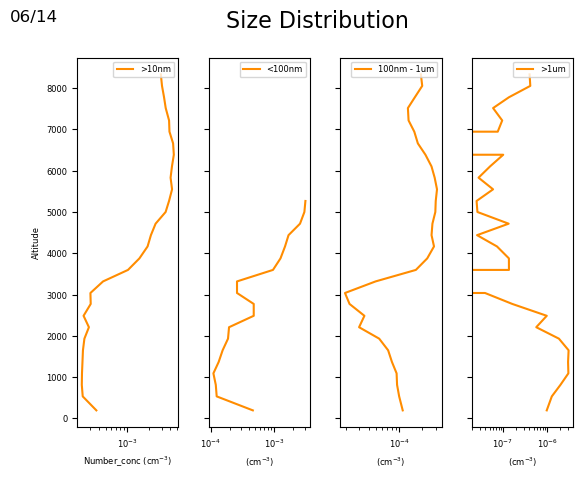

In [1116]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY14_subset_mean['CNgt10nm_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY14_subset_mean['nSMPS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY14_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY14_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
#ax[0].set_xlim([300, 500])
#ax[2].set_xlim([100, 300])
#ax[3].set_xlim([0, 2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/14', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

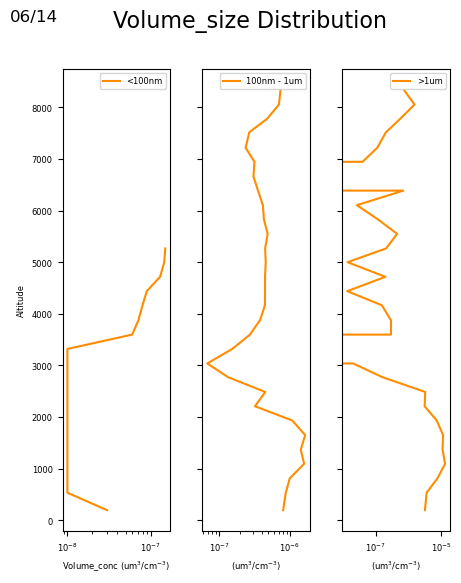

In [1117]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '9'
ax[0].plot(DAY14_subset_mean['vSMPS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY14_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY14_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY14_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/14', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1118]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220617_R0_20230625T113227.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY17_subset = DAY17_subset.copy()
DAY17_subset.loc[:, start_col2:] *= 1e-6
DAY17_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
10469,2022-06-17 16:20:00,2022-06-17 16:20:01,32.206574,-65.006772,134.100,0.000617,0.000471,0.000143,0.000116,0.000017,1.100000e-06,1.170000e-06,0.000006,0.000001,0.000366,0.000002,1.000000e-08
10470,2022-06-17 16:20:01,2022-06-17 16:20:02,32.206131,-65.005761,133.795,0.000618,0.000468,0.000144,0.000130,0.000018,1.150000e-06,0.000000e+00,0.000000,0.000000,0.000366,0.000002,1.000000e-08
10471,2022-06-17 16:20:02,2022-06-17 16:20:03,32.205725,-65.004728,133.485,0.000608,0.000466,0.000145,0.000138,0.000018,1.035000e-06,5.200000e-07,0.000007,0.000002,0.000366,0.000002,1.000000e-08
10472,2022-06-17 16:20:03,2022-06-17 16:20:04,32.205357,-65.003676,133.170,0.000605,0.000467,0.000144,0.000128,0.000017,1.010000e-06,1.555000e-06,0.000017,0.000005,0.000366,0.000002,1.000000e-08
10473,2022-06-17 16:20:04,2022-06-17 16:20:05,32.205027,-65.002606,132.825,0.000630,0.000470,0.000144,0.000125,0.000019,1.405000e-06,1.555000e-06,0.000017,0.000005,0.000366,0.000002,1.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12084,2022-06-17 16:46:55,2022-06-17 16:46:56,32.158601,-65.020304,7639.050,0.015553,0.009583,0.005479,0.000227,0.000014,3.550000e-07,0.000000e+00,0.000000,0.000000,0.008483,0.000039,3.700000e-07
12085,2022-06-17 16:46:56,2022-06-17 16:46:57,32.157293,-65.019563,7645.810,0.016205,0.009689,0.005483,0.000235,0.000015,4.650000e-07,0.000000e+00,0.000000,0.000000,0.008483,0.000039,3.700000e-07
12086,2022-06-17 16:46:57,2022-06-17 16:46:58,32.156002,-65.018778,7652.610,0.016195,0.009721,0.005488,0.000216,0.000015,4.750000e-07,0.000000e+00,0.000000,0.000000,0.008483,0.000039,3.700000e-07
12087,2022-06-17 16:46:58,2022-06-17 16:46:59,32.154729,-65.017953,7659.440,0.016309,0.009740,0.005491,0.000211,0.000014,4.200000e-07,0.000000e+00,0.000000,0.000000,0.008483,0.000039,3.700000e-07


In [1119]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY17_subset.GPS_Altitude_THORNHILL.min(), DAY17_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY17_subset['Bins'] = pd.cut(DAY17_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY17_subset_1000 = DAY17_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_17 = DAY17_subset_1000[start_index:stop_index]
DAY1000_subset_17


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(124.73, 200.146]",2022-06-17 16:20:35.295774720,2022-06-17 16:20:36.295774720,32.218829,-64.978554,138.339507,0.000602,0.000467,0.000149,0.000117,0.000016,1.012394e-06,1.142183e-06,0.000009,0.000003,0.000338,0.000001,1.000000e-08
"(200.146, 275.561]",2022-06-17 16:21:24.500000256,2022-06-17 16:21:25.500000000,32.250650,-64.989881,236.188462,0.000703,0.000543,0.000158,0.000118,0.000016,9.646154e-07,1.022115e-06,0.000007,0.000002,0.000319,0.000001,1.000000e-08
"(275.561, 350.977]",2022-06-17 16:21:50.000000000,2022-06-17 16:21:51.000000000,32.242129,-65.012285,309.913800,0.001477,0.001106,0.000232,0.000138,0.000017,9.906000e-07,1.011800e-06,0.000009,0.000003,0.000811,0.000002,2.000000e-08
"(350.977, 426.392]",2022-06-17 16:22:13.000000000,2022-06-17 16:22:14.000000000,32.223573,-65.013314,393.872857,0.000716,0.000547,0.000169,0.000126,0.000016,9.871429e-07,9.530952e-07,0.000010,0.000004,0.000811,0.000002,2.000000e-08
"(426.392, 501.808]",2022-06-17 16:22:35.000000000,2022-06-17 16:22:36.000000000,32.213844,-64.995274,463.940435,0.000639,0.000488,0.000154,0.000122,0.000015,9.143478e-07,1.387174e-06,0.000010,0.000003,0.000974,0.000005,5.000000e-08
"(501.808, 577.223]",2022-06-17 16:22:57.000000000,2022-06-17 16:22:58.000000000,32.221232,-64.974504,541.829286,0.000744,0.000569,0.000163,0.000127,0.000016,9.119048e-07,1.396667e-06,0.000010,0.000003,0.000974,0.000005,5.000000e-08
"(577.223, 652.638]",2022-06-17 16:23:17.000000000,2022-06-17 16:23:18.000000000,32.239178,-64.968086,615.008684,0.015611,0.010644,0.000615,0.000233,0.000026,1.425789e-06,1.021842e-06,0.000011,0.000004,0.000974,0.000005,5.000000e-08
"(652.638, 728.054]",2022-06-17 16:23:38.000000000,2022-06-17 16:23:39.000000000,32.257136,-64.980597,686.849130,0.019154,0.013200,0.000646,0.000233,0.000026,1.426087e-06,1.354783e-06,0.000010,0.000003,0.016137,0.000017,8.000000e-08
"(728.054, 803.47]",2022-06-17 16:23:59.000000000,2022-06-17 16:24:00.000000000,32.263103,-65.005527,763.259474,0.019574,0.014033,0.000708,0.000251,0.000026,1.318684e-06,1.597105e-06,0.000010,0.000003,0.016137,0.000017,8.000000e-08


In [1120]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY17_subset_3000 = DAY17_subset_1000[start_index:stop_index]
DAY17_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(1029.716, 1105.132]",2022-06-17 16:25:25.000000000,2022-06-17 16:25:26.000000000,32.198372,-65.013058,1069.572000,0.016371,0.012146,0.000911,0.000323,0.000030,1.250000e-06,1.204000e-06,7.497600e-06,1.999200e-06,0.016158,0.000021,1.100000e-07
"(1105.132, 1180.547]",2022-06-17 16:25:50.500000000,2022-06-17 16:25:51.500000000,32.205940,-64.983412,1143.704231,0.009583,0.007036,0.000737,0.000312,0.000032,1.399038e-06,1.117692e-06,1.041769e-05,3.432692e-06,0.006070,0.000006,3.000000e-08
"(1180.547, 1255.962]",2022-06-17 16:27:55.000000000,2022-06-17 16:27:56.000000256,32.227871,-65.006612,1209.486996,0.007670,0.005530,0.000564,0.000132,0.000017,8.718161e-07,7.030942e-07,5.063184e-06,1.527399e-06,0.007894,0.000010,4.987730e-08
"(1255.962, 1331.378]",2022-06-17 16:29:59.500000000,2022-06-17 16:30:00.500000000,32.252481,-65.015879,1291.048462,0.010199,0.007316,0.000944,0.000112,0.000021,1.602308e-06,1.137692e-06,5.974231e-06,1.383462e-06,0.008405,0.000009,4.000000e-08
"(1331.378, 1406.794]",2022-06-17 16:30:25.000000000,2022-06-17 16:30:26.000000000,32.239553,-65.045051,1370.451200,0.005189,0.003767,0.000335,0.000008,0.000001,1.000000e-07,1.244000e-07,2.149200e-06,9.464000e-07,0.008405,0.000009,4.000000e-08
"(1406.794, 1482.209]",2022-06-17 16:30:52.000000000,2022-06-17 16:30:53.000000000,32.210442,-65.051537,1445.753448,0.003988,0.002896,0.000371,0.000012,0.000002,1.494828e-07,1.613793e-07,7.420690e-07,1.589655e-07,0.002613,0.000003,2.000000e-08
"(1482.209, 1557.625]",2022-06-17 16:31:19.999999744,2022-06-17 16:31:21.000000000,32.188000,-65.027798,1519.431852,0.001302,0.000981,0.000159,0.000061,0.000008,4.120370e-07,2.981481e-07,2.124074e-06,6.348148e-07,0.002613,0.000003,2.000000e-08
"(1557.625, 1633.04]",2022-06-17 16:31:47.000000000,2022-06-17 16:31:48.000000000,32.191553,-64.994280,1593.622963,0.002465,0.001730,0.000269,0.000179,0.000022,9.987037e-07,1.019630e-06,8.903889e-06,2.958889e-06,0.002297,0.000004,2.000000e-08
"(1633.04, 1708.456]",2022-06-17 16:32:14.000000000,2022-06-17 16:32:15.000000256,32.215972,-64.975734,1668.389259,0.003394,0.002435,0.000345,0.000231,0.000030,1.351481e-06,1.106111e-06,9.018889e-06,2.737037e-06,0.002297,0.000004,2.000000e-08


In [1121]:
nbins = 20
bins17 = np.linspace(DAY17_subset.GPS_Altitude_THORNHILL.min(), DAY17_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY17_subset['Bins'] = pd.cut(DAY17_subset['GPS_Altitude_THORNHILL'], bins17)
DAY17_subset_mean= DAY17_subset.groupby('Bins').mean()
DAY17_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(124.73, 501.808]",2022-06-17 16:21:23.198795264,2022-06-17 16:21:24.198795264,32.227232,-64.992122,256.944639,0.000769,0.000588,0.000166,0.000122,0.000016,9.848494e-07,1.113765e-06,8.888584e-06,2.807530e-06,0.000559,0.000002,1.669421e-08
"(501.808, 878.885]",2022-06-17 16:23:39.000000000,2022-06-17 16:23:39.999999744,32.247007,-64.992511,692.312667,0.015397,0.010886,0.000584,0.000224,0.000024,1.267286e-06,1.307190e-06,1.045100e-05,3.306190e-06,0.009398,0.000012,6.666667e-08
"(878.885, 1255.962]",2022-06-17 16:27:09.000000000,2022-06-17 16:27:10.000000000,32.222955,-65.009632,1160.110651,0.010220,0.007452,0.000650,0.000185,0.000021,1.000460e-06,8.594921e-07,6.480127e-06,2.005651e-06,0.009281,0.000011,5.923077e-08
"(1255.962, 1633.04]",2022-06-17 16:30:53.500000000,2022-06-17 16:30:54.500000000,32.215702,-65.027088,1446.327388,0.004569,0.003295,0.000412,0.000074,0.000011,6.461567e-07,5.444030e-07,3.942799e-06,1.203507e-06,0.004548,0.000005,2.692308e-08
"(1633.04, 2010.117]",2022-06-17 16:33:06.000000000,2022-06-17 16:33:07.000000000,32.231479,-65.014656,1820.987023,0.002567,0.001822,0.000442,0.000147,0.000022,1.271641e-06,8.871374e-07,6.395573e-06,1.892252e-06,0.001737,0.000003,2.000000e-08
"(2010.117, 2387.195]",2022-06-17 16:34:57.500000000,2022-06-17 16:34:58.500000000,32.203537,-64.997769,2159.984457,0.000611,0.000435,0.000275,0.000090,0.000009,4.011957e-07,1.002717e-07,7.129348e-07,2.625000e-07,0.000370,0.000002,2.096774e-08
"(2387.195, 2764.272]",2022-06-17 16:36:12.000000000,2022-06-17 16:36:13.000000000,32.240838,-65.022292,2570.645965,0.000808,0.000566,0.000323,0.000095,0.000009,3.924561e-07,1.550877e-07,8.730702e-07,2.185088e-07,0.000391,0.000003,3.142857e-08
"(2764.272, 3141.35]",2022-06-17 16:37:07.000000000,2022-06-17 16:37:08.000000000,32.195109,-65.037473,2956.473019,0.001861,0.001281,0.000643,0.000177,0.000014,5.452830e-07,2.943396e-07,3.742830e-06,1.533585e-06,0.001401,0.000006,5.000000e-08
"(3141.35, 3518.428]",2022-06-17 16:37:58.000000000,2022-06-17 16:37:59.000000256,32.191293,-64.983290,3327.104082,0.002415,0.001637,0.001090,0.000274,0.000019,6.016327e-07,1.857143e-07,1.471633e-06,4.600000e-07,0.001404,0.000009,8.000000e-08


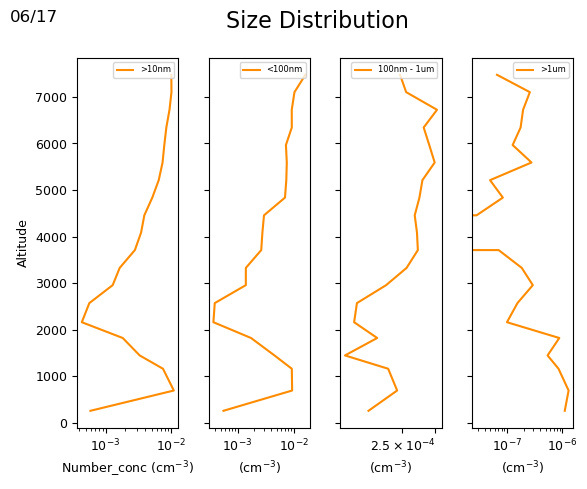

In [1122]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY17_subset_mean['CNgt10nm_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY17_subset_mean['nSMPS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY17_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY17_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/17', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

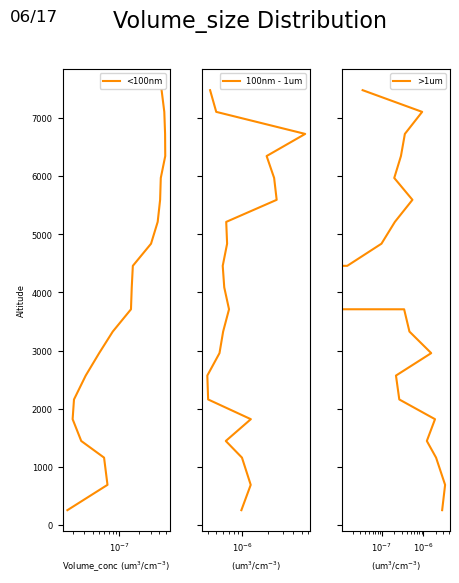

In [1123]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '9'
ax[0].plot(DAY17_subset_mean['vSMPS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY17_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY17_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY17_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/17', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1124]:
DAY18 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220618_R0_20230625T113509.ict')
start_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
    
DAY18_subset = DAY18[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

DAY18_subset = DAY18_subset.copy()
DAY18_subset.loc[:, start_col2:] *= 1e-6
DAY18_subset.replace(-888888, np.NaN, inplace=True)

# Print the modified subset dataframe
DAY18_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
7425,2022-06-18 14:09:00,2022-06-18 14:09:01,36.589500,-71.990803,110.135,0.003881,0.003080,0.002165,0.001012,0.000084,2.915000e-06,0.000000e+00,0.000000,0.000000e+00,0.002084,0.000015,1.400000e-07
7426,2022-06-18 14:09:01,2022-06-18 14:09:02,36.590250,-71.991516,110.155,0.003807,0.003090,0.002154,0.001016,0.000083,2.820000e-06,5.200000e-07,0.000003,5.400000e-07,0.002084,0.000015,1.400000e-07
7427,2022-06-18 14:09:02,2022-06-18 14:09:03,36.591026,-71.992186,109.965,0.003920,0.003058,0.002169,0.000983,0.000080,2.595000e-06,1.170000e-06,0.000005,8.800000e-07,0.002084,0.000015,1.400000e-07
7428,2022-06-18 14:09:03,2022-06-18 14:09:04,36.591824,-71.992808,109.535,0.004013,0.003049,0.002170,0.000955,0.000078,2.515000e-06,2.205000e-06,0.000023,7.870000e-06,0.002084,0.000015,1.400000e-07
7429,2022-06-18 14:09:04,2022-06-18 14:09:05,36.592643,-71.993383,109.055,0.004044,0.003062,0.002162,0.000957,0.000079,2.580000e-06,2.075000e-06,0.000025,8.615000e-06,0.002084,0.000015,1.400000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2022-06-18 14:32:55,2022-06-18 14:32:56,36.634224,-71.921855,7949.270,0.006166,0.002978,0.001393,0.000113,0.000009,2.750000e-07,0.000000e+00,0.000000,0.000000e+00,0.002352,0.000011,1.100000e-07
8861,2022-06-18 14:32:56,2022-06-18 14:32:57,36.634412,-71.923239,7954.260,0.005884,0.002927,0.001389,0.000114,0.000010,4.300000e-07,0.000000e+00,0.000000,0.000000e+00,0.002352,0.000011,1.100000e-07
8862,2022-06-18 14:32:57,2022-06-18 14:32:58,36.634602,-71.924625,7959.290,0.005901,0.002915,0.001392,0.000121,0.000011,5.500000e-07,0.000000e+00,0.000000,0.000000e+00,0.002352,0.000011,1.100000e-07
8863,2022-06-18 14:32:58,2022-06-18 14:32:59,36.634793,-71.926012,7964.380,0.005990,0.002968,0.001419,0.000116,0.000009,3.750000e-07,0.000000e+00,0.000000,0.000000e+00,0.002352,0.000011,1.100000e-07


In [1125]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY18_subset.GPS_Altitude_THORNHILL.min(), DAY18_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY18_subset['Bins'] = pd.cut(DAY18_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY18_subset_1000 = DAY18_subset.groupby('Bins').mean()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY18_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY18_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_18 = DAY18_subset_1000[start_index:stop_index]
DAY1000_subset_18


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.925, 184.561]",2022-06-18 14:09:29.241379328,2022-06-18 14:09:30.241379328,36.615033,-71.990052,132.794655,0.003994,0.003093,0.002190,0.000944,0.000079,0.000003,9.879310e-07,0.000010,3.437069e-06,0.001974,0.000015,1.400000e-07
"(184.561, 263.196]",2022-06-18 14:10:15.000000000,2022-06-18 14:10:16.000000000,36.651211,-71.991949,219.865606,0.004013,0.003110,0.002218,0.000975,0.000082,0.000003,8.612121e-07,0.000010,4.030000e-06,0.001887,0.000015,1.400000e-07
"(263.196, 341.832]",2022-06-18 14:10:41.000000000,2022-06-18 14:10:42.000000000,36.654091,-72.018886,302.457895,0.004154,0.003163,0.002279,0.000991,0.000083,0.000003,1.240000e-06,0.000008,2.418158e-06,0.002114,0.000017,1.600000e-07
"(341.832, 420.468]",2022-06-18 14:11:04.500000000,2022-06-18 14:11:05.500000000,36.637436,-72.039391,379.784107,0.004135,0.003156,0.002268,0.000997,0.000084,0.000003,8.992857e-07,0.000008,2.669821e-06,0.002114,0.000017,1.600000e-07
"(420.468, 499.104]",2022-06-18 14:11:29.500000000,2022-06-18 14:11:30.500000000,36.611610,-72.047167,455.771591,0.004038,0.003094,0.002212,0.000957,0.000081,0.000003,8.502273e-07,0.000008,2.454545e-06,0.001854,0.000014,1.342857e-07
"(499.104, 577.74]",2022-06-18 14:11:49.500000000,2022-06-18 14:11:50.500000000,36.590351,-72.039356,534.828889,0.003954,0.003022,0.002150,0.000932,0.000079,0.000003,1.211667e-06,0.000016,6.386389e-06,0.001810,0.000014,1.300000e-07
"(577.74, 656.375]",2022-06-18 14:12:11.000000000,2022-06-18 14:12:12.000000000,36.572594,-72.019674,616.896600,0.003701,0.002804,0.001999,0.000957,0.000081,0.000003,2.802000e-07,0.000003,1.059800e-06,0.001810,0.000014,1.300000e-07
"(656.375, 735.011]",2022-06-18 14:12:41.000000000,2022-06-18 14:12:42.000000000,36.566434,-71.981849,701.609714,0.003706,0.002780,0.002034,0.001000,0.000085,0.000003,2.745714e-07,0.000005,2.352000e-06,0.001461,0.000013,1.200000e-07
"(735.011, 813.647]",2022-06-18 14:13:10.000000000,2022-06-18 14:13:11.000000000,36.584594,-71.955549,772.803261,0.003553,0.002652,0.001928,0.000926,0.000078,0.000003,1.352174e-07,0.000001,2.821739e-07,0.001461,0.000013,1.200000e-07


In [1126]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY18_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY18_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY18_subset_3000 = DAY18_subset_1000[start_index:stop_index]
DAY18_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(970.918, 1049.554]",2022-06-18 14:14:13.000000000,2022-06-18 14:14:14.000000000,36.616160,-72.002678,1011.794412,0.004459,0.003345,0.002206,0.000697,0.000056,1.775588e-06,1.679412e-07,1.691176e-06,6.105882e-07,0.002223,0.000018,1.700000e-07
"(1049.554, 1128.19]",2022-06-18 14:14:32.500000000,2022-06-18 14:14:33.500000000,36.606177,-72.023627,1097.465455,0.004035,0.002954,0.001854,0.000578,0.000050,1.707955e-06,1.063636e-07,1.119091e-06,4.218182e-07,0.002329,0.000015,1.400000e-07
"(1128.19, 1206.826]",2022-06-18 14:14:59.500000000,2022-06-18 14:15:00.500000000,36.580546,-72.037135,1165.497187,0.003690,0.002731,0.001650,0.000544,0.000047,1.598906e-06,2.112500e-07,2.730000e-06,1.119062e-06,0.002329,0.000015,1.400000e-07
"(1206.826, 1285.461]",2022-06-18 14:15:27.000000000,2022-06-18 14:15:28.000000000,36.553576,-72.021314,1239.256522,0.004230,0.003101,0.001970,0.000658,0.000056,1.865652e-06,2.482609e-07,2.166957e-06,7.143478e-07,0.002481,0.000018,1.650000e-07
"(1285.461, 1364.097]",2022-06-18 14:15:47.000000000,2022-06-18 14:15:48.000000000,36.546724,-71.994233,1324.290000,0.005020,0.003694,0.002520,0.000821,0.000070,2.400882e-06,3.823529e-07,6.958235e-06,3.327059e-06,0.002634,0.000021,1.900000e-07
"(1364.097, 1442.733]",2022-06-18 14:16:04.500000000,2022-06-18 14:16:05.500000000,36.551196,-71.970363,1405.506111,0.005141,0.003804,0.002631,0.000885,0.000075,2.515278e-06,4.755556e-07,6.667778e-06,2.731111e-06,0.002634,0.000021,1.900000e-07
"(1442.733, 1521.368]",2022-06-18 14:16:24.500000000,2022-06-18 14:16:25.500000000,36.563860,-71.948385,1485.190000,0.005080,0.003698,0.002549,0.000921,0.000079,2.704545e-06,3.427273e-07,3.421364e-06,1.111364e-06,0.002580,0.000021,1.928571e-07
"(1521.368, 1600.004]",2022-06-18 14:16:47.000000000,2022-06-18 14:16:48.000000000,36.585047,-71.937701,1559.756522,0.005000,0.003630,0.002511,0.000960,0.000082,2.839565e-06,3.052174e-07,4.142826e-06,1.712609e-06,0.002262,0.000021,2.100000e-07
"(1600.004, 1678.64]",2022-06-18 14:17:08.500000000,2022-06-18 14:17:09.500000000,36.604557,-71.946298,1636.056500,0.004924,0.003531,0.002448,0.000980,0.000084,2.845250e-06,2.080000e-07,3.227250e-06,1.292000e-06,0.002262,0.000021,2.100000e-07


In [1127]:
nbins = 20
bins18 = np.linspace(DAY18_subset.GPS_Altitude_THORNHILL.min(), DAY18_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY18_subset['Bins'] = pd.cut(DAY18_subset['GPS_Altitude_THORNHILL'], bins18)
DAY18_subset_mean= DAY18_subset.groupby('Bins').mean()
DAY18_subset_mean

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
Bins,,,,,,,,,,,,,,,,,
"(105.925, 499.104]",2022-06-18 14:10:20.406249984,2022-06-18 14:10:21.406249984,36.630583,-72.010355,258.533031,0.004048,0.003116,0.002223,0.000967,0.000081,2.795000e-06,9.572813e-07,9.131969e-06,3.169000e-06,0.002004,0.000016,1.473043e-07
"(499.104, 892.282]",2022-06-18 14:12:42.500000000,2022-06-18 14:12:43.500000000,36.581834,-71.988859,701.537702,0.003682,0.002774,0.001984,0.000928,0.000078,2.612419e-06,3.622177e-07,4.788266e-06,1.932097e-06,0.001687,0.000014,1.294681e-07
"(892.282, 1285.461]",2022-06-18 14:14:41.500000000,2022-06-18 14:14:42.500000000,36.591802,-72.016238,1102.707544,0.004054,0.002999,0.001904,0.000622,0.000052,1.730175e-06,2.232456e-07,2.208684e-06,8.338596e-07,0.002299,0.000017,1.548810e-07
"(1285.461, 1678.64]",2022-06-18 14:16:28.500000000,2022-06-18 14:16:29.499999744,36.571680,-71.957261,1490.817500,0.005032,0.003667,0.002530,0.000918,0.000078,2.678050e-06,3.378000e-07,4.734100e-06,1.954000e-06,0.002441,0.000021,2.003529e-07
"(1678.64, 2071.819]",2022-06-18 14:18:14.500000000,2022-06-18 14:18:15.500000000,36.606443,-72.011125,1880.075714,0.004150,0.002964,0.002065,0.001031,0.000090,3.228795e-06,6.265179e-07,7.264643e-06,2.737946e-06,0.001712,0.000015,1.485366e-07
"(2071.819, 2464.998]",2022-06-18 14:19:51.000000000,2022-06-18 14:19:52.000000000,36.545552,-71.997029,2218.444321,0.001922,0.001339,0.000881,0.000447,0.000044,1.753272e-06,5.004938e-07,5.682716e-06,2.207778e-06,0.000651,0.000005,4.500000e-08
"(2464.998, 2858.176]",2022-06-18 14:20:56.499999744,2022-06-18 14:20:57.500000000,36.582258,-71.931369,2657.639200,0.002305,0.001539,0.001096,0.000317,0.000030,1.204200e-06,2.858000e-07,2.793200e-06,8.989000e-07,0.001518,0.000011,1.100000e-07
"(2858.176, 3251.355]",2022-06-18 14:21:47.499999744,2022-06-18 14:21:48.500000256,36.608628,-71.966960,3048.236154,0.003589,0.002346,0.001664,0.000397,0.000032,1.172212e-06,3.498077e-07,3.141827e-06,1.114519e-06,0.002106,0.000014,1.400000e-07
"(3251.355, 3644.534]",2022-06-18 14:22:39.000000256,2022-06-18 14:22:39.999999744,36.569233,-71.985110,3448.080980,0.004728,0.003141,0.002397,0.000518,0.000040,1.398235e-06,3.564706e-07,2.654608e-06,8.468627e-07,0.002680,0.000017,1.650000e-07


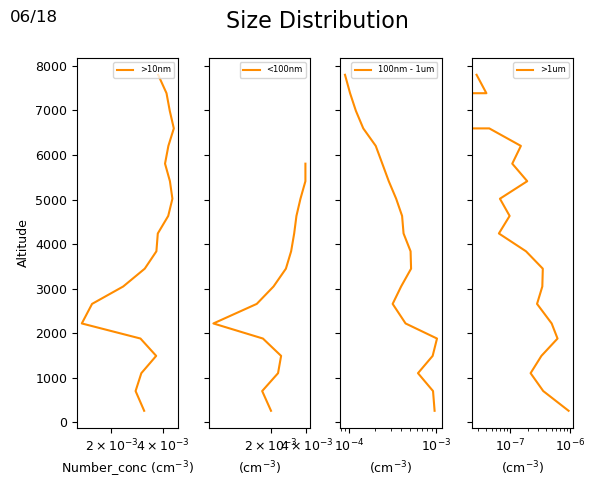

In [1128]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '6'
ax[0].plot(DAY18_subset_mean['CNgt10nm_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label=">10nm")
ax[1].plot(DAY18_subset_mean['nSMPS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[2].plot(DAY18_subset_mean['IntegN_100to1000nm_LAS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="100nm - 1um")
ax[3].plot(DAY18_subset_mean['IntegN_gt1000nm_LAS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Number_conc (cm$^{-3}$)')
ax[1].set_xlabel('(cm$^{-3}$)')
ax[2].set_xlabel('(cm$^{-3}$)')
ax[3].set_xlabel('(cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
ax[3].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)



fig.text(0.02, 0.98, '06/18', ha='left', va='top', fontsize=12)

# Set the title
fig.suptitle('Size Distribution', fontsize=16)

plt.show()

Text(0.5, 0.98, 'Volume_size Distribution')

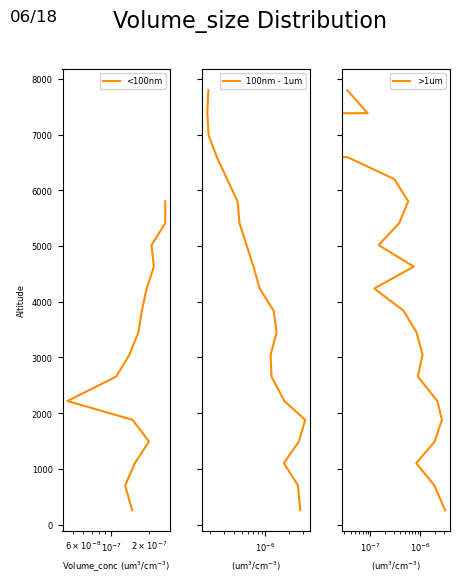

In [1129]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '9'
ax[0].plot(DAY18_subset_mean['vSMPS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label="<100nm")
ax[1].plot(DAY18_subset_mean['IntegV_100to1000nm_LAS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='100nm - 1um')
ax[2].plot(DAY18_subset_mean['IntegV_gt1000nm_LAS_ZIEMBA'], DAY18_subset_mean['GPS_Altitude_THORNHILL'], color="darkorange", label='>1um')
ax[0].set_ylabel('Altitude')
ax[0].set_xlabel('Volume_conc (um$^{3}$/cm$^{-3}$)')
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(loc='upper right', fontsize=6)
ax[1].legend(loc='upper right', fontsize=6)
ax[2].legend(loc='upper right', fontsize=6)
# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/18', ha='left', va='top', fontsize=12)
fig.suptitle('Volume_size Distribution', fontsize=16)

In [1130]:

# Concatenate the dataframes vertically (along rows)
ocean = pd.concat([DAY1000_subset_1000, DAY1000_subset_1000b], axis=0)

# Reset the index of the merged dataframe
ocean.reset_index(drop=True, inplace=True)
ocean.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,54,54,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,54.000000,54.000000,52.000000,5.200000e+01,5.200000e+01
mean,2022-06-02 15:57:34.006548480,2022-06-02 15:57:35.006548480,32.260783,-65.086951,539.226840,0.000447,0.000345,0.000204,0.000195,0.000026,1.145610e-06,6.332669e-07,0.000005,0.000002,0.000183,1.554607e-06,1.724325e-08
min,2022-06-02 13:54:46.487500032,2022-06-02 13:54:47.487500032,32.208589,-65.305158,121.847785,0.000410,0.000318,0.000177,0.000157,0.000020,7.887500e-07,0.000000e+00,0.000000,0.000000,0.000112,1.130000e-06,1.000000e-08
25%,2022-06-02 13:58:04.475000064,2022-06-02 13:58:05.475000064,32.245279,-65.170465,333.169000,0.000424,0.000328,0.000191,0.000180,0.000023,9.720096e-07,4.545125e-07,0.000004,0.000001,0.000164,1.382143e-06,1.413534e-08
50%,2022-06-02 13:58:43.794871808,2022-06-02 13:58:44.794871808,32.259518,-65.050124,542.367759,0.000433,0.000333,0.000202,0.000197,0.000026,1.178667e-06,6.123718e-07,0.000005,0.000002,0.000182,1.551250e-06,2.000000e-08
75%,2022-06-02 18:38:26.124999936,2022-06-02 18:38:27.124999936,32.279729,-65.013358,748.823929,0.000445,0.000339,0.000206,0.000210,0.000029,1.301027e-06,8.343561e-07,0.000007,0.000003,0.000185,1.700833e-06,2.000000e-08
max,2022-06-02 18:41:01.500000,2022-06-02 18:41:02.500000,32.302282,-64.962424,951.478333,0.000624,0.000483,0.000277,0.000233,0.000032,1.461111e-06,1.251364e-06,0.000012,0.000005,0.000329,2.664000e-06,2.300000e-08
std,NaN,NaN,0.022520,0.096509,245.995329,0.000049,0.000039,0.000024,0.000019,0.000003,1.781048e-07,2.702989e-07,0.000003,0.000001,0.000041,3.060951e-07,4.044037e-09


In [1131]:
# Concatenate the dataframes vertically (along rows)
ocean2 = pd.concat([DAY3000_subset_3000, DAY3000_subset_3000b], axis=0)

# Reset the index of the merged dataframe
ocean2.reset_index(drop=True, inplace=True)
ocean2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,136,136,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,124.000000,124.000000,1.240000e+02
mean,2022-06-02 16:27:31.669278976,2022-06-02 16:27:32.669278976,32.280743,-65.038310,2074.413541,0.000690,0.000482,0.000247,0.000135,0.000015,6.087279e-07,2.429803e-07,2.322780e-06,8.139441e-07,0.000415,0.000003,3.087482e-08
min,2022-06-02 13:50:07.969465600,2022-06-02 13:50:08.969465600,32.218661,-65.750983,1005.609375,0.000428,0.000323,0.000081,0.000021,0.000002,8.200000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000001,1.000000e-08
25%,2022-06-02 14:05:01.409091072,2022-06-02 14:05:02.409091072,32.259912,-65.052320,1527.248239,0.000488,0.000357,0.000179,0.000115,0.000010,4.025000e-07,6.319444e-08,2.422500e-07,4.037500e-08,0.000267,0.000002,2.000000e-08
50%,2022-06-02 18:41:27.249999872,2022-06-02 18:41:28.249999872,32.277253,-65.004105,2052.482500,0.000618,0.000433,0.000211,0.000146,0.000016,6.759091e-07,2.119886e-07,1.857298e-06,5.248958e-07,0.000300,0.000002,2.651515e-08
75%,2022-06-02 18:47:16,2022-06-02 18:47:17,32.300794,-64.961800,2582.140000,0.000716,0.000498,0.000299,0.000161,0.000019,8.059263e-07,3.759848e-07,3.596562e-06,1.278750e-06,0.000415,0.000004,4.000000e-08
max,2022-06-02 18:52:12,2022-06-02 18:52:13,32.365645,-64.908365,3434.677778,0.001835,0.001225,0.000620,0.000271,0.000027,1.219375e-06,1.071250e-06,1.083714e-05,5.378571e-06,0.001362,0.000007,7.000000e-08
std,NaN,NaN,0.031836,0.125763,651.241184,0.000314,0.000198,0.000110,0.000053,0.000006,2.662721e-07,2.153377e-07,2.308787e-06,9.415774e-07,0.000299,0.000002,1.566131e-08


In [1132]:
# Concatenate the dataframes vertically (along rows)
North_America = pd.concat([DAY1000_subset_7, DAY1000_subset_7b, DAY1000_subset_17, DAY1000_subset_18], axis=0)

# Reset the index of the merged dataframe
North_America.reset_index(drop=True, inplace=True)
North_America.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,7.700000e+01,7.700000e+01,77.000000,7.700000e+01,71.000000,71.000000,7.100000e+01
mean,2022-06-10 12:47:25.676647424,2022-06-10 12:47:26.676647424,32.800424,-65.917734,541.662750,0.003412,0.002513,0.000893,0.000465,0.000043,1.813834e-06,1.526145e-06,0.000014,4.543813e-06,0.002185,0.000010,9.921529e-08
min,2022-06-07 14:32:05.300000,2022-06-07 14:32:06.300000,32.170582,-72.047167,132.794655,0.000602,0.000467,0.000149,0.000117,0.000015,9.119048e-07,1.352174e-07,0.000001,2.821739e-07,0.000319,0.000001,1.000000e-08
25%,2022-06-07 14:35:40.500000,2022-06-07 14:35:41.500000,32.211500,-65.047193,326.685667,0.001435,0.001086,0.000597,0.000258,0.000026,1.277273e-06,1.134091e-06,0.000010,3.040000e-06,0.000726,0.000008,8.000000e-08
50%,2022-06-07 19:09:12,2022-06-07 19:09:13,32.239178,-65.013314,541.829286,0.001490,0.001136,0.000866,0.000516,0.000049,1.881000e-06,1.523750e-06,0.000012,3.980357e-06,0.000841,0.000010,1.000000e-07
75%,2022-06-17 16:21:24.500000256,2022-06-17 16:21:25.500000,32.272442,-64.984561,759.412083,0.003954,0.003018,0.000900,0.000557,0.000052,2.256364e-06,1.907000e-06,0.000018,6.091250e-06,0.002044,0.000010,1.200000e-07
max,2022-06-18 14:13:32.999999744,2022-06-18 14:13:34.000000256,36.654091,-64.968086,975.912308,0.022291,0.016394,0.002279,0.001000,0.000085,2.960714e-06,2.937273e-06,0.000028,1.117050e-05,0.016158,0.000029,3.000000e-07
std,NaN,NaN,1.481422,2.367074,244.129973,0.004568,0.003254,0.000528,0.000239,0.000019,5.690642e-07,5.893676e-07,0.000006,2.166957e-06,0.003580,0.000004,4.078371e-08


In [1133]:
# Concatenate the dataframes vertically (along rows)
North_America2 = pd.concat([DAY7_subset_3000, DAY7b_subset_3000, DAY17_subset_3000, DAY18_subset_3000], axis=0)

# Reset the index of the merged dataframe
North_America2.reset_index(drop=True, inplace=True)
North_America2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,202,202,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,88.000000,88.000000,8.800000e+01
mean,2022-06-10 23:08:34.472772352,2022-06-10 23:08:35.472772096,32.901153,-66.084215,2118.996618,0.001907,0.001364,0.000689,0.000243,0.000021,7.860074e-07,2.819574e-07,2.585172e-06,8.910019e-07,0.001943,0.000009,8.282869e-08
min,2022-06-07 14:38:12,2022-06-07 14:38:13,32.162806,-72.042481,1003.411000,0.000544,0.000393,0.000159,0.000008,0.000001,4.900000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000298,0.000002,2.000000e-08
25%,2022-06-07 14:45:38.124999936,2022-06-07 14:45:39.124999936,32.216724,-65.054373,1551.314130,0.000859,0.000610,0.000344,0.000105,0.000009,3.026731e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000391,0.000004,3.000000e-08
50%,2022-06-07 19:19:02.250000128,2022-06-07 19:19:03.249999872,32.242786,-65.026981,2101.577083,0.001044,0.000745,0.000497,0.000159,0.000014,5.132955e-07,1.155556e-07,8.661111e-07,2.170000e-07,0.001404,0.000006,5.000000e-08
75%,2022-06-17 16:33:51.375000064,2022-06-17 16:33:52.375000064,32.279623,-64.991278,2644.084833,0.001695,0.001154,0.000707,0.000309,0.000029,1.126917e-06,3.397727e-07,3.251812e-06,1.104273e-06,0.002329,0.000012,1.125000e-07
max,2022-06-18 14:22:29,2022-06-18 14:22:30,36.620810,-64.960247,3459.904000,0.016371,0.012146,0.002631,0.001219,0.000105,3.711522e-06,2.102500e-06,2.082950e-05,8.040000e-06,0.016158,0.000029,3.000000e-07
std,NaN,NaN,1.572178,2.515955,671.317980,0.002256,0.001652,0.000566,0.000222,0.000019,7.260774e-07,4.270450e-07,4.052761e-06,1.474184e-06,0.002406,0.000007,6.756899e-08


In [1134]:
# Concatenate the dataframes vertically (along rows)
Caribbean = pd.concat([DAY1000_subset_3, DAY1000_subset_8, DAY1000_subset_10, DAY1000_subset_10b, DAY1000_subset_11, DAY1000_subset_11b, DAY1000_subset_13, DAY1000_subset_13b], axis=0)

# Reset the index of the merged dataframe
Caribbean.reset_index(drop=True, inplace=True)
Caribbean.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,161,161,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02,1.610000e+02,161.000000,161.000000,147.000000,147.000000,1.470000e+02
mean,2022-06-10 19:09:46.349548288,2022-06-10 19:09:47.349548288,32.169196,-65.269709,538.992995,0.000558,0.000439,0.000226,0.000169,0.000024,1.425393e-06,1.844806e-06,0.000017,0.000006,0.000347,0.000003,2.883196e-08
min,2022-06-03 13:45:28.789007104,2022-06-03 13:45:29.789007104,31.035566,-67.436618,121.109551,0.000187,0.000145,0.000035,0.000044,0.000006,2.352941e-07,0.000000e+00,0.000000,0.000000,0.000126,0.000001,1.000000e-08
25%,2022-06-10 15:18:03,2022-06-10 15:18:04,31.556567,-65.089810,338.120000,0.000358,0.000275,0.000144,0.000127,0.000019,9.804545e-07,7.266667e-07,0.000007,0.000002,0.000168,0.000002,2.000000e-08
50%,2022-06-11 15:25:52,2022-06-11 15:25:53,32.245849,-65.030885,538.712500,0.000443,0.000359,0.000171,0.000156,0.000025,1.336537e-06,1.579167e-06,0.000015,0.000005,0.000246,0.000002,2.217822e-08
75%,2022-06-11 20:10:03.500000,2022-06-11 20:10:04.500000,32.288972,-64.976034,755.485000,0.000689,0.000577,0.000306,0.000217,0.000029,1.753750e-06,2.730909e-06,0.000026,0.000009,0.000419,0.000004,4.000000e-08
max,2022-06-13 19:50:47,2022-06-13 19:50:48,34.214933,-64.424176,961.682500,0.003478,0.002528,0.001608,0.000404,0.000103,8.405069e-06,5.520000e-06,0.000050,0.000019,0.002682,0.000007,7.420147e-08
std,NaN,NaN,0.730462,0.729241,243.164254,0.000385,0.000286,0.000178,0.000072,0.000012,9.139338e-07,1.280891e-06,0.000012,0.000005,0.000331,0.000001,1.386529e-08


In [1135]:
# Concatenate the dataframes vertically (along rows)
Caribbean2 = pd.concat([DAY3_subset_3000, DAY8_subset_3000, DAY10_subset_3000, DAY10b_subset_3000, DAY11_subset_3000, DAY11b_subset_3000, DAY13_subset_3000, DAY1000_subset_13b], axis=0)

# Reset the index of the merged dataframe
Caribbean2.reset_index(drop=True, inplace=True)
Caribbean2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,CNgt3nm_ZIEMBA,CNgt10nm_ZIEMBA,CNgt10nm_nonvol_ZIEMBA,IntegN_100to1000nm_LAS_ZIEMBA,IntegS_100to1000nm_LAS_ZIEMBA,IntegV_100to1000nm_LAS_ZIEMBA,IntegN_gt1000nm_LAS_ZIEMBA,IntegS_gt1000nm_LAS_ZIEMBA,IntegV_gt1000nm_LAS_ZIEMBA,nSMPS_ZIEMBA,sSMPS_ZIEMBA,vSMPS_ZIEMBA
count,431,431,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,4.310000e+02,4.310000e+02,4.310000e+02,4.310000e+02,319.000000,319.000000,3.190000e+02
mean,2022-06-10 11:56:14.973697280,2022-06-10 11:56:15.973697792,32.145916,-65.235505,2137.176787,0.000910,0.000644,0.000340,0.000153,0.000018,9.544020e-07,1.048809e-06,1.051524e-05,3.793668e-06,0.000617,0.000004,3.710928e-08
min,2022-06-03 13:53:27.769230848,2022-06-03 13:53:28.769230592,31.036776,-67.516110,121.140833,0.000187,0.000145,0.000035,0.000026,0.000002,6.300000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000126,0.000001,1.000000e-08
25%,2022-06-08 20:43:57.750000128,2022-06-08 20:43:58.750000128,31.594612,-65.095014,1520.495568,0.000513,0.000364,0.000163,0.000083,0.000008,3.242500e-07,1.040000e-07,5.100000e-07,1.108000e-07,0.000260,0.000002,2.000000e-08
50%,2022-06-10 20:09:28.380952320,2022-06-10 20:09:29.380952320,32.237935,-65.027415,2152.079803,0.000677,0.000522,0.000303,0.000134,0.000013,5.400000e-07,3.192308e-07,2.692353e-06,8.610000e-07,0.000383,0.000003,3.000000e-08
75%,2022-06-11 20:17:06.958333440,2022-06-11 20:17:07.958333440,32.279986,-64.979378,2784.418750,0.000912,0.000680,0.000445,0.000191,0.000023,1.182728e-06,8.495000e-07,8.065757e-06,2.730625e-06,0.000520,0.000004,4.148810e-08
max,2022-06-13 19:50:47,2022-06-13 19:50:48,34.194709,-64.393900,3448.995000,0.007850,0.004318,0.001824,0.001850,0.000378,2.688720e-05,1.241820e-05,1.069060e-04,4.380500e-05,0.007037,0.000019,1.713158e-07
std,NaN,NaN,0.684266,0.641941,769.502910,0.000800,0.000502,0.000244,0.000131,0.000023,1.635268e-06,1.810733e-06,1.888652e-05,7.084107e-06,0.000986,0.000002,2.143395e-08


In [1136]:
# Concatenate the dataframes vertically (along rows)
merged_df = pd.concat([Caribbean.describe(), Caribbean2.describe(), North_America.describe(), North_America2.describe(), ocean.describe(), ocean2.describe(), DAY1000_subset_14.describe(), DAY14_subset_3000.describe()], axis=0)

# Reset the index of the merged dataframe
merged_df.reset_index(drop=False, inplace=True)

# Display the merged dataframe
merged_df
merged_df.to_csv('C:/Users/taiwoajayi/OneDrive - University of Arizona/python/size_description.csv')